# Outline

- [KKPi Plots](#draw-kkpi-plots)
- [Particle Kinematics](#draw-kinematics-plots)
  - [Kaon Kinematics](#kaon-kinematics-plots)
  - [Pion Kinematics](#pion-kinematics-plots)
  - [$K_s$ Kinematics](#k_s-kinematics-plots)
  - [$K_s \rightarrow \pi^+$ Kinematics](#kspip-kinematics-plots)
  - [$K_s \rightarrow \pi^-$ Kinematics](#kspim-kinematics-plots)
- [Mass Combos](#draw-combo-plots)
  - [$p\pi$ Combo](#draw-ppi-plots)
  - [$pK_s$ Combo](#draw-pks-plots)
  - [$pK^\mp$ Combo](#draw-pk-plots)
  - [$K^\mp K_s$ Combo](#draw-kk-plots)
  - [$K^\mp \pi^\pm$ Combo](#draw-kpi-plots)
  - [$K_s \pi^\pm$ Combo](#draw-kspi-plots)

**If you're interesting in the code, see below**
s
- [DataFrame Creation](#dataframe-creation)
- [KKPi Plots](#kkpi-plots)
- [Particle Kinematics](#particle-kinematics-plots)
  - [Kaon Kinematics](#kaon-kinematics)
  - [Pion Kinematics](#pion-kinematics)
  - [$K_s$ Kinematics](#k_s-kinematics)
  - [$K_s \rightarrow \pi^+$ Kinematics](#kspip)
  - [$K_s \rightarrow \pi^-$ Kinematics](#kspim)
- [Particle Mass Combos](#particle-mass-combos)
  - [$p\pi$ Combo](#ppicombo)
  - [$pK^\mp$ Combo](#pkcombo)
  - [$pK_s$ Combo](#pkscombo)
  - [$K^\mp K_s$ Combo](#kkcombo)
  - [$K^\mp \pi^\pm$ Combo](#kpicombo)
  - [$K_s \pi^\pm$ Combo](#kspicombo)


# Make Plots

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

## DataFrame Creation <a name="dataframe-creation"></a>

In [3]:
# TODO: figure out a way to get a mc dataframe for gluex1. 
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'signal', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'signal', filtered=False)

df_pipkmks = df_pipkmks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)

df_pipkmks_kstar_cut = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks_kstar_cut = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

df_pipkmks_all_cuts = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT)
df_pimkpks_all_cuts = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT)

df_pipkmks_all_cuts_kstar_cut = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks_all_cuts_kstar_cut = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

## $KK\pi$ Plots 

#### Integrated E and t $KK\pi$ Plots with and without K* Rejection

In [4]:
n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max = 90, 1.1, 2.0
n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max = 40, 1.1, 1.5
n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max = 11, 1.24, 1.35

hist_pipkmks = df_pipkmks_all_cuts.Histo1D(('pipkmks_no_cut', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pipkmks_m')
hist_pipkmks_kstar_cut = df_pipkmks_all_cuts_kstar_cut.Histo1D(('pipkmks_kstar_cut', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks = df_pimkpks_all_cuts.Histo1D(('pimkpks_no_cut', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pimkpks_m')
hist_pimkpks_kstar_cut = df_pimkpks_all_cuts_kstar_cut.Histo1D(('pimkpks_kstar_cut', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')


#### Integrated E, binned in t $KK\pi$ plots with and without K* Rejection

In [5]:
pipkmks_hists = []
pimkpks_hists = []
pipkmks_kstar_cut_hists = []
pimkpks_kstar_cut_hists = []
for t in constants.ALLOWED_T_BINS:
    pipkmks_hists.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_t_bin_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pipkmks_m'))
    pipkmks_kstar_cut_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_kstar_cut_t_bin_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    pimkpks_hists.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_t_bin_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pimkpks_m'))
    pimkpks_kstar_cut_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_kstar_cut_t_bin_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    
    

## Particle Kinematics Plots 
**All Plots Will Have K\* Rejection Applied**

### Kaon Kinematics 

#### Integrated Distributions

In [6]:
n_bins_kaon_p, kaon_p_min, kaon_p_max = 50, 0, 8
n_bins_kaon_theta, kaon_theta_min, kaon_theta_max = 20, 0, 20

hist_km_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('km_p', 'p_{K^{-}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_p')
hist_kp_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('kp_p', 'p_{K^{+}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_p')
hist_km_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('km_theta', '#theta_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'km_theta')
hist_kp_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('kp_theta', '#theta_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'kp_theta')
hist_km_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('km_theta_vs_p', '#theta_{K^{-}} vs p_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_theta', 'km_p')
hist_kp_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('kp_theta_vs_p', '#theta_{K^{+}} vs p_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_theta', 'kp_p')
hist_km_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('km_p_vs_pipkmks', 'p_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_p', 'pipkmks_m')
hist_kp_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('kp_p_vs_pimkpks', 'p_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_p', 'pimkpks_m')
hist_km_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('km_theta_vs_pipkmks', '#theta_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_theta', 'pipkmks_m')
hist_kp_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('kp_theta_vs_pimkpks', '#theta_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_theta', 'pimkpks_m')

#### Binned Distributions

In [7]:
ks_pipkmks_p_hists = []
ks_pimkpks_p_hists = []
ks_pipkmks_theta_hists = []
ks_pimkpks_theta_hists = []
ks_pipkmks_theta_vs_p_hists = []
ks_pimkpks_theta_vs_p_hists = []
ks_pipkmks_p_vs_pipkmks_hists = []
ks_pimkpks_p_vs_pimkpks_hists = []
ks_pipkmks_theta_vs_pipkmks_hists = []
ks_pimkpks_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    ks_pipkmks_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'km_p_t{t}', 'p_{K^{-}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_p'))
    ks_pimkpks_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'kp_p_t{t}', 'p_{K^{+}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_p'))
    ks_pipkmks_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'km_theta_t{t}', '#theta_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'km_theta'))
    ks_pimkpks_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'kp_theta_t{t}', '#theta_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'kp_theta'))
    ks_pipkmks_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t{t}', '#theta_{K^{-}} vs p_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_theta', 'km_p'))
    ks_pimkpks_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t{t}', '#theta_{K^{+}} vs p_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_theta', 'kp_p'))
    ks_pipkmks_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_p_vs_pipkmks_t{t}', 'p_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_p', 'pipkmks_m'))
    ks_pimkpks_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_p_vs_pimkpks_t{t}', 'p_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_p', 'pimkpks_m'))
    ks_pipkmks_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_pipkmks_t{t}', '#theta_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_theta', 'pipkmks_m'))
    ks_pimkpks_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_pimkpks_t{t}', '#theta_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_theta', 'pimkpks_m'))

### Pion Kinematics 

#### Integrated Distributions

In [8]:
n_bins_pion_p, pion_p_min, pion_p_max = 50, 0, 8
n_bins_pion_theta, pion_theta_min, pion_theta_max = 20, 0, 20

hist_pip1_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip1_p', 'p_{#pi^{+}}', n_bins_pion_p,pion_p_min,pion_p_max), 'pip1_p')
hist_pim1_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim1_p', 'p_{#pi^{-}}', n_bins_pion_p,pion_p_min,pion_p_max), 'pim1_p')
hist_pip1_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip1_theta', '#Theta_{#pi^{+}}', n_bins_pion_theta,pion_theta_min,pion_theta_max), 'pip1_theta')
hist_pim1_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim1_theta', '#Theta_{#pi^{-}}', n_bins_pion_theta,pion_theta_min,pion_theta_max), 'pim1_theta')
hist_pip1_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('pip1_theta_vs_p', '#Theta_{#pi^{+}} vs p_{#pi^{+}}', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_pion_p,pion_p_min,pion_p_max), 'pip1_theta', 'pip1_p')
hist_pim1_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('pim1_theta_vs_p', '#Theta_{#pi^{-}} vs p_{#pi^{-}}', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_pion_p,pion_p_min,pion_p_max), 'pim1_theta', 'pim1_p')
hist_pip1_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip1_p_vs_pipkmks', 'p_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_p,pion_p_min,pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_p', 'pipkmks_m')
hist_pim1_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim1_p_vs_pimkpks', 'p_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_p,pion_p_min,pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_p', 'pimkpks_m')
hist_pip1_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip1_theta_vs_pipkmks', '#Theta_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_theta', 'pipkmks_m')
hist_pim1_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim1_theta_vs_pimkpks', '#Theta_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_theta', 'pimkpks_m')

#### Binned Distributions

In [9]:
pip1_p_hists = []
pim1_p_hists = []
pip1_theta_hists = []
pim1_theta_hists = []
pip1_theta_vs_p_hists = []
pim1_theta_vs_p_hists = []
pip1_p_vs_pipkmks_hists = []
pim1_p_vs_pimkpks_hists = []
pip1_theta_vs_pipkmks_hists = []
pim1_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    pip1_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pip1_p_vs_pipkmks_p_t{t}', 'p_{#pi^{+}}', n_bins_pion_p, pion_p_min, pion_p_max), 'pip1_p'))
    pim1_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim1_p_p_t{t}', 'p_{#pi^{-}}', n_bins_pion_p, pion_p_min, pion_p_max), 'pim1_p'))
    pip1_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pip1_theta_t{t}', '#Theta_{#pi^{+}}', n_bins_pion_theta, pion_theta_min, pion_theta_max), 'pip1_theta'))
    pim1_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim1_p_theta_t{t}', '#Theta_{#pi^{-}}', n_bins_pion_theta, pion_theta_min, pion_theta_max), 'pim1_theta'))
    pip1_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t{t}', '#Theta_{#pi^{+}} vs p_{#pi^{+}}', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_pion_p, pion_p_min, pion_p_max), 'pip1_theta', 'pip1_p'))
    pim1_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_theta_vs_p_t{t}', '#Theta_{#pi^{-}} vs p_{#pi^{-}}', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_pion_p, pion_p_min, pion_p_max), 'pim1_theta', 'pim1_p'))
    pip1_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip1_p_vs_pipkmks_p_vs_pipkmks_t{t}', 'p_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_p, pion_p_min, pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_p', 'pipkmks_m'))
    pim1_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_p_vs_pimkpks_t{t}', 'p_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_p, pion_p_min, pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_p', 'pimkpks_m'))
    pip1_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_pipkmks_t{t}', '#Theta_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_theta', 'pipkmks_m'))
    pim1_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_theta_vs_pimkpks_t{t}', '#Theta_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_theta', 'pimkpks_m'))

### $K_{s}$ Kinematics 
<a name="kspip"></a>

#### Integrated Distributions

In [10]:
n_bins_ks_p, ks_p_min, ks_p_max = 50, 0, 8
n_bins_ks_theta, ks_theta_min, ks_theta_max = 20, 0, 20

hist_ks_pipkmks_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('ks_p', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p')
hist_ks_pimkpks_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('ks_p', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p')
hist_ks_pipkmks_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('ks_theta', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta')
hist_ks_pimkpks_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('ks_theta', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta')
hist_ks_pipkmks_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('ks_theta_vs_p', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p')
hist_ks_pimkpks_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('ks_theta_vs_p', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p')
hist_ks_pipkmks_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('ks_p_vs_pipkmks', 'p_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pipkmks_m')
hist_ks_pimkpks_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('ks_p_vs_pimkpks', 'p_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pimkpks_m')
hist_ks_pipkmks_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('ks_theta_vs_pipkmks', '#theta_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pipkmks_m')
hist_ks_pimkpks_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('ks_theta_vs_pimkpks', '#theta_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pimkpks_m')

#### Binned Distributions

In [11]:
ks_pipkmks_p_hists = []
ks_pimkpks_p_hists = []
ks_pipkmks_theta_hists = []
ks_pimkpks_theta_hists = []
ks_pipkmks_theta_vs_p_hists = []
ks_pimkpks_theta_vs_p_hists = []
ks_pipkmks_p_vs_pipkmks_hists = []
ks_pimkpks_p_vs_pimkpks_hists = []
ks_pipkmks_theta_vs_pipkmks_hists = []
ks_pimkpks_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    ks_pipkmks_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pipkmks_p_t{t}', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p'))
    ks_pimkpks_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pimkpks_p_t{t}', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p'))
    ks_pipkmks_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pipkmks_theta_t{t}', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta'))
    ks_pimkpks_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pimkpks_theta_t{t}', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta'))
    ks_pipkmks_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_theta_vs_p_t{t}', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p'))
    ks_pimkpks_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_theta_vs_p_t{t}', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p'))
    ks_pipkmks_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_p_vs_pipkmks_t{t}', 'p_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pipkmks_m'))
    ks_pimkpks_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_p_vs_pimkpks_t{t}', 'p_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pimkpks_m'))
    ks_pipkmks_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_theta_vs_pipkmks_t{t}', '#theta_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pipkmks_m'))
    ks_pimkpks_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_theta_vs_pimkpks_t{t}', '#theta_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pimkpks_m'))

<a id="kspip"></a>
### $K_s \rightarrow \pi^+$ Kinematics


#### Integrated Distributions

In [12]:
n_bins_kspip_p, kspip_p_min, kspip_p_max = 50, 0, 8
n_bins_kspip_theta, kspip_theta_min, kspip_theta_max = 20, 0, 20

hist_pip2_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip2_p', 'p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_p,kspip_p_min,kspip_p_max), 'pip2_p')
hist_pip_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pip_p', 'p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_p,kspip_p_min,kspip_p_max), 'pip_p')
hist_pip2_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip2_theta', '#Theta_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max), 'pip2_theta')
hist_pip_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pip_theta', '#Theta_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max), 'pip_theta')
hist_pip2_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('pip2_theta_vs_p', '#Theta_{K_{s} #rightarrow #pi^{+}} vs p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max, n_bins_kspip_p,kspip_p_min,kspip_p_max), 'pip2_theta', 'pip2_p')
hist_pip_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('pip_theta_vs_p', '#Theta_{K_{s} #rightarrow #pi^{+}} vs p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max, n_bins_kspip_p,kspip_p_min,kspip_p_max), 'pip_theta', 'pip_p')
hist_pip2_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip2_p_vs_pipkmks', 'p_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspip_p,kspip_p_min,kspip_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip2_p', 'pipkmks_m')
hist_pip_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pip_p_vs_pimkpks', 'p_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspip_p,kspip_p_min,kspip_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip_p', 'pimkpks_m')
hist_pip2_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip2_theta_vs_pipkmks', '#Theta_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip2_theta', 'pipkmks_m')
hist_pip_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pip_theta_vs_pimkpks', '#Theta_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspip_theta,kspip_theta_min,kspip_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip_theta', 'pimkpks_m')

#### Binned Distributions

In [13]:
pip2_p_hists = []
pip_p_hists = []
pip2_theta_hists = []
pip_theta_hists = []
pip2_theta_vs_p_hists = []
pip_theta_vs_p_hists = []
pip2_p_vs_pipkmks_hists = []
pip_p_vs_pimkpks_hists = []
pip2_theta_vs_pipkmks_hists = []
pip_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    pip2_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pip2_p_vs_pipkmks_p_t{t}', 'p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_p, kspip_p_min, kspip_p_max), 'pip2_p'))
    pip_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pip_p_p_t{t}', 'p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_p, kspip_p_min, kspip_p_max), 'pip_p'))
    pip2_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pip2_theta_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max), 'pip2_theta'))
    pip_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pip_p_theta_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max), 'pip_theta'))
    pip2_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip2_theta_vs_p_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}} vs p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max, n_bins_kspip_p, kspip_p_min, kspip_p_max), 'pip2_theta', 'pip2_p'))
    pip_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip_p_theta_vs_p_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}} vs p_{K_{s} #rightarrow #pi^{+}}', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max, n_bins_kspip_p, kspip_p_min, kspip_p_max), 'pip_theta', 'pip_p'))
    pip2_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip2_p_vs_pipkmks_p_vs_pipkmks_t{t}', 'p_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspip_p, kspip_p_min, kspip_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip2_p', 'pipkmks_m'))
    pip_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip_p_p_vs_pimkpks_t{t}', 'p_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspip_p, kspip_p_min, kspip_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip_p', 'pimkpks_m'))
    pip2_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip2_theta_vs_pipkmks_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip2_theta', 'pipkmks_m'))
    pip_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip_p_theta_vs_pimkpks_t{t}', '#Theta_{K_{s} #rightarrow #pi^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspip_theta, kspip_theta_min, kspip_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip_theta', 'pimkpks_m'))

<a id="kspim"></a>

### $K_s \rightarrow \pi^-$ Kinematics 

#### Integrated Distributions

In [14]:
n_bins_kspim_p, kspim_p_min, kspim_p_max = 50, 0, 8
n_bins_kspim_theta, kspim_theta_min, kspim_theta_max = 20, 0, 20

hist_pim_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pim_p', 'p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_p,kspim_p_min,kspim_p_max), 'pim_p')
hist_pim2_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim2_p', 'p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_p,kspim_p_min,kspim_p_max), 'pim2_p')
hist_pim_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pim_theta', '#Theta_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max), 'pim_theta')
hist_pim2_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim2_theta', '#Theta_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max), 'pim2_theta')
hist_pim_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('pim_theta_vs_p', '#Theta_{K_{s} #rightarrow #pi^{-}} vs p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max, n_bins_kspim_p,kspim_p_min,kspim_p_max), 'pim_theta', 'pim_p')
hist_pim2_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('pim2_theta_vs_p', '#Theta_{K_{s} #rightarrow #pi^{-}} vs p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max, n_bins_kspim_p,kspim_p_min,kspim_p_max), 'pim2_theta', 'pim2_p')
hist_pim_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pim_p_vs_pipkmks', 'p_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspim_p,kspim_p_min,kspim_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim_p', 'pipkmks_m')
hist_pim2_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim2_p_vs_pimkpks', 'p_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspim_p,kspim_p_min,kspim_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim2_p', 'pimkpks_m')
hist_pim_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pim_theta_vs_pipkmks', '#Theta_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim_theta', 'pipkmks_m')
hist_pim2_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim2_theta_vs_pimkpks', '#Theta_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspim_theta,kspim_theta_min,kspim_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim2_theta', 'pimkpks_m')

#### Binned Distributions

In [15]:
pim_p_hists = []
pim2_p_hists = []
pim_theta_hists = []
pim2_theta_hists = []
pim_theta_vs_p_hists = []
pim2_theta_vs_p_hists = []
pim_p_vs_pipkmks_hists = []
pim2_p_vs_pimkpks_hists = []
pim_theta_vs_pipkmks_hists = []
pim2_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    pim_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim_p_vs_pipkmks_p_t{t}', 'p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_p, kspim_p_min, kspim_p_max), 'pim_p'))
    pim2_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim2_p_p_t{t}', 'p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_p, kspim_p_min, kspim_p_max), 'pim2_p'))
    pim_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pim_theta_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max), 'pim_theta'))
    pim2_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim2_p_theta_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max), 'pim2_theta'))
    pim_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim_theta_vs_p_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}} vs p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max, n_bins_kspim_p, kspim_p_min, kspim_p_max), 'pim_theta', 'pim_p'))
    pim2_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim2_p_theta_vs_p_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}} vs p_{K_{s} #rightarrow #pi^{-}}', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max, n_bins_kspim_p, kspim_p_min, kspim_p_max), 'pim2_theta', 'pim2_p'))
    pim_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim_p_vs_pipkmks_p_vs_pipkmks_t{t}', 'p_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspim_p, kspim_p_min, kspim_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim_p', 'pipkmks_m'))
    pim2_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim2_p_p_vs_pimkpks_t{t}', 'p_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspim_p, kspim_p_min, kspim_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim2_p', 'pimkpks_m'))
    pim_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim_theta_vs_pipkmks_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim_theta', 'pipkmks_m'))
    pim2_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim2_p_theta_vs_pimkpks_t{t}', '#Theta_{K_{s} #rightarrow #pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kspim_theta, kspim_theta_min, kspim_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim2_theta', 'pimkpks_m'))

## Particle Mass Combos
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $p\pi$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $p\pi$ for $1.1 < M(KK\pi) < 1.6$ 
5. $KK\pi$ with and without cut on quantity 

### $p\pi$
<a id="ppicombo"></a>

#### Integrated Distributions

In [16]:
n_bins_ppi, ppi_min, ppi_max = 100, 1.0, 3.0
hist_ppip = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppip', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m')
hist_ppim = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppim', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m')
hist_ppip_shaded = df_pipkmks_kstar_cut.Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppip', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m')
hist_ppim_shaded = df_pimkpks_kstar_cut.Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppim', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m')
hist_ppip_f1 = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppip', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m')
hist_ppim_f1 = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppim', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m')
hist_ppip_f1_shaded = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppip', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m')
hist_ppim_f1_shaded = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppim', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m')
hist_ppip_vs_kkpi_f1 = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D(('ppip_vs_kkpi', 'M(p#pi^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_ppi, ppi_min, ppi_max,), 'pipkmks_m', 'ppip_m')
hist_ppim_vs_kkpi_f1 = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D(('ppim_vs_kkpi', 'M(p#pi^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_ppi, ppi_min, ppi_max,), 'pimkpks_m', 'ppim_m')
hist_ppip_vs_kkpi = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D(('ppip_vs_kkpi', 'M(p#pi^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_ppi, ppi_min, ppi_max,), 'pipkmks_m', 'ppip_m')
hist_ppim_vs_kkpi = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D(('ppim_vs_kkpi', 'M(p#pi^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_ppi, ppi_min, ppi_max), 'pimkpks_m', 'ppim_m')
hist_pipkmks_before_ppi = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_ppi = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_ppi = df_pipkmks_all_cuts_kstar_cut.Histo1D(('pipkmks_after_ppi', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_ppi = df_pimkpks_all_cuts_kstar_cut.Histo1D(('pimkpks_after_ppi', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')

#### Binned Distributions

In [17]:
hists_ppip = []
hists_ppim = []
hists_ppip_shaded = []
hists_ppim_shaded = []
hists_ppip_f1 = []
hists_ppim_f1 = []
hists_ppip_f1_shaded = []
hists_ppim_f1_shaded = []
hists_ppip_vs_kkpi_f1 = []
hists_ppim_vs_kkpi_f1 = []
hists_ppip_vs_kkpi = []
hists_ppim_vs_kkpi = []
hists_pipkmks_before_ppi = []
hists_pimkpks_before_ppi = []
hists_pipkmks_after_ppi = []
hists_pimkpks_after_ppi = []

for t in constants.ALLOWED_T_BINS:

    hists_ppip.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppip_{t}', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m'))
    hists_ppim.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppim_{t}', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m'))
    hists_ppip_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppip_{t}', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m'))
    hists_ppim_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppim_{t}', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m'))
    hists_ppip_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppip_{t}', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m'))
    hists_ppim_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppim_{t}', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m'))
    hists_ppip_f1_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppip_{t}', 'M(p#pi^{+})', n_bins_ppi, ppi_min, ppi_max), 'ppip_m'))
    hists_ppim_f1_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'ppim_{t}', 'M(p#pi^{-})', n_bins_ppi, ppi_min, ppi_max), 'ppim_m'))
    hists_ppip_vs_kkpi_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D((f'ppip_vs_kkpi_{t}', 'M(p#pi^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_ppi, ppi_min, ppi_max,), 'pipkmks_m', 'ppip_m'))
    hists_ppim_vs_kkpi_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D((f'ppim_vs_kkpi_{t}', 'M(p#pi^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_ppi, ppi_min, ppi_max,), 'pimkpks_m', 'ppim_m'))
    hists_ppip_vs_kkpi.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D((f'ppip_vs_kkpi_{t}', 'M(p#pi^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_ppi, ppi_min, ppi_max,), 'pipkmks_m', 'ppip_m'))
    hists_ppim_vs_kkpi.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo2D((f'ppim_vs_kkpi_{t}', 'M(p#pi^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_ppi, ppi_min, ppi_max), 'pimkpks_m', 'ppim_m'))
    hists_pipkmks_before_ppi.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'pipkmks_before_{t}', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_ppi.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D((f'pimkpks_before_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_ppi.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_after_ppi_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_ppi.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_after_ppi_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))

### $pK^\mp$
<a id="pkcombo"></a>

#### Integrated Distributions

In [18]:
n_bins_pk, pk_min, pk_max = 200, 1.0, 4.0
hist_pkm = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kmp_m')
hist_pkp = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kpp_m')
hist_pkm_shaded = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kmp_m')
hist_pkp_shaded = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kpp_m')
hist_pkm_f1 = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kmp_m')
hist_pkp_f1 = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kpp_m')
hist_pkm_f1_shaded = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kmp_m')
hist_pkp_f1_shaded = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkp', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kpp_m')
hist_pkm_vs_kkpi_f1 = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pkm_vs_kkpi', 'M(pK^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pk, pk_min, pk_max,), 'pipkmks_m', 'kmp_m')
hist_pkp_vs_kkpi_f1 = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pkp_vs_kkpi', 'M(pK^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pk, pk_min, pk_max,), 'pimkpks_m', 'kpp_m')
hist_pkm_vs_kkpi = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pkm_vs_kkpi', 'M(pK^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pk, pk_min, pk_max,), 'pipkmks_m', 'kmp_m')
hist_pkp_vs_kkpi = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pkp_vs_kkpi', 'M(pK^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pk, pk_min, pk_max), 'pimkpks_m', 'kpp_m')
hist_pipkmks_before_pkm = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_pkp = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_pkm = df_pipkmks_all_cuts_kstar_cut.Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_pkp = df_pimkpks_all_cuts_kstar_cut.Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')

#### Binned Distributions

In [19]:
hists_pkm = []
hists_pkp = []
hists_pkm_shaded = []
hists_pkp_shaded = []
hists_pkm_f1 = []
hists_pkp_f1 = []
hists_pkm_f1_shaded = []
hists_pkp_f1_shaded = []
hists_pkm_vs_kkpi_f1 = []
hists_pkp_vs_kkpi_f1 = []
hists_pkm_vs_kkpi = []
hists_pkp_vs_kkpi = []
hists_pipkmks_before_pkm = []
hists_pimkpks_before_pkp = []
hists_pipkmks_after_pkm = []
hists_pimkpks_after_pkp = []

for t in constants.ALLOWED_T_BINS:
    hists_pkm.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kmp_m'))
    hists_pkp.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kpp_m'))
    hists_pkm_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kmp_m'))
    hists_pkp_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kpp_m'))
    hists_pkm_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kmp_m'))
    hists_pkp_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pkp', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kpp_m'))
    hists_pkm_f1_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkm', 'M(pK^{+})', n_bins_pk, pk_min, pk_max), 'kmp_m'))
    hists_pkp_f1_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pkp', 'M(pK^{-})', n_bins_pk, pk_min, pk_max), 'kpp_m'))
    hists_pkm_vs_kkpi_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pkm_vs_kkpi', 'M(pK^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pk, pk_min, pk_max,), 'pipkmks_m', 'kmp_m'))
    hists_pkp_vs_kkpi_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pkp_vs_kkpi', 'M(pK^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pk, pk_min, pk_max,), 'pimkpks_m', 'kpp_m'))
    hists_pkm_vs_kkpi.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pkm_vs_kkpi', 'M(pK^{+}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pk, pk_min, pk_max,), 'pipkmks_m', 'kmp_m'))
    hists_pkp_vs_kkpi.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pkp_vs_kkpi', 'M(pK^{-}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pk, pk_min, pk_max), 'pimkpks_m', 'kpp_m'))
    hists_pipkmks_before_pkm.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_pkp.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_pkm.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_pkp.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))


<a id="pkscombo"></a>
### $pK_s$

#### Integrated Distributions

In [20]:
n_bins_pks, pks_min, pks_max = 200, 1.0, 4.0
hist_pks_pipkmks = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pipkmks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pimkpks = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pks_pimkpks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pipkmks_shaded = df_pipkmks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pipkmks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pimkpks_shaded = df_pimkpks_kstar_cut.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pks_pimkpks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pipkmks_f1 = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pipkmks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pimkpks_f1 = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pks_pimkpks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pipkmks_f1_shaded = df_pipkmks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pipkmks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pimkpks_f1_shaded = df_pimkpks_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pimkpks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m')
hist_pks_pipkmks_vs_kkpi_f1 = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pks_pipkmks_vs_kkpi', 'M(pK_{s}}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pks, pks_min, pks_max,), 'pipkmks_m', 'ksp_m')
hist_pks_pimkpks_vs_kkpi_f1 = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pks_pimkpks_vs_kkpi', 'M(pK_{s}}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pks, pks_min, pks_max,), 'pimkpks_m', 'ksp_m')
hist_pks_pipkmks_vs_kkpi = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('pks_pipkmks_vs_kkpi', 'M(pK_{s}}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pks, pks_min, pks_max,), 'pipkmks_m', 'ksp_m')
hist_pks_pimkpks_vs_kkpi = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('pks_pimkpks_vs_kkpi', 'M(pK_{s}}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pks, pks_min, pks_max), 'pimkpks_m', 'ksp_m')
hist_pipkmks_before_pks = df_pipkmks_kstar_cut.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_pks = df_pimkpks_kstar_cut.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_pks = df_pipkmks_all_cuts_kstar_cut.Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_pks = df_pimkpks_all_cuts_kstar_cut.Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')



#### Binned Distributions

In [21]:
hists_pks_pipkmks = []
hists_pks_pimkpks = []
hists_pks_pipkmks_shaded = []
hists_pks_pimkpks_shaded = []
hists_pks_pipkmks_f1 = []
hists_pks_pimkpks_f1 = []
hists_pks_pipkmks_f1_shaded = []
hists_pks_pimkpks_f1_shaded = []
hists_pks_pipkmks_vs_kkpi_f1 = []
hists_pks_pimkpks_vs_kkpi_f1 = []
hists_pks_pipkmks_vs_kkpi = []
hists_pks_pimkpks_vs_kkpi = []
hists_pipkmks_before_pks = []
hists_pimkpks_before_pks = []
hists_pipkmks_after_pks = []
hists_pimkpks_after_pks = []

for t in constants.ALLOWED_T_BINS:
    hists_pks_pipkmks.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D((f'pks_pipkmks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pimkpks.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D((f'pks_pimkpks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pipkmks_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D((f'pks_pipkmks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pimkpks_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D((f'pks_pimkpks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pipkmks_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D((f'pks_pipkmks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pimkpks_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D((f'pks_pimkpks_{t}', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pipkmks_f1_shaded.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pipkmks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pimkpks_f1_shaded.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pks_pimkpks', 'M(pK_{s}})', n_bins_pks, pks_min, pks_max), 'ksp_m'))
    hists_pks_pipkmks_vs_kkpi_f1.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D((f'pks_pipkmks_vs_kkpi_{t}', 'M(pK_{s}}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pks, pks_min, pks_max,), 'pipkmks_m', 'ksp_m'))
    hists_pks_pimkpks_vs_kkpi_f1.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D((f'pks_pimkpks_vs_kkpi_{t}', 'M(pK_{s}}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_pks, pks_min, pks_max,), 'pimkpks_m', 'ksp_m'))
    hists_pks_pipkmks_vs_kkpi.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D((f'pks_pipkmks_vs_kkpi_{t}', 'M(pK_{s}}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pks, pks_min, pks_max,), 'pipkmks_m', 'ksp_m'))
    hists_pks_pimkpks_vs_kkpi.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D((f'pks_pimkpks_vs_kkpi_{t}', 'M(pK_{s}}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_pks, pks_min, pks_max), 'pimkpks_m', 'ksp_m'))
    hists_pipkmks_before_pks.append(df_pipkmks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D((f'pipkmks_before_{t}', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_pks.append(df_pimkpks_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D((f'pimkpks_before_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_pks.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_after_pks_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_pks.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_after_pks_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))

<a id="kkcombo"></a>
### $K^\mp K_s$

#### Integrated Distributions

In [22]:
n_bins_kk, kk_min, kk_max = 180, 0.95, 2.0
n_bins_kk_f1, kk_f1_min, kk_f1_max = 50, 0.95, 1.2
hist_kskm = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk, kk_min, kk_max), 'kmks_m')
hist_kskp = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk, kk_min, kk_max), 'kpks_m')
hist_kskm_shaded = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk, kk_min, kk_max), 'kmks_m')
hist_kskp_shaded = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk, kk_min, kk_max), 'kpks_m')
hist_kskm_f1 = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kmks_m')
hist_kskp_f1 = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kpks_m')
hist_kskm_f1_shaded = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kmks_m')
hist_kskp_f1_shaded = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kpks_m')
hist_kskm_vs_kkpi_f1 = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('kmks_vs_kkpi', 'M(K_{s}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kk_f1, kk_f1_min, kk_f1_max,), 'pipkmks_m', 'kmks_m')
hist_kskp_vs_kkpi_f1 = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('kpks_vs_kkpi', 'M(K_{s}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kk_f1, kk_f1_min, kk_f1_max,), 'pimkpks_m', 'kpks_m')
hist_kskm_vs_kkpi = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('kmks_vs_kkpi', 'M(K_{s}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kk, kk_min, kk_max,), 'pipkmks_m', 'kmks_m')
hist_kskp_vs_kkpi = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('kpks_vs_kkpi', 'M(K_{s}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kk, kk_min, kk_max), 'pimkpks_m', 'kpks_m')
hist_pipkmks_before_kskm = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_kskp = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_kskm = df_pipkmks_all_cuts.Filter('kmks_m < 1.05').Histo1D(('pipkmks_after_kmks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_kskp = df_pimkpks_all_cuts.Filter('kpks_m < 1.05').Histo1D(('pimkpks_after_kpks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')

#### Binned Distributions

In [23]:
hists_kskm = []
hists_kskp = []
hists_kskm_shaded = []
hists_kskp_shaded = []
hists_kskm_f1 = []
hists_kskp_f1 = []
hists_kskm_f1_shaded = []
hists_kskp_f1_shaded = []
hists_kskm_vs_kkpi_f1 = []
hists_kskp_vs_kkpi_f1 = []
hists_kskm_vs_kkpi = []
hists_kskp_vs_kkpi = []
hists_pipkmks_before_kskm = []
hists_pimkpks_before_kskp = []
hists_pipkmks_after_kskm = []
hists_pimkpks_after_kskp = []

for t in constants.ALLOWED_T_BINS:

    hists_kskm.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk, kk_min, kk_max), 'kmks_m'))
    hists_kskp.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk, kk_min, kk_max), 'kpks_m'))
    hists_kskm_shaded.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk, kk_min, kk_max), 'kmks_m'))
    hists_kskp_shaded.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk, kk_min, kk_max), 'kpks_m'))
    hists_kskm_f1.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kmks_m'))
    hists_kskp_f1.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kpks_m'))
    hists_kskm_f1_shaded.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmks', 'M(K_{s}K^{-})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kmks_m'))
    hists_kskp_f1_shaded.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kpks', 'M(K_{s}K^{+})', n_bins_kk_f1, kk_f1_min, kk_f1_max), 'kpks_m'))
    hists_kskm_vs_kkpi_f1.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('kmks_vs_kkpi', 'M(K_{s}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kk_f1, kk_f1_min, kk_f1_max,), 'pipkmks_m', 'kmks_m'))
    hists_kskp_vs_kkpi_f1.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('kpks_vs_kkpi', 'M(K_{s}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kk_f1, kk_f1_min, kk_f1_max,), 'pimkpks_m', 'kpks_m'))
    hists_kskm_vs_kkpi.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo2D(('kmks_vs_kkpi', 'M(K_{s}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kk, kk_min, kk_max,), 'pipkmks_m', 'kmks_m'))
    hists_kskp_vs_kkpi.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo2D(('kpks_vs_kkpi', 'M(K_{s}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kk, kk_min, kk_max), 'pimkpks_m', 'kpks_m'))
    hists_pipkmks_before_kskm.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_kskp.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_kskm.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Filter('kmks_m < 1.05').Histo1D(('pipkmks_after_kmks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_kskp.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Filter('kpks_m < 1.05').Histo1D(('pimkpks_after_kpks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))


<a id="kpicombo"></a>
### $K^\mp \pi^\pm$

#### Integrated Distributions

In [24]:
n_bins_kpi, kpi_min, kpi_max = 100, 0.5, 1.5
hist_kmpip = df_pipkmks_all_cuts.Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m')
hist_kppim = df_pimkpks_all_cuts.Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m')
hist_kmpip_shaded = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m')
hist_kppim_shaded = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m')
hist_kmpip_f1 = df_pipkmks_all_cuts.Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m')
hist_kppim_f1 = df_pimkpks_all_cuts.Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m')
hist_kmpip_f1_shaded = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m')
hist_kppim_f1_shaded = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m')
hist_kmpip_vs_kkpi_f1 = df_pipkmks_all_cuts.Histo2D(('kmpip_vs_kkpi', 'M(#pi^{+}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kmpip_m')
hist_kppim_vs_kkpi_f1 = df_pimkpks_all_cuts.Histo2D(('kppip_vs_kkpi', 'M(#pi^{-}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pimkpks_m', 'kppim_m')
hist_kmpip_vs_kkpi = df_pipkmks_all_cuts.Histo2D(('kmpip_vs_kkpi', 'M(#pi^{+}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kmpip_m')
hist_kppim_vs_kkpi = df_pimkpks_all_cuts.Histo2D(('kppip_vs_kkpi', 'M(#pi^{-}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max), 'pimkpks_m', 'kppim_m')
hist_pipkmks_before_kmpip = df_pipkmks_all_cuts.Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_kppim = df_pimkpks_all_cuts.Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_kmpip = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_kppim = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')

#### Binned Distributions

In [25]:
hists_kmpip = []
hists_kppim = []
hists_kmpip_shaded = []
hists_kppim_shaded = []
hists_kmpip_f1 = []
hists_kppim_f1 = []
hists_kmpip_f1_shaded = []
hists_kppim_f1_shaded = []
hists_kmpip_vs_kkpi_f1 = []
hists_kppim_vs_kkpi_f1 = []
hists_kmpip_vs_kkpi = []
hists_kppim_vs_kkpi = []
hists_pipkmks_before_kmpip = []
hists_pimkpks_before_kppim = []
hists_pipkmks_after_kmpip = []
hists_pimkpks_after_kppim = []

for t in constants.ALLOWED_T_BINS:
    hists_kmpip.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m'))
    hists_kppim.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m'))
    hists_kmpip_shaded.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m'))
    hists_kppim_shaded.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m'))
    hists_kmpip_f1.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m'))
    hists_kppim_f1.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m'))
    hists_kmpip_f1_shaded.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kmpip', 'M(#pi^{+}K^{-})', n_bins_kpi, kpi_min, kpi_max), 'kmpip_m'))
    hists_kppim_f1_shaded.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kppip', 'M(#pi^{-}K^{+})', n_bins_kpi, kpi_min, kpi_max), 'kppim_m'))
    hists_kmpip_vs_kkpi_f1.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kmpip_vs_kkpi', 'M(#pi^{+}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kmpip_m'))
    hists_kppim_vs_kkpi_f1.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kppip_vs_kkpi', 'M(#pi^{-}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pimkpks_m', 'kppim_m'))
    hists_kmpip_vs_kkpi.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kmpip_vs_kkpi', 'M(#pi^{+}K^{-}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kmpip_m'))
    hists_kppim_vs_kkpi.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kppip_vs_kkpi', 'M(#pi^{-}K^{+}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max), 'pimkpks_m', 'kppim_m'))
    hists_pipkmks_before_kmpip.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_kppim.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_kmpip.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_kppim.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))


<a id="kspicombo"></a>
### $K_s \pi^\pm$

#### Integrated Distributions

In [26]:
hist_kspip = df_pipkmks_all_cuts.Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m')
hist_kspim = df_pimkpks_all_cuts.Histo1D(('kspip', 'M(#pi^{-}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspim_m')
hist_kspip_shaded = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m')
hist_kspim_shaded = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Histo1D(('kspip', 'M(#pi^{-}K^_+s)', n_bins_kpi, kpi_min, kpi_max), 'kspim_m')
hist_kspip_f1 = df_pipkmks_all_cuts.Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m')
hist_kspim_f1 = df_pimkpks_all_cuts.Histo1D(('kspip', 'M(#pi^{-}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspim_m')
hist_kspip_f1_shaded = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m')
hist_kspim_f1_shaded = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Histo1D(('kspip', 'M(#pi^{-}K^_+s)', n_bins_kpi, kpi_min, kpi_max), 'kspim_m')
hist_kspip_vs_kkpi_f1 = df_pipkmks_all_cuts.Histo2D(('kspip_vs_kkpi', 'M(#pi^{+}K_{s}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kspip_m')
hist_kspim_vs_kkpi_f1 = df_pimkpks_all_cuts.Histo2D(('kspip_vs_kkpi', 'M(#pi^{-}K_{s}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pimkpks_m', 'kspim_m')
hist_kspip_vs_kkpi = df_pipkmks_all_cuts.Histo2D(('kspip_vs_kkpi', 'M(#pi^{+}K_{s}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kspip_m')
hist_kspim_vs_kkpi = df_pimkpks_all_cuts.Histo2D(('kspip_vs_kkpi', 'M(#pi^{-}K^_+s) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max), 'pimkpks_m', 'kspim_m')
hist_pipkmks_before_kspip = df_pipkmks_all_cuts.Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_before_kspim = df_pimkpks_all_cuts.Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')
hist_pipkmks_after_kspip = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks_after_kspim = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')

#### Binned Distributions

In [27]:
hists_kspip = []
hists_kspim = []
hists_kspip_shaded = []
hists_kspim_shaded = []
hists_kspip_f1 = []
hists_kspim_f1 = []
hists_kspip_f1_shaded = []
hists_kspim_f1_shaded = []
hists_kspip_vs_kkpi_f1 = []
hists_kspim_vs_kkpi_f1 = []
hists_kspip_vs_kkpi = []
hists_kspim_vs_kkpi = []
hists_pipkmks_before_kspip = []
hists_pimkpks_before_kspim = []
hists_pipkmks_after_kspip = []
hists_pimkpks_after_kspim = []

for t in constants.ALLOWED_T_BINS:
    hists_kspip.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m'))
    hists_kspim.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{-}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspim_m'))
    hists_kspip_shaded.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m'))
    hists_kspim_shaded.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{-}K^_+s)', n_bins_kpi, kpi_min, kpi_max), 'kspim_m'))
    hists_kspip_f1.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m'))
    hists_kspim_f1.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{-}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspim_m'))
    hists_kspip_f1_shaded.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{+}K_{s})', n_bins_kpi, kpi_min, kpi_max), 'kspip_m'))
    hists_kspim_f1_shaded.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('kspip', 'M(#pi^{-}K^_+s)', n_bins_kpi, kpi_min, kpi_max), 'kspim_m'))
    hists_kspip_vs_kkpi_f1.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kspip_vs_kkpi', 'M(#pi^{+}K_{s}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kspip_m'))
    hists_kspim_vs_kkpi_f1.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kspip_vs_kkpi', 'M(#pi^{-}K_{s}) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_f1, kkpi_f1_min, kkpi_f1_max, n_bins_kpi, kpi_min, kpi_max,), 'pimkpks_m', 'kspim_m'))
    hists_kspip_vs_kkpi.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kspip_vs_kkpi', 'M(#pi^{+}K_{s}) vs M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max,), 'pipkmks_m', 'kspip_m'))
    hists_kspim_vs_kkpi.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D(('kspip_vs_kkpi', 'M(#pi^{-}K^_+s) vs M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max, n_bins_kpi, kpi_min, kpi_max), 'pimkpks_m', 'kspim_m'))
    hists_pipkmks_before_kspip.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pipkmks_before', 'M(#pi^{+}+K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_before_kspim.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    hists_pipkmks_after_kspip.append(df_pipkmks_all_cuts.Filter(kcuts.KSTAR_PLUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pipkmks_after_pks', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    hists_pimkpks_after_kspim.append(df_pimkpks_all_cuts.Filter(kcuts.KSTAR_MINUS_CUT).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D(('pimkpks_after_pks', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))


# Draw Plots

In [28]:
c = ROOT.TCanvas('c', 'c', 1200, 800)


<a id="draw-kkpi-plots"></a>
### Integrated $KK\pi$ Plots with and without K* Rejection

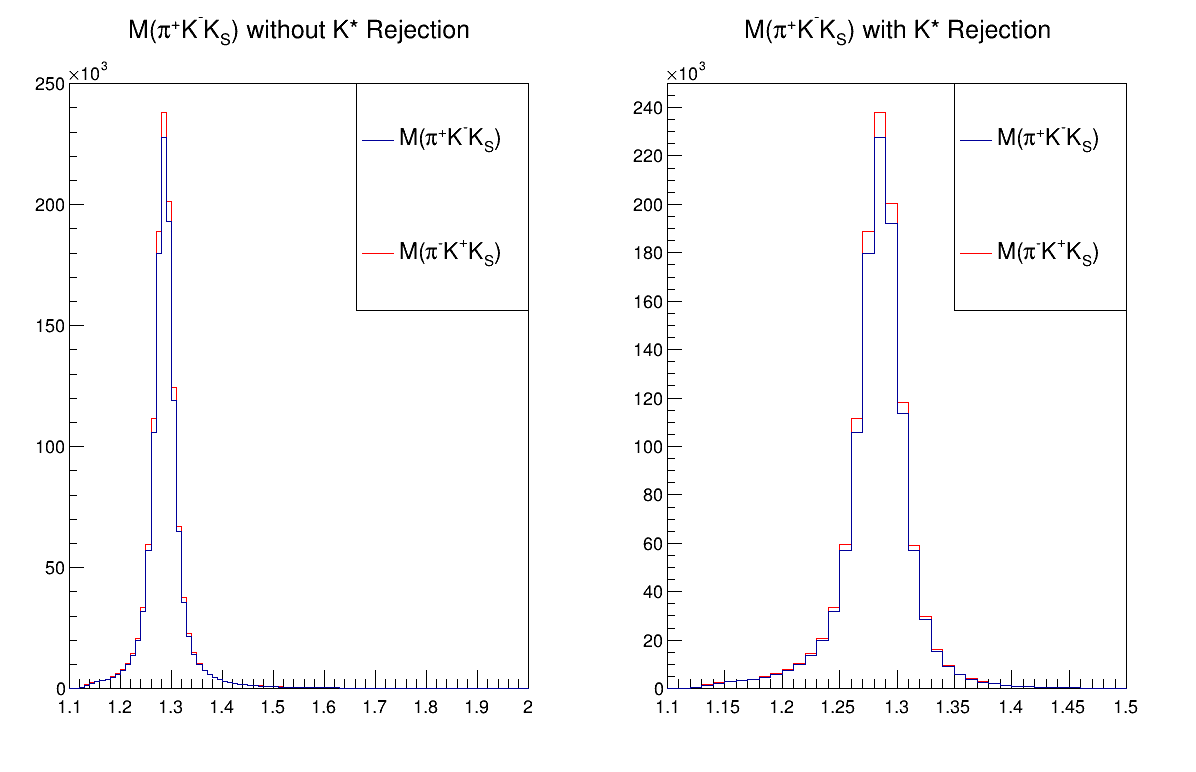

In [29]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pimkpks.SetLineColor(ROOT.kRed)
legend_kkpi = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kkpi.AddEntry(hist_pipkmks.GetPtr(), 'M(#pi^{+}K^{-}K_{S})', 'l')
legend_kkpi.AddEntry(hist_pimkpks.GetPtr(), 'M(#pi^{-}K^{+}K_{S})', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pipkmks, hist_pimkpks])
sorted_hists[0].SetTitle('M(#pi^{+}K^{-}K_{S}) without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kkpi.Draw()

c.cd(2)
hist_pimkpks_kstar_cut.SetLineColor(ROOT.kRed)
legend_kkpi_kstar_cut = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kkpi_kstar_cut.AddEntry(hist_pipkmks_kstar_cut.GetPtr(), 'M(#pi^{+}K^{-}K_{S})', 'l')
legend_kkpi_kstar_cut.AddEntry(hist_pimkpks_kstar_cut.GetPtr(), 'M(#pi^{-}K^{+}K_{S})', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pipkmks_kstar_cut, hist_pimkpks_kstar_cut])
sorted_hists[0].SetTitle('M(#pi^{+}K^{-}K_{S}) with K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kkpi_kstar_cut.Draw()

c.Draw()



<a id="draw-kinematics-plots"></a>
<a id="kaon-kinematics-plots"></a>
### Kaon Kinematics 

#### Kaon Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

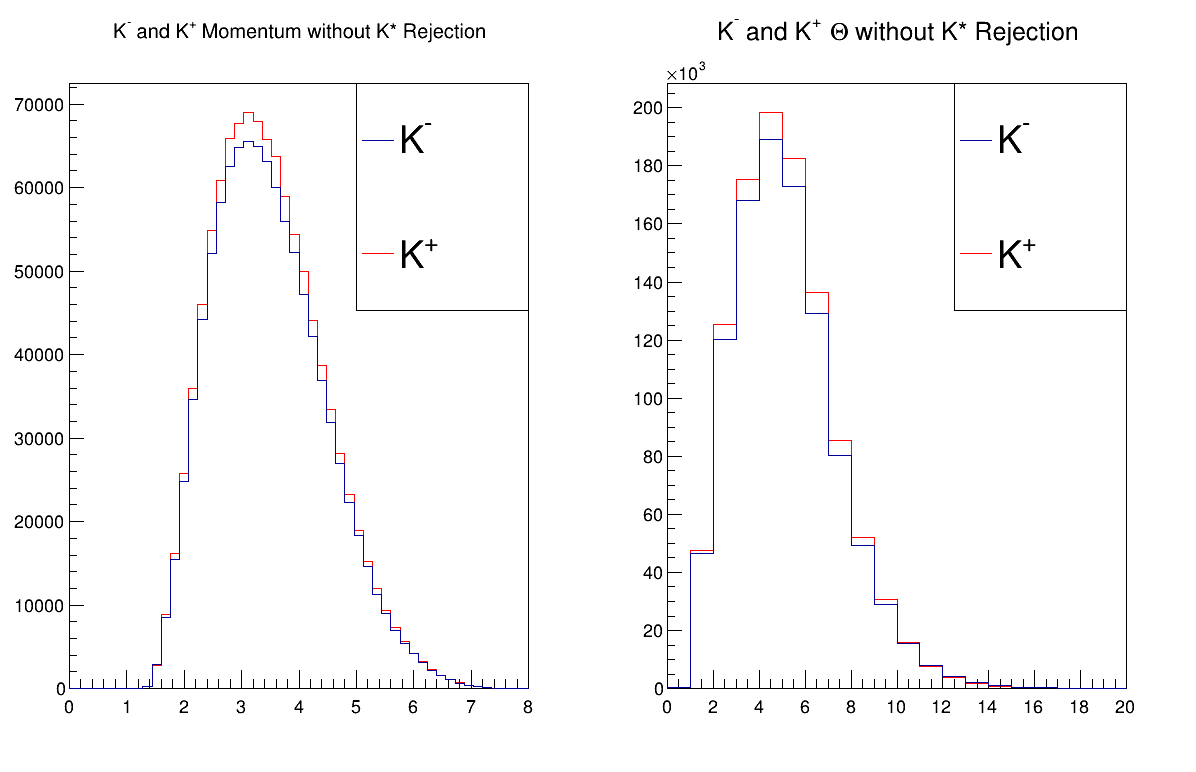

In [30]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kp_p.SetLineColor(ROOT.kRed)
legend_kaon_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kaon_p.AddEntry(hist_km_p.GetPtr(), 'K^{-}', 'l')
legend_kaon_p.AddEntry(hist_kp_p.GetPtr(), 'K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_km_p, hist_kp_p])
sorted_hists[0].SetTitle('K^{-} and K^{+} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kaon_p.Draw()

c.cd(2)
hist_kp_theta.SetLineColor(ROOT.kRed)
legend_kaon_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kaon_theta.AddEntry(hist_km_theta.GetPtr(), 'K^{-}', 'l')
legend_kaon_theta.AddEntry(hist_kp_theta.GetPtr(), 'K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_km_theta, hist_kp_theta])
sorted_hists[0].SetTitle('K^{-} and K^{+} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kaon_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

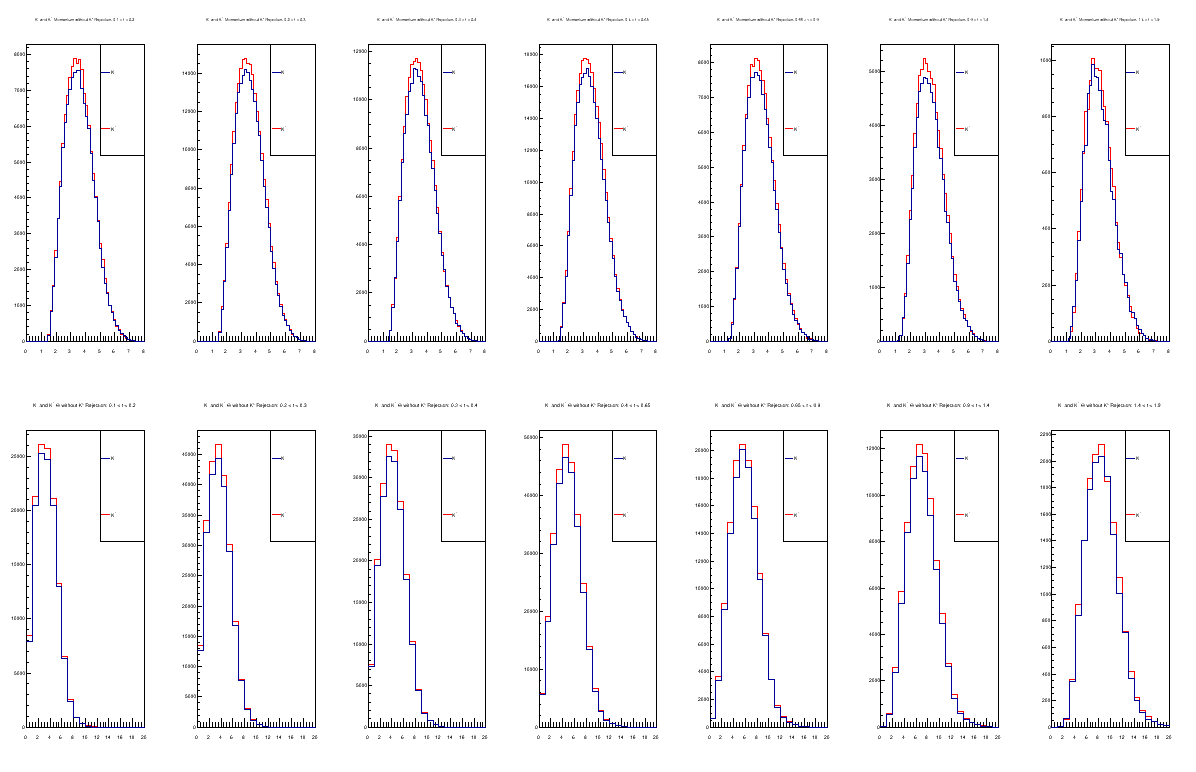

In [31]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_km_p, hist_kp_p, hist_km_theta, hist_kp_theta) in enumerate(zip(ks_pipkmks_p_hists, ks_pimkpks_p_hists, ks_pipkmks_theta_hists, ks_pimkpks_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_kp_p.SetLineColor(ROOT.kRed)
    legend_kaon_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_kaon_p.AddEntry(hist_km_p.GetPtr(), 'K^{-}', 'l')
    legend_kaon_p.AddEntry(hist_kp_p.GetPtr(), 'K^{+}', 'l')
    legends.append(legend_kaon_p)
    sorted_hists = tools.sort_hists_by_max([hist_km_p, hist_kp_p])
    sorted_hists[0].SetTitle('K^{-} and K^{+} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_kp_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_km_theta, hist_kp_theta])
    sorted_hists[0].SetTitle('K^{-} and K^{+} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

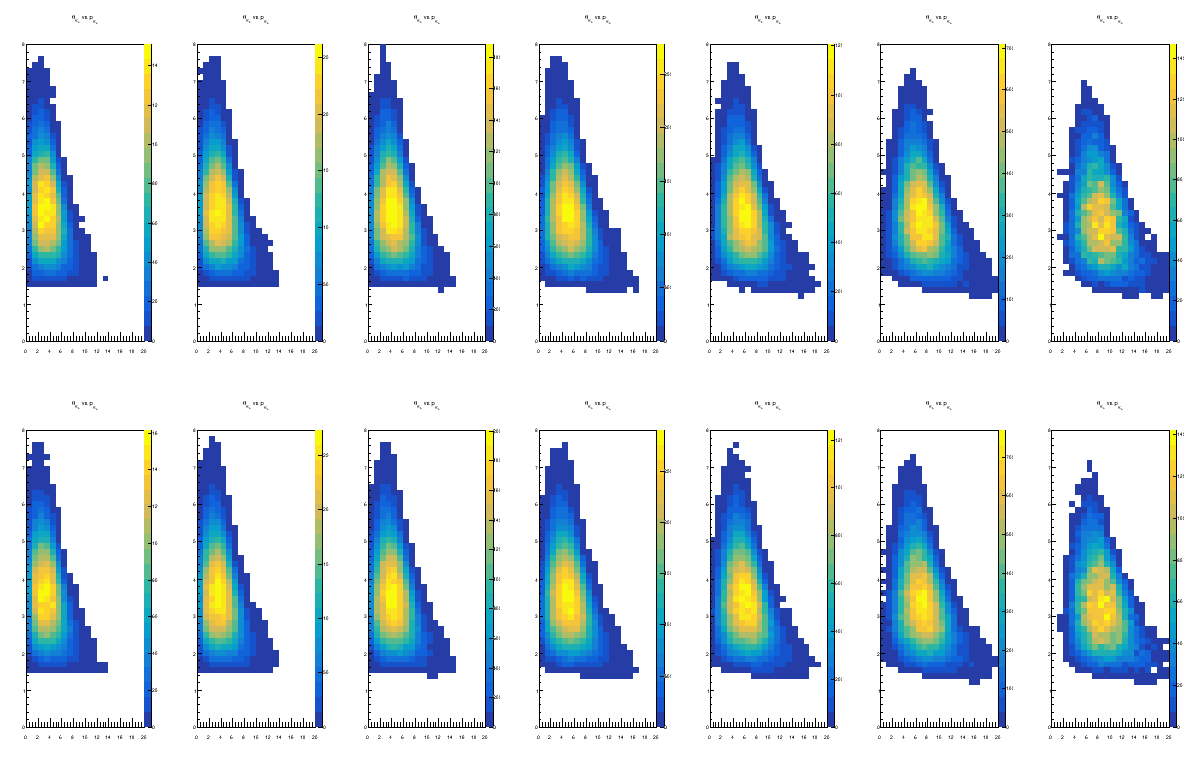

In [32]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_theta_vs_p_hists, ks_pimkpks_theta_vs_p_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

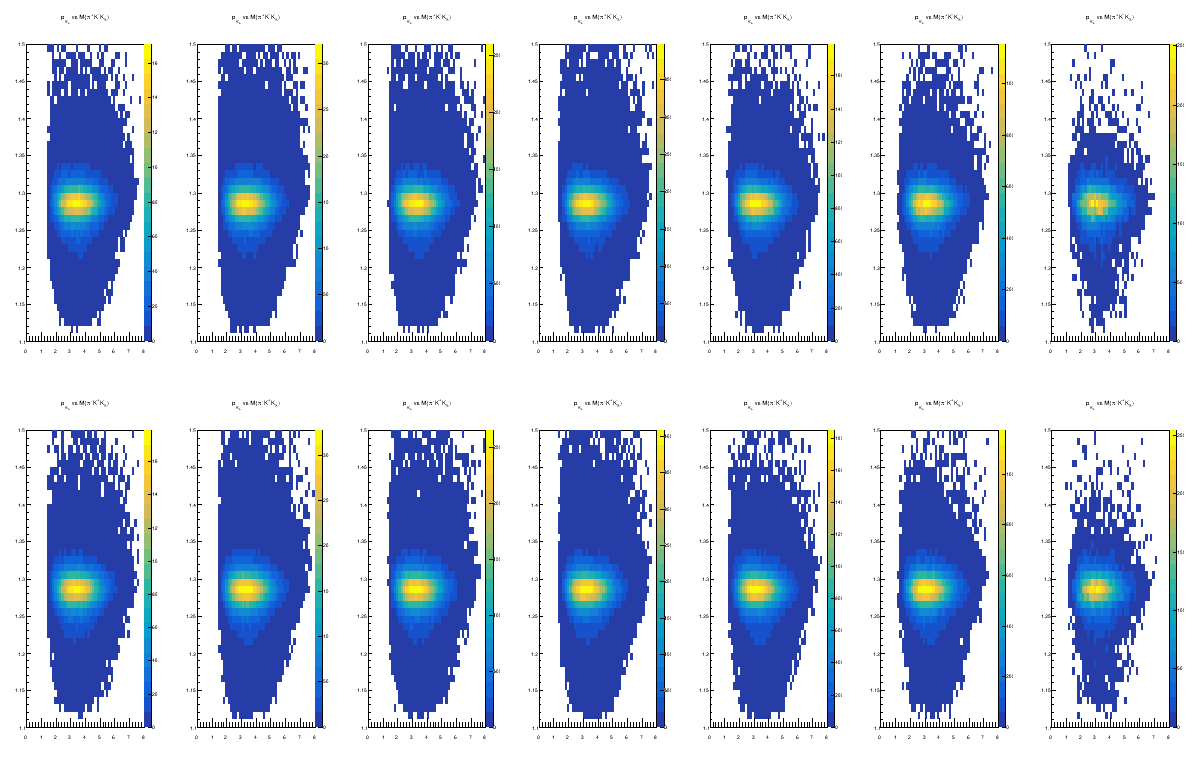

In [33]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_p_vs_pipkmks_hists, ks_pimkpks_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

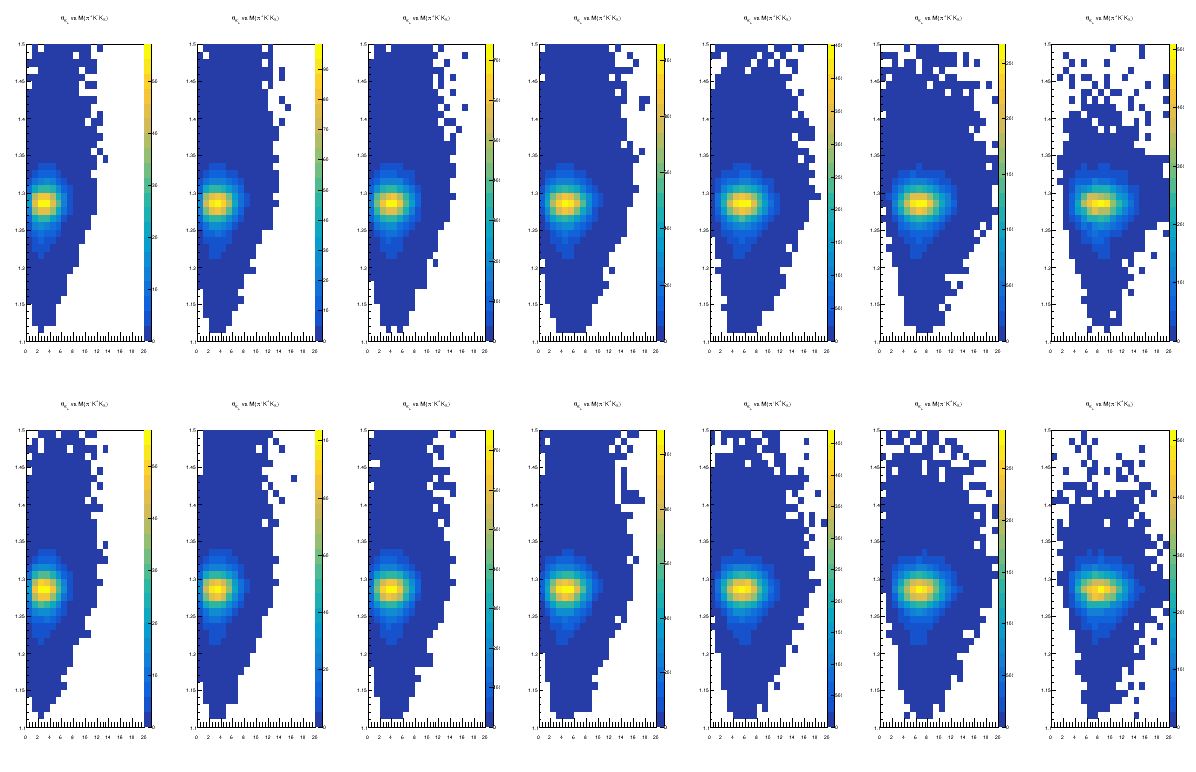

In [34]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_theta_vs_pipkmks_hists, ks_pimkpks_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

<a id="pion-kinematics-plots"></a>
### Pion Kinematics 

#### Pion Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

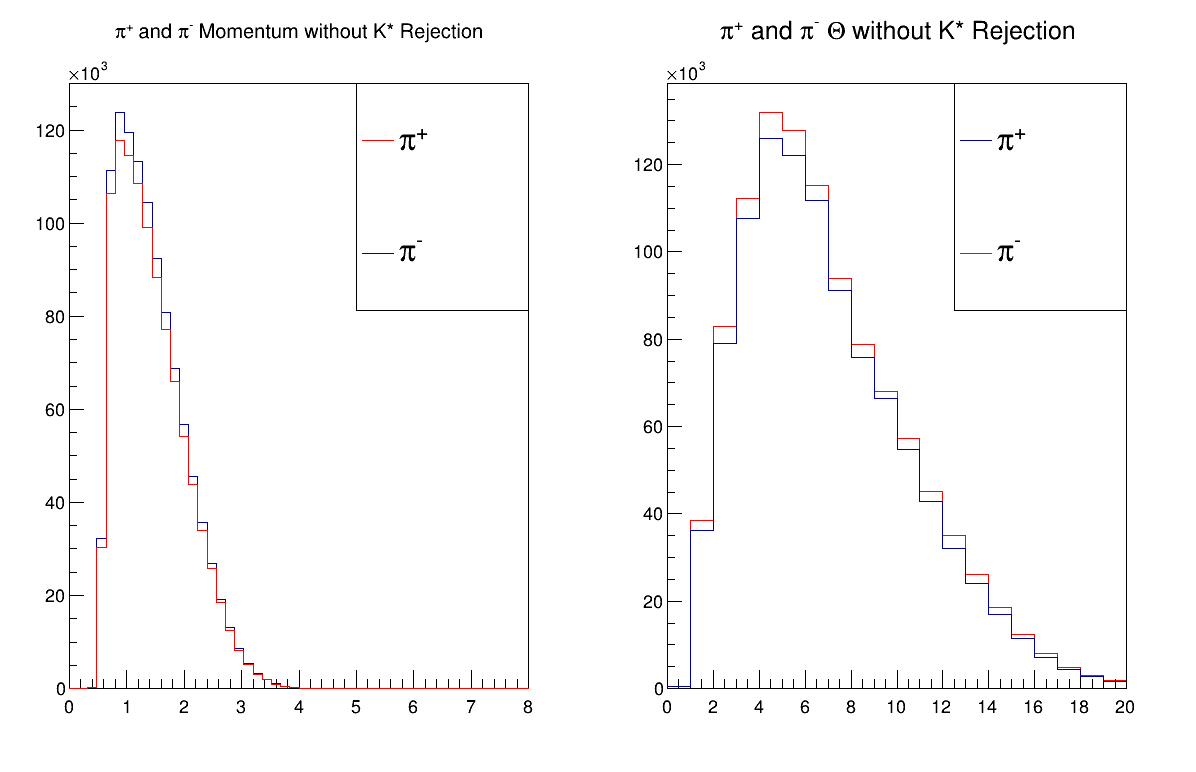

In [35]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pip1_p.SetLineColor(ROOT.kRed)
legend_pion_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_pion_p.AddEntry(hist_pip1_p.GetPtr(), '#pi^{+}', 'l')
legend_pion_p.AddEntry(hist_pim1_p.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip1_p, hist_pim1_p])
sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_pion_p.Draw()

c.cd(2)
hist_pim1_theta.SetLineColor(ROOT.kRed)
legend_pion_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_pion_theta.AddEntry(hist_pip1_theta.GetPtr(), '#pi^{+}', 'l')
legend_pion_theta.AddEntry(hist_pim1_theta.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip1_theta, hist_pim1_theta])
sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_pion_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

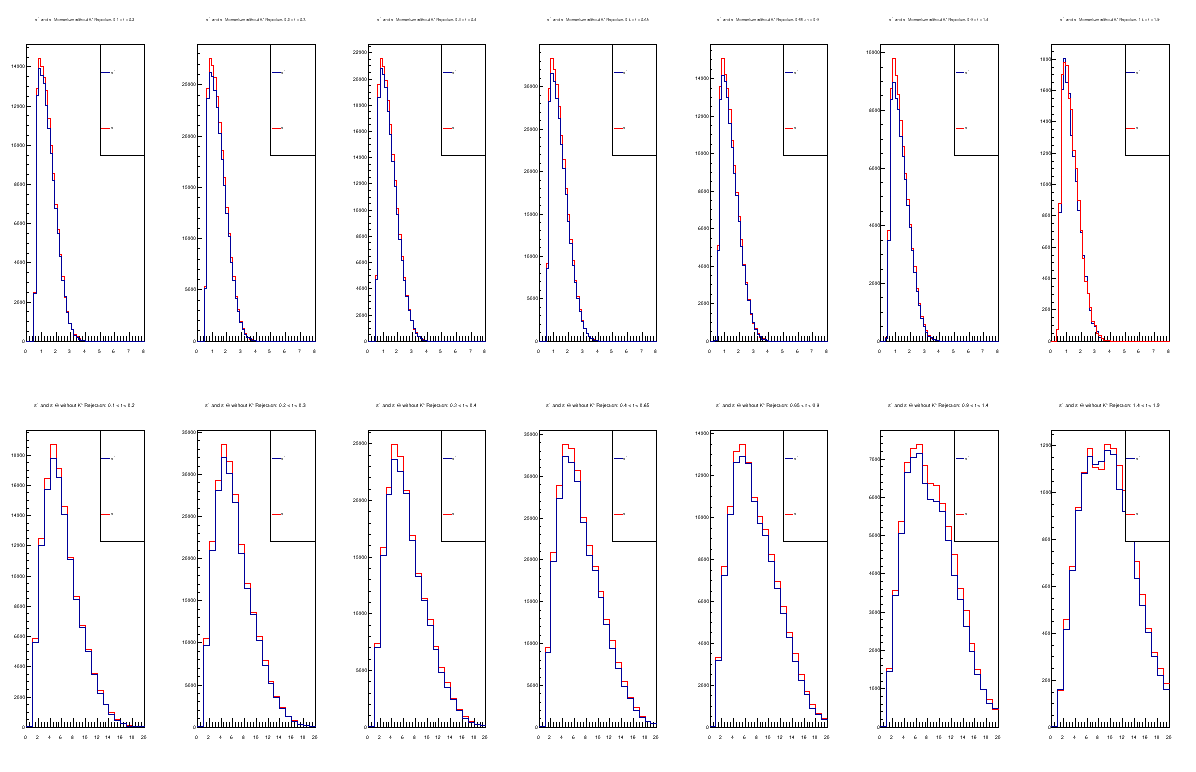

In [36]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_pip1_p, hist_pim1_p, hist_pip1_theta, hist_pim1_theta) in enumerate(zip(pip1_p_hists, pim1_p_hists, pip1_theta_hists, pim1_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_pim1_p.SetLineColor(ROOT.kRed)
    legend_pion_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_pion_p.AddEntry(hist_pip1_p.GetPtr(), '#pi^{+}', 'l')
    legend_pion_p.AddEntry(hist_pim1_p.GetPtr(), '#pi^{-}', 'l')
    legends.append(legend_pion_p)
    sorted_hists = tools.sort_hists_by_max([hist_pip1_p, hist_pim1_p])
    sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_pim1_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_pip1_theta, hist_pim1_theta])
    sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$\pi^{+}$ in top row, $\pi^{-}$** in bottom row

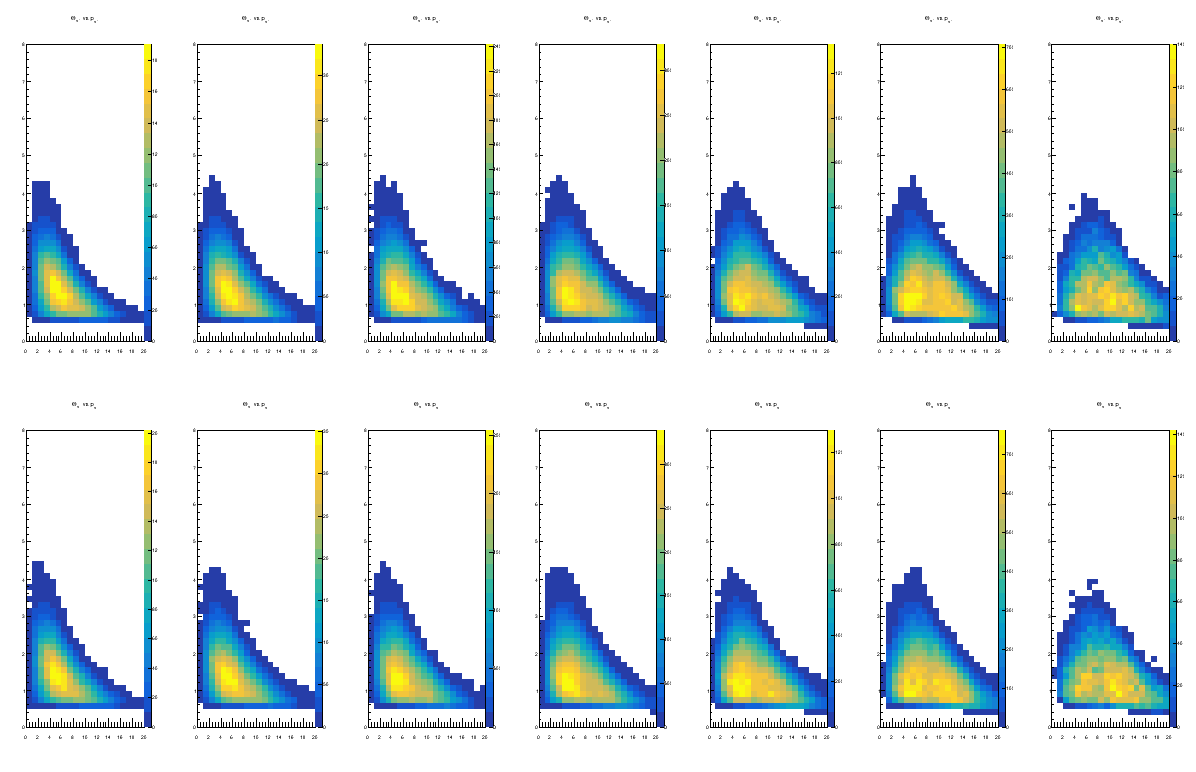

In [37]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_theta_vs_p_hists, pim1_theta_vs_p_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$\pi^{+}$ in top row, $\pi^{-}$** in bottom row

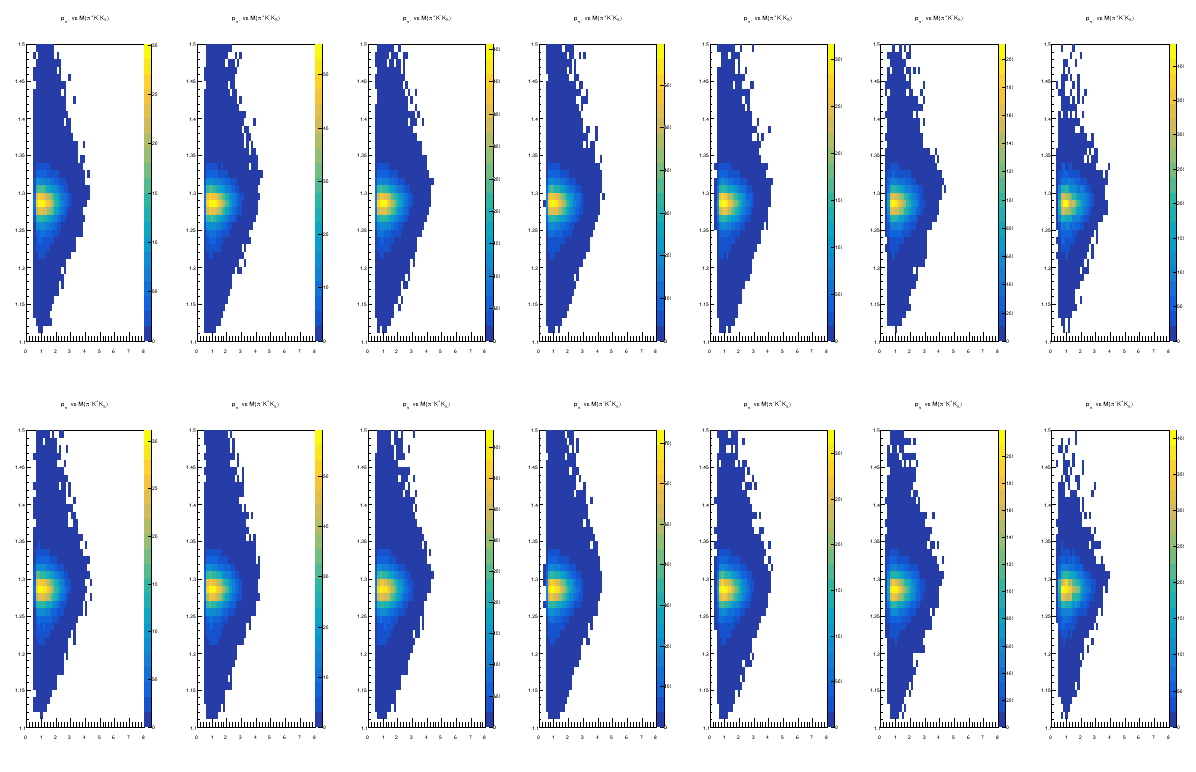

In [38]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_p_vs_pipkmks_hists, pim1_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$\pi^{+}$ in top row, $\pi^{-}$** in bottom row

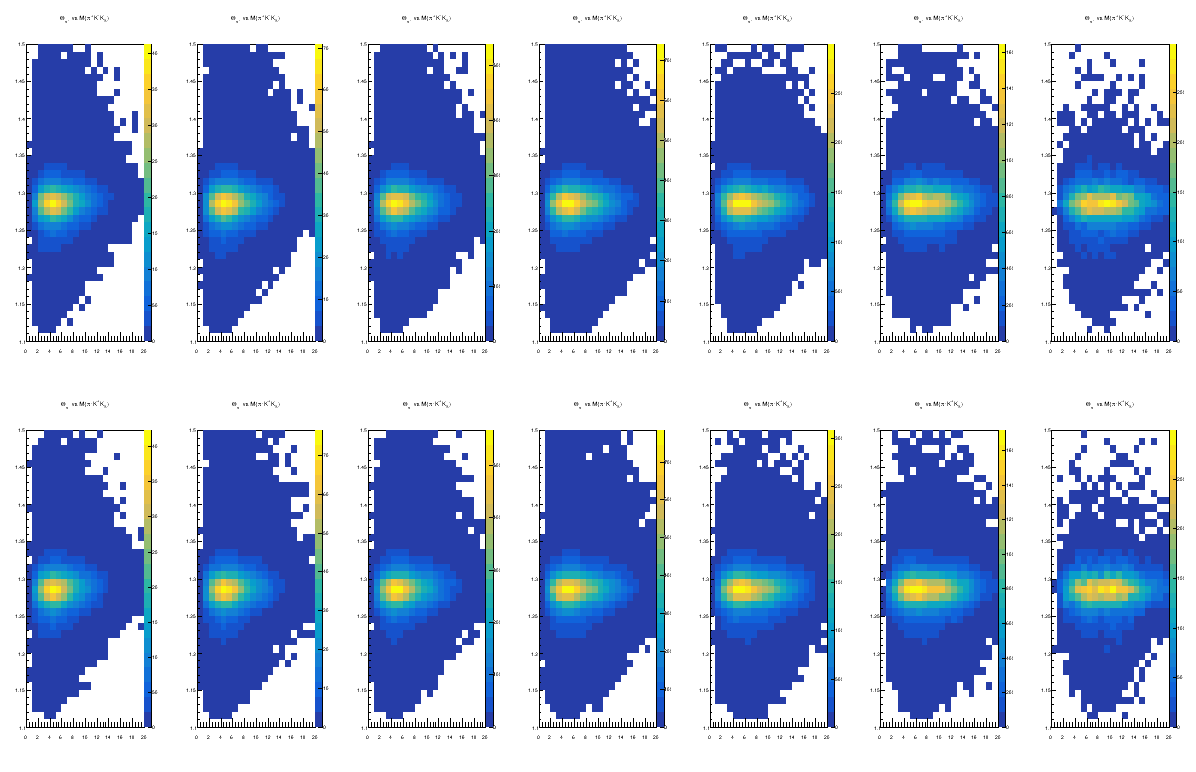

In [39]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_theta_vs_pipkmks_hists, pim1_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

<a id="k_s-kinematics-plots"></a>
### $K_{s}$ Kinematics 

#### $K_{s}$ Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

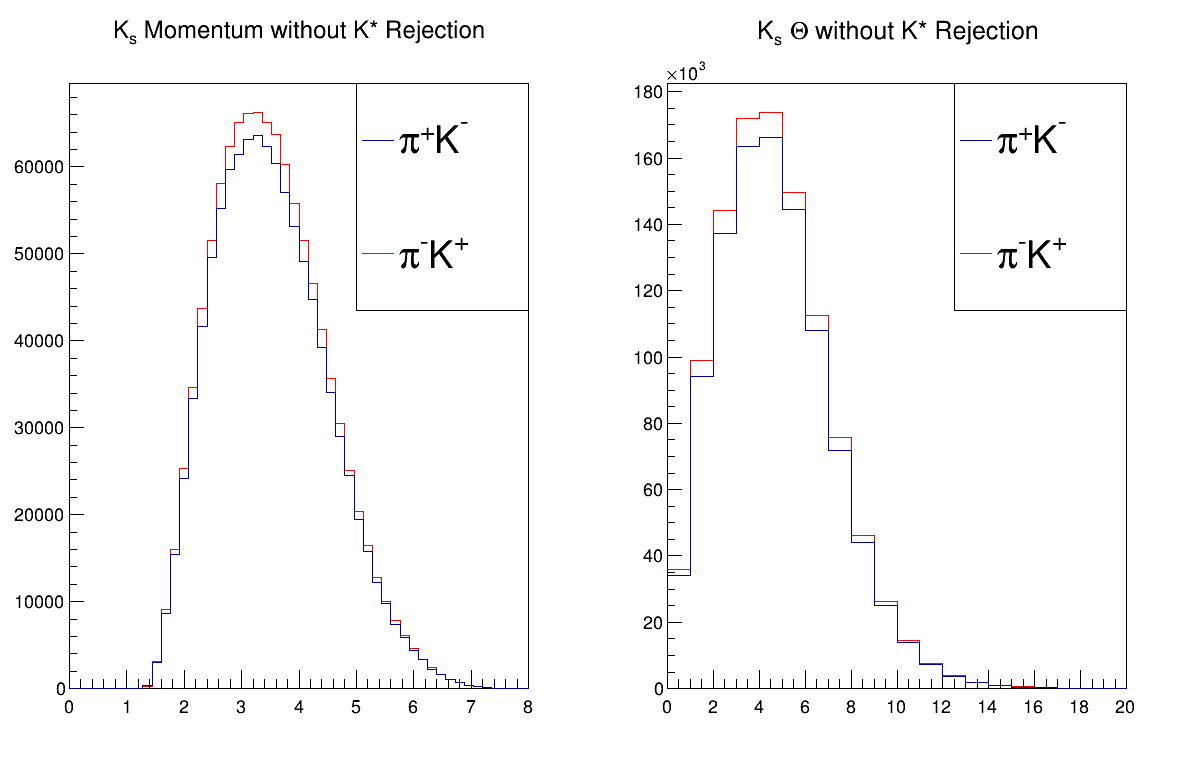

In [40]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_ks_pimkpks_p.SetLineColor(ROOT.kRed)
legend_ks_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_ks_p.AddEntry(hist_ks_pipkmks_p.GetPtr(), '#pi^{+}K^{-}', 'l')
legend_ks_p.AddEntry(hist_ks_pimkpks_p.GetPtr(), '#pi^{-}K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_ks_pipkmks_p, hist_ks_pimkpks_p])
sorted_hists[0].SetTitle('K_{s} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_ks_p.Draw()

c.cd(2)
hist_ks_pimkpks_theta.SetLineColor(ROOT.kRed)
legend_ks_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_ks_theta.AddEntry(hist_ks_pipkmks_theta.GetPtr(), '#pi^{+}K^{-}', 'l')
legend_ks_theta.AddEntry(hist_ks_pimkpks_theta.GetPtr(), '#pi^{-}K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_ks_pipkmks_theta, hist_ks_pimkpks_theta])
sorted_hists[0].SetTitle('K_{s} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_ks_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

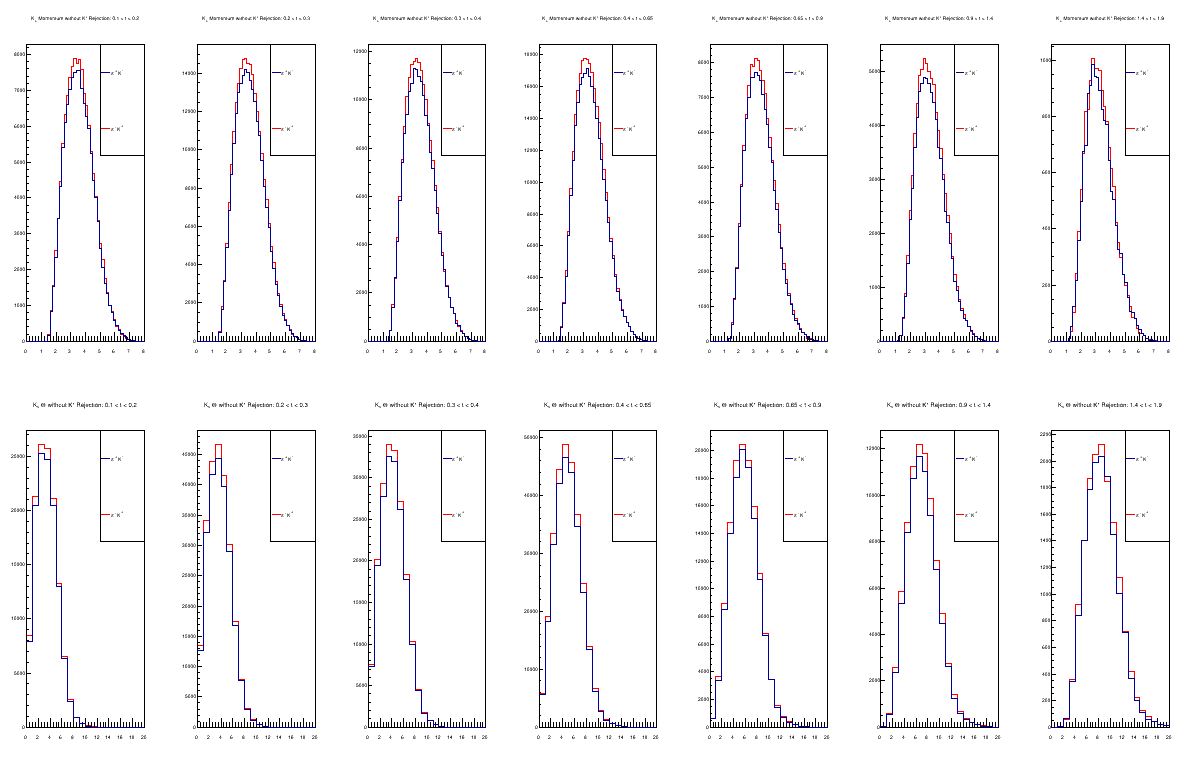

In [41]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_ks_pipkmks_p, hist_ks_pimkpks_p, hist_ks_pipkmks_theta, hist_ks_pimkpks_theta) in enumerate(zip(ks_pipkmks_p_hists, ks_pimkpks_p_hists, ks_pipkmks_theta_hists, ks_pimkpks_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_ks_pimkpks_p.SetLineColor(ROOT.kRed)
    legend_ks_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_ks_p.AddEntry(hist_ks_pipkmks_p.GetPtr(), '#pi^{+}K^{-}', 'l')
    legend_ks_p.AddEntry(hist_ks_pimkpks_p.GetPtr(), '#pi^{-}K^{+}', 'l')
    legends.append(legend_ks_p)
    sorted_hists = tools.sort_hists_by_max([hist_ks_pipkmks_p, hist_ks_pimkpks_p])
    sorted_hists[0].SetTitle('K_{s} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_ks_pimkpks_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_ks_pipkmks_theta, hist_ks_pimkpks_theta])
    sorted_hists[0].SetTitle('K_{s} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

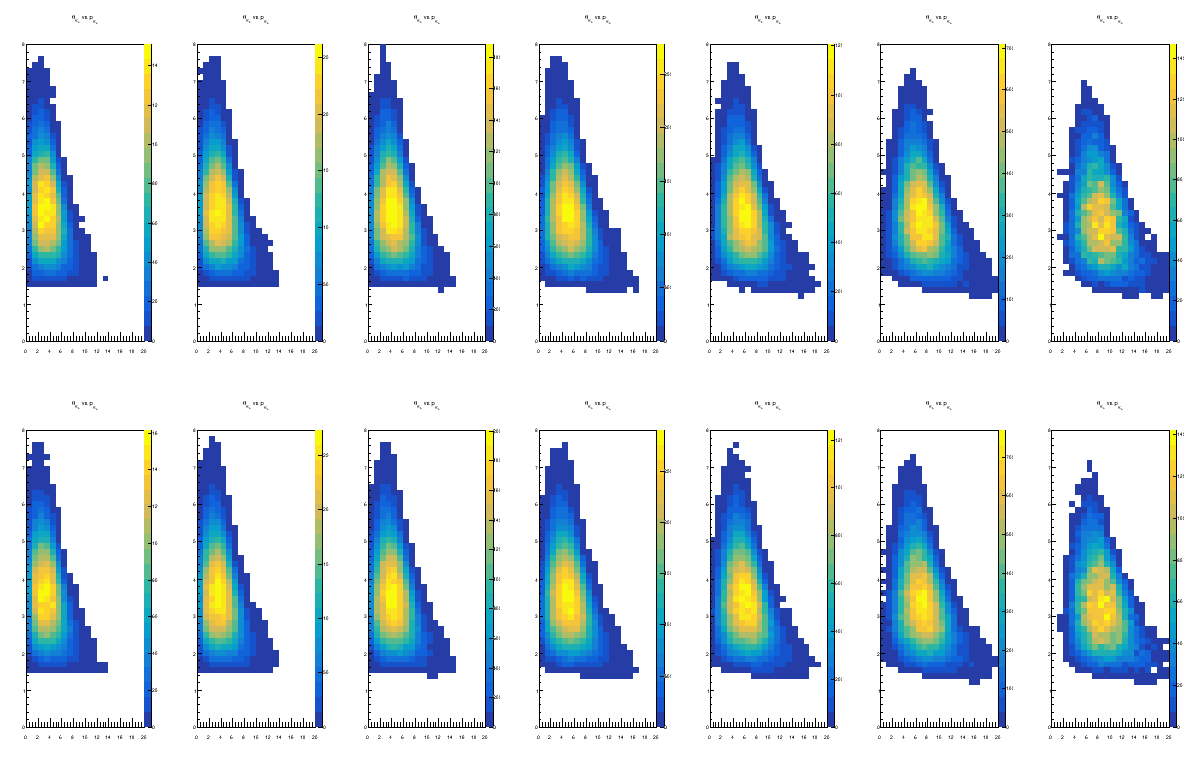

In [42]:
c.Clear()
c.Divide(7, 2)

for i, (hist_ks_pipkmks, hist_ks_pimkpks) in enumerate(zip(ks_pipkmks_theta_vs_p_hists, ks_pimkpks_theta_vs_p_hists)):
    c.cd(i+1)
    hist_ks_pipkmks.Draw('colz')
    c.cd(i+8)
    hist_ks_pimkpks.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

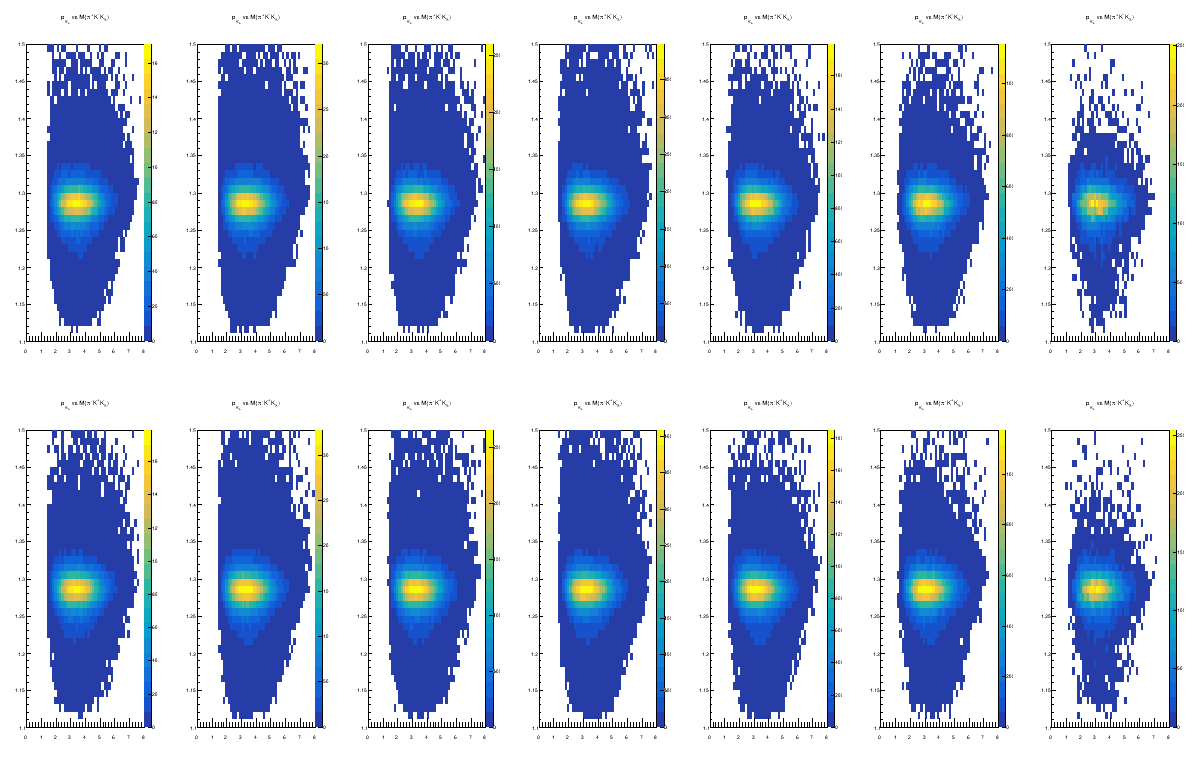

In [43]:
c.Clear()
c.Divide(7, 2)

for i, (hist_ks_pipkmks, hist_ks_pimkpks) in enumerate(zip(ks_pipkmks_p_vs_pipkmks_hists, ks_pimkpks_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_ks_pipkmks.Draw('colz')
    c.cd(i+8)
    hist_ks_pimkpks.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

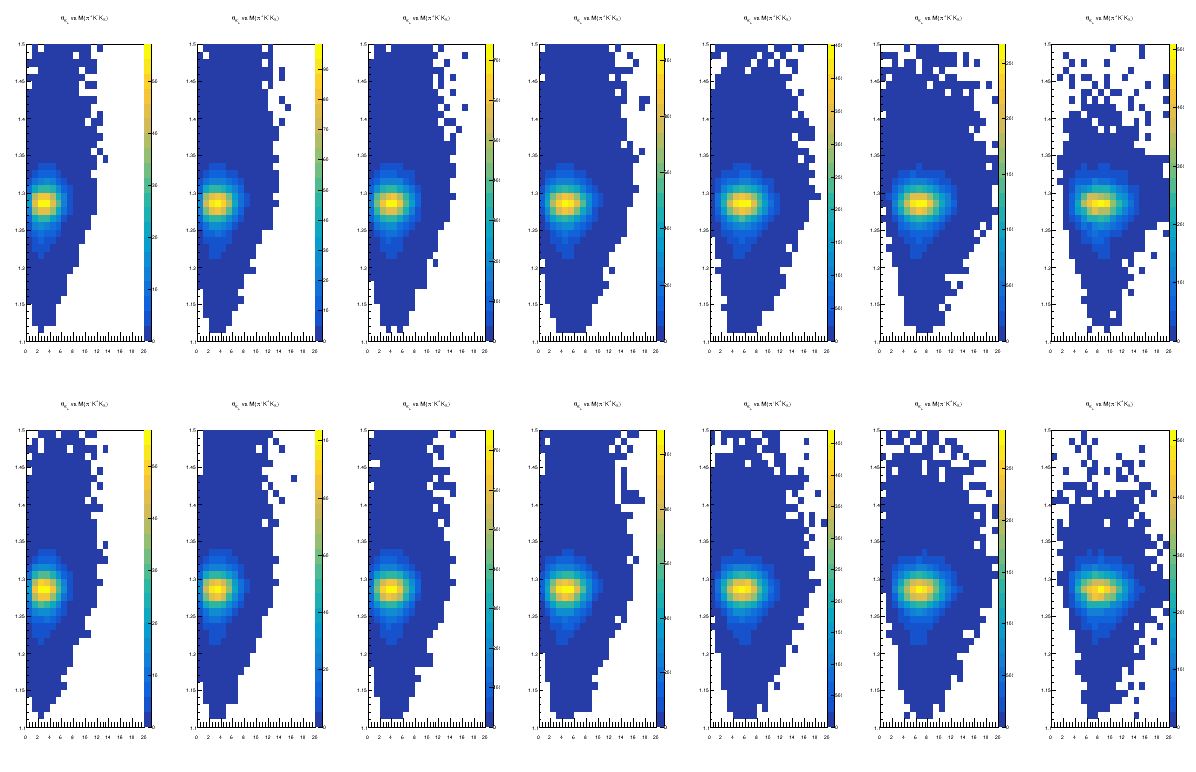

In [44]:
c.Clear()
c.Divide(7, 2)

for i, (hist_ks_pipkmks, hist_ks_pimkpks) in enumerate(zip(ks_pipkmks_theta_vs_pipkmks_hists, ks_pimkpks_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_ks_pipkmks.Draw('colz')
    c.cd(i+8)
    hist_ks_pimkpks.Draw('colz')
c.Draw()

<a id="kspip-kinematics-plots"></a>
### $K_s \rightarrow \pi^+$ Kinematics 

#### $K_s \rightarrow \pi^+$ Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

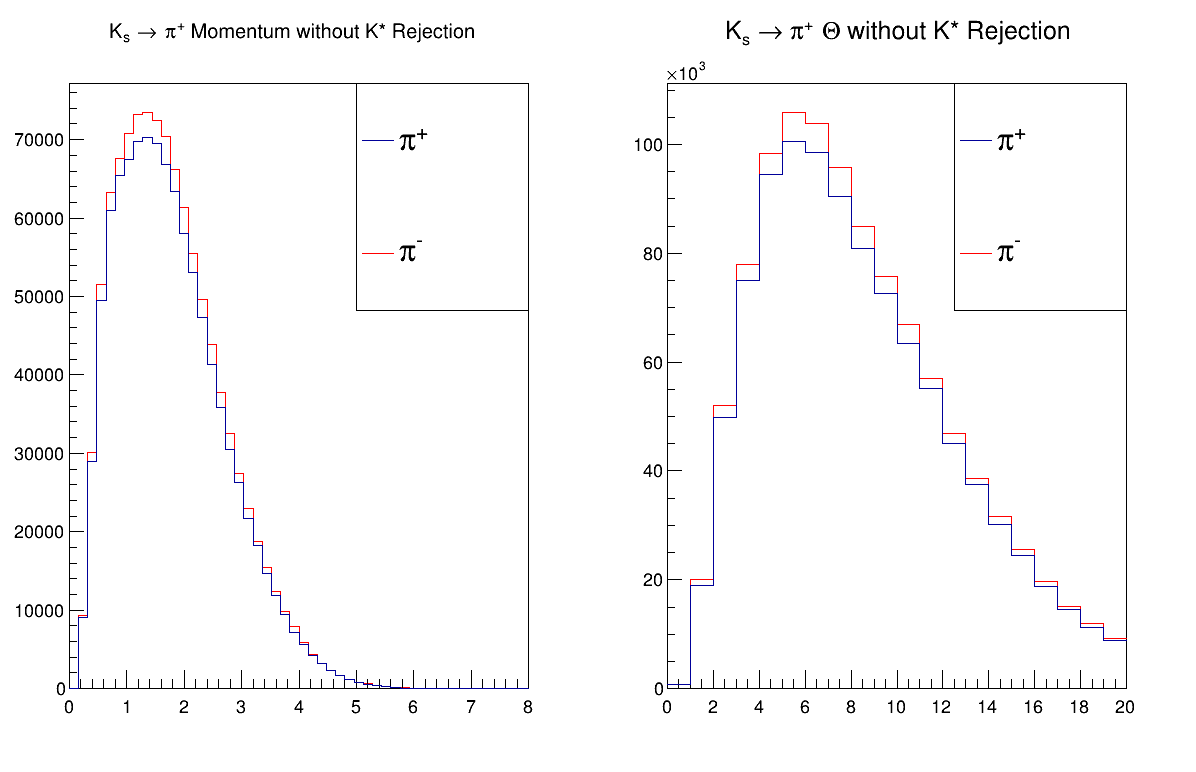

In [45]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pip_p.SetLineColor(ROOT.kRed)
legend_kspip_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kspip_p.AddEntry(hist_pip2_p.GetPtr(), '#pi^{+}', 'l')
legend_kspip_p.AddEntry(hist_pip_p.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip2_p, hist_pip_p])
sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kspip_p.Draw()

c.cd(2)
hist_pip_theta.SetLineColor(ROOT.kRed)
legend_kspip_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kspip_theta.AddEntry(hist_pip2_theta.GetPtr(), '#pi^{+}', 'l')
legend_kspip_theta.AddEntry(hist_pip_theta.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip2_theta, hist_pip_theta])
sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kspip_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

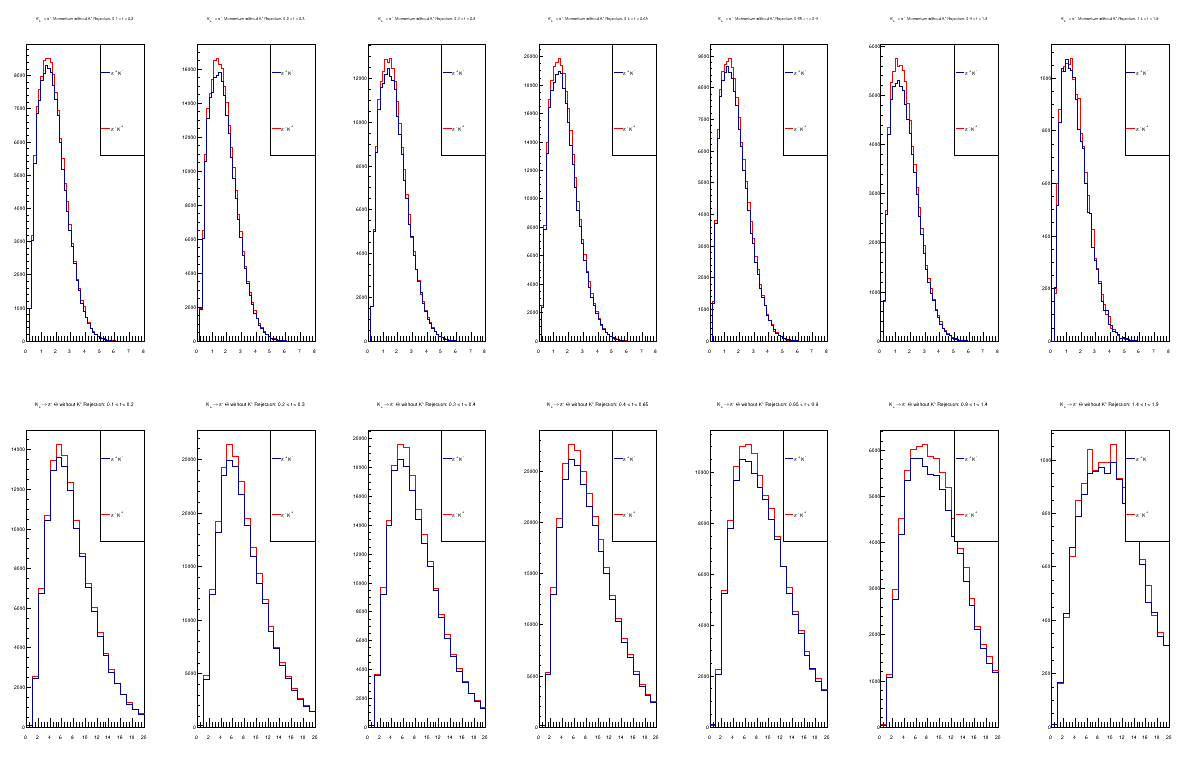

In [46]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_pip2_p, hist_pip_p, hist_pip2_theta, hist_pip_theta) in enumerate(zip(pip2_p_hists, pip_p_hists, pip2_theta_hists, pip_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_pip_p.SetLineColor(ROOT.kRed)
    legend_kspip_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_kspip_p.AddEntry(hist_pip2_p.GetPtr(), '#pi^{+}K^{-}', 'l')
    legend_kspip_p.AddEntry(hist_pip_p.GetPtr(), '#pi^{-}K^{+}', 'l')
    legends.append(legend_kspip_p)
    sorted_hists = tools.sort_hists_by_max([hist_pip2_p, hist_pip_p])
    sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_pip_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_pip2_theta, hist_pip_theta])
    sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

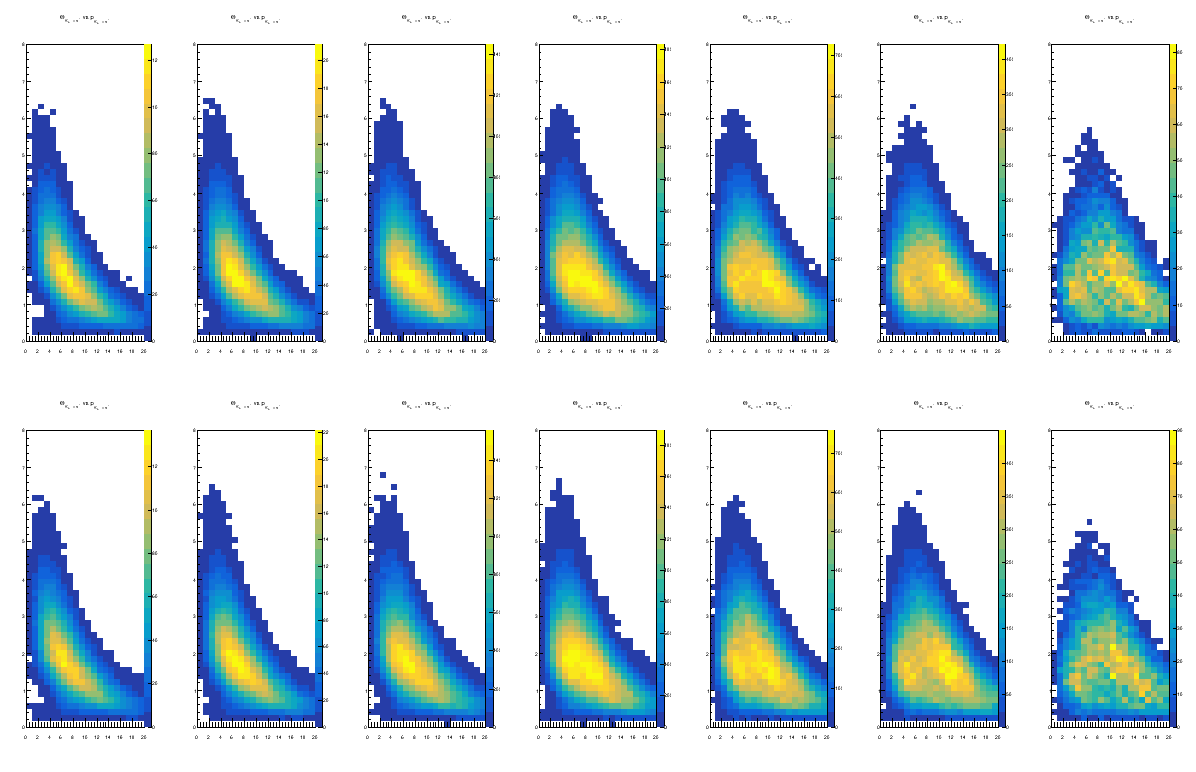

In [47]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip2, hist_pip) in enumerate(zip(pip2_theta_vs_p_hists, pip_theta_vs_p_hists)):
    c.cd(i+1)
    hist_pip2.Draw('colz')
    c.cd(i+8)
    hist_pip.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

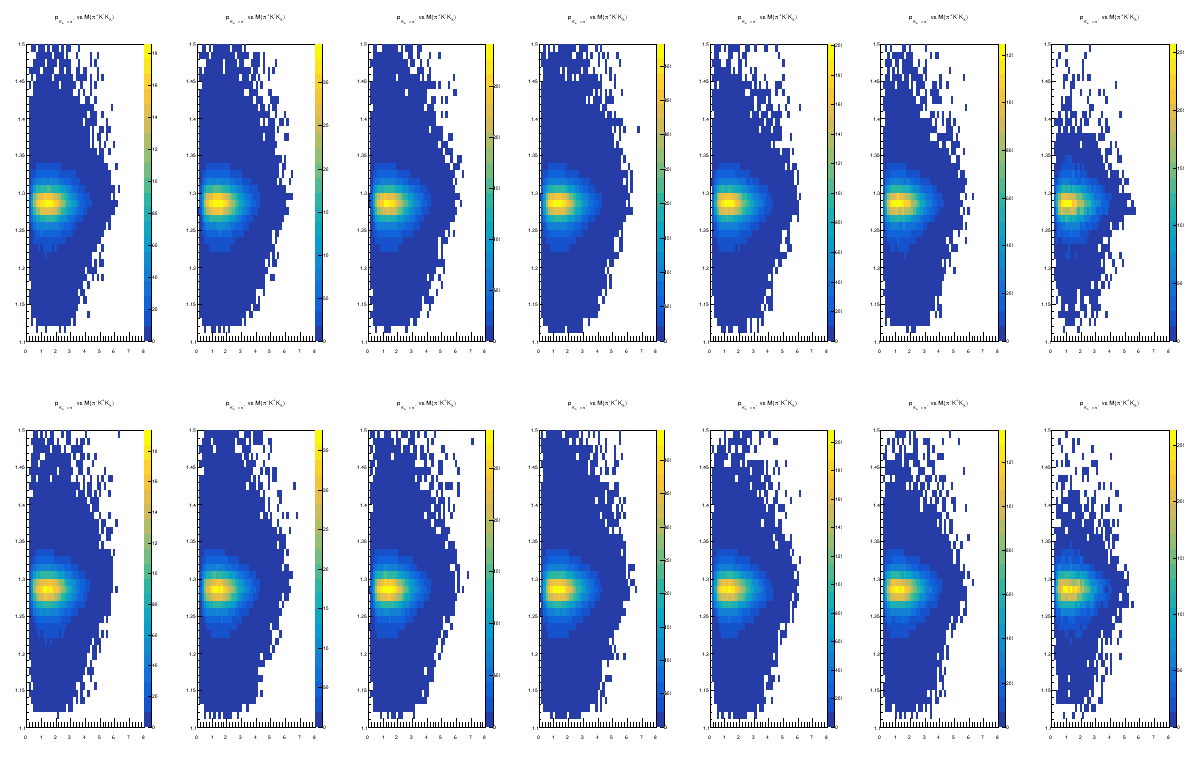

In [48]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip2, hist_pip) in enumerate(zip(pip2_p_vs_pipkmks_hists, pip_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip2.Draw('colz')
    c.cd(i+8)
    hist_pip.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

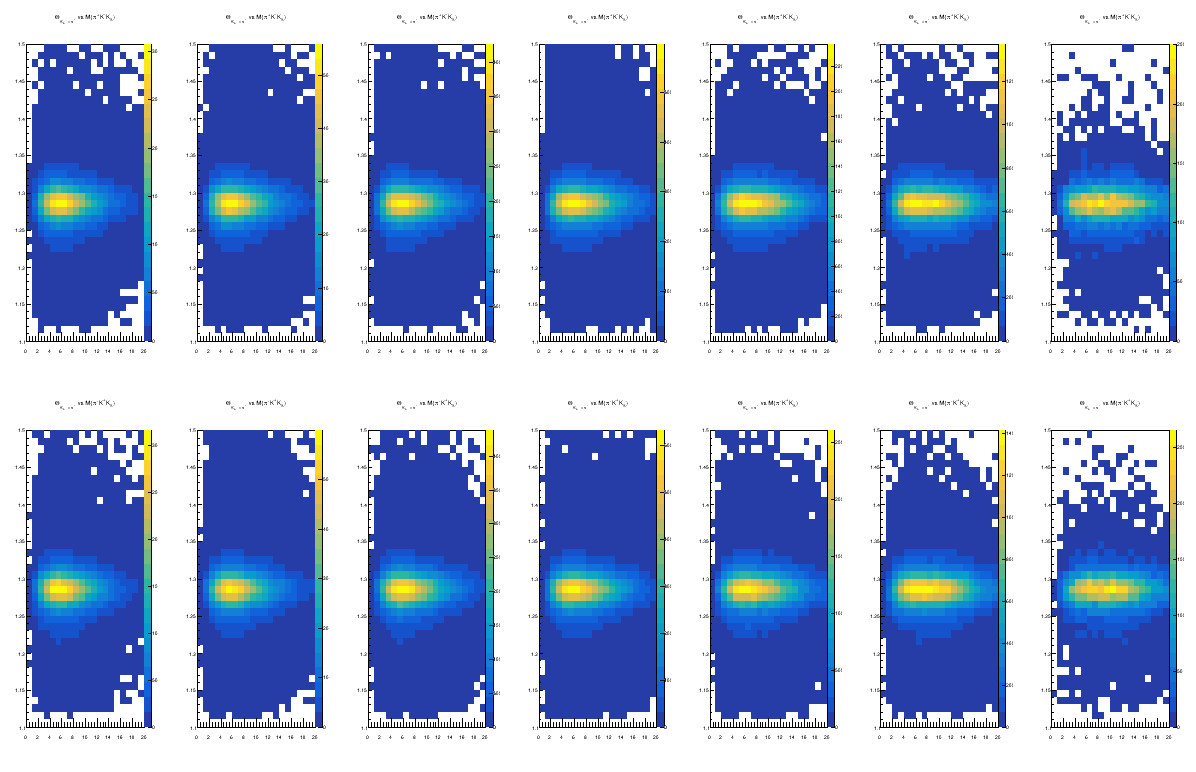

In [49]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip2, hist_pip) in enumerate(zip(pip2_theta_vs_pipkmks_hists, pip_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip2.Draw('colz')
    c.cd(i+8)
    hist_pip.Draw('colz')
c.Draw()

<a id="kspim-kinematics-plots"></a>
### $K_s \rightarrow \pi^-$ Kinematics 

#### $K_s \rightarrow \pi^-$ Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

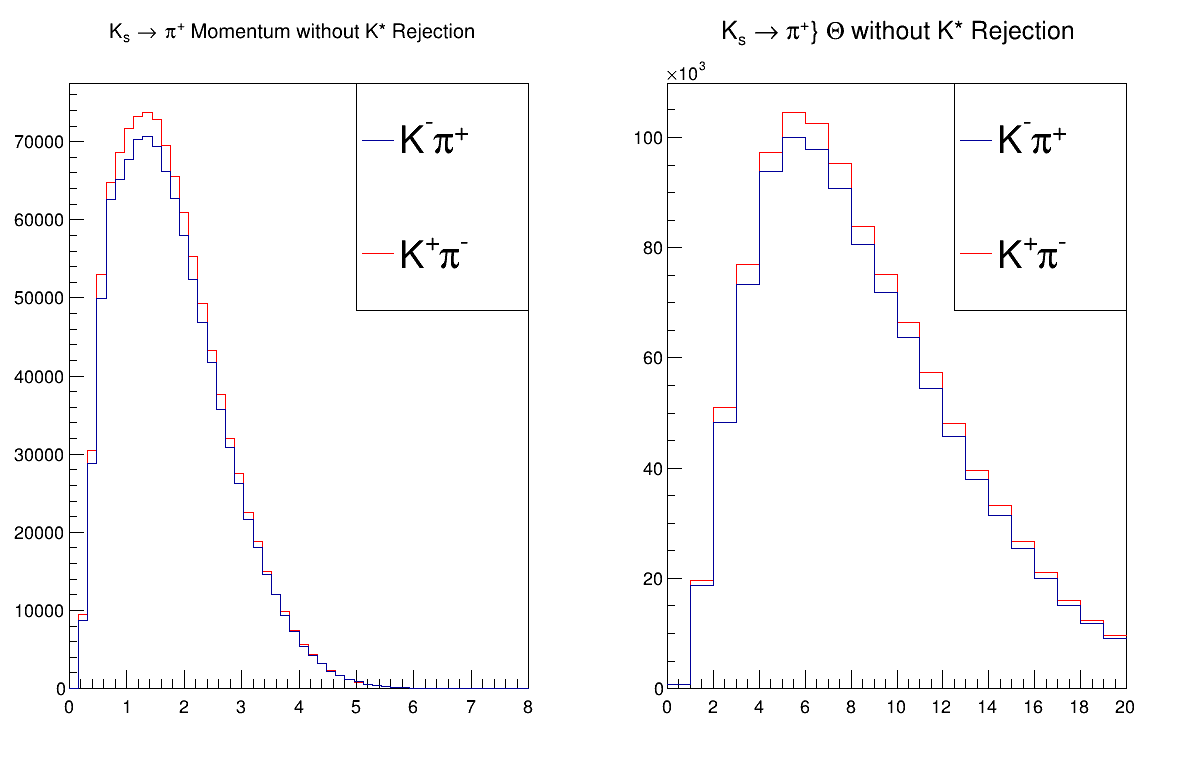

In [50]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pim2_p.SetLineColor(ROOT.kRed)
legend_kspim_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kspim_p.AddEntry(hist_pim_p.GetPtr(), 'K^{-}#pi^{+}', 'l')
legend_kspim_p.AddEntry(hist_pim2_p.GetPtr(), 'K^{+}#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pim2_p, hist_pim_p])
sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kspim_p.Draw()

c.cd(2)
hist_pim2_theta.SetLineColor(ROOT.kRed)
legend_kspim_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kspim_theta.AddEntry(hist_pim_theta.GetPtr(), 'K^{-}#pi^{+}', 'l')
legend_kspim_theta.AddEntry(hist_pim2_theta.GetPtr(), 'K^{+}#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pim2_theta, hist_pim_theta])
sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+}} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kspim_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

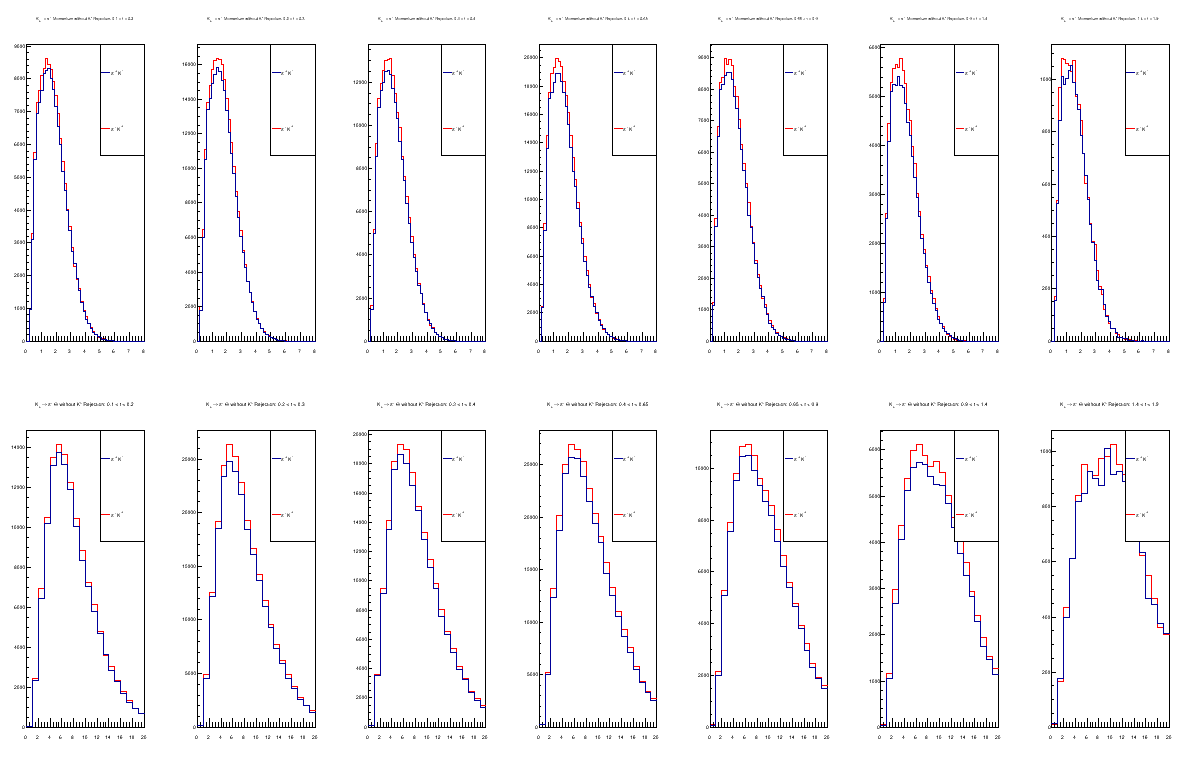

In [51]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_pim2_p, hist_pim_p, hist_pim2_theta, hist_pim_theta) in enumerate(zip(pim2_p_hists, pim_p_hists, pim2_theta_hists, pim_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_pim2_p.SetLineColor(ROOT.kRed)
    legend_kspim_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_kspim_p.AddEntry(hist_pim_p.GetPtr(), '#pi^{+}K^{-}', 'l')
    legend_kspim_p.AddEntry(hist_pim2_p.GetPtr(), '#pi^{-}K^{+}', 'l')
    legends.append(legend_kspim_p)
    sorted_hists = tools.sort_hists_by_max([hist_pim2_p, hist_pim_p])
    sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_pim2_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_pim2_theta, hist_pim_theta])
    sorted_hists[0].SetTitle('K_{s} #rightarrow #pi^{+} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

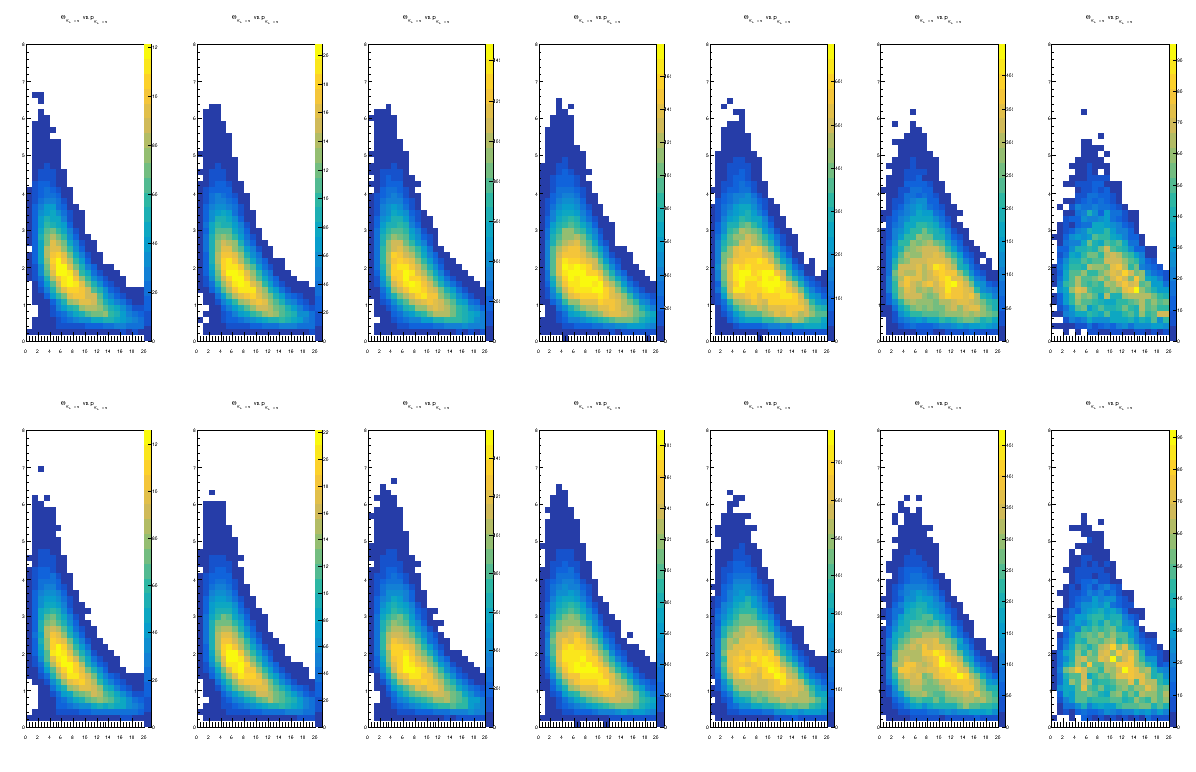

In [52]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pim2, hist_pim) in enumerate(zip(pim2_theta_vs_p_hists, pim_theta_vs_p_hists)):
    c.cd(i+1)
    hist_pim.Draw('colz')
    c.cd(i+8)
    hist_pim2.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

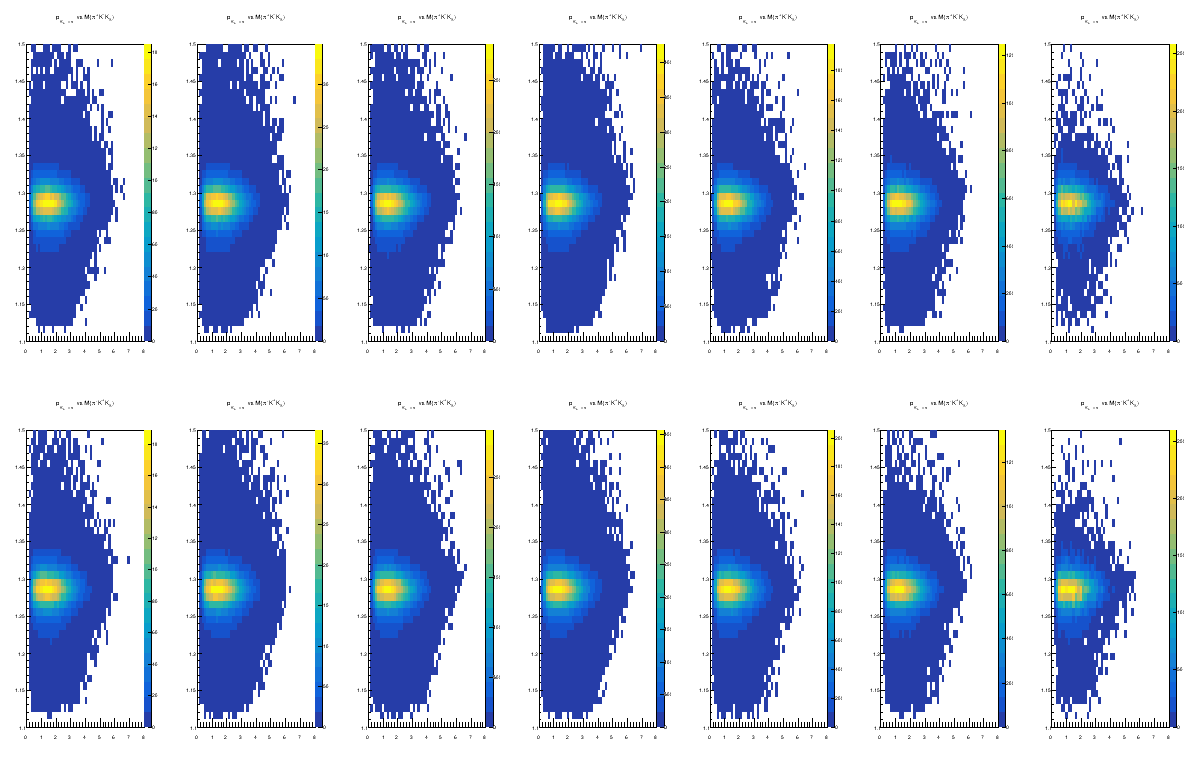

In [53]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pim2, hist_pim) in enumerate(zip(pim2_p_vs_pimkpks_hists, pim_p_vs_pipkmks_hists)):
    c.cd(i+1)
    hist_pim.Draw('colz')
    c.cd(i+8)
    hist_pim2.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$\pi^{+}K^{-}$ in top row, $\pi^{-}K^{+}$** in bottom row

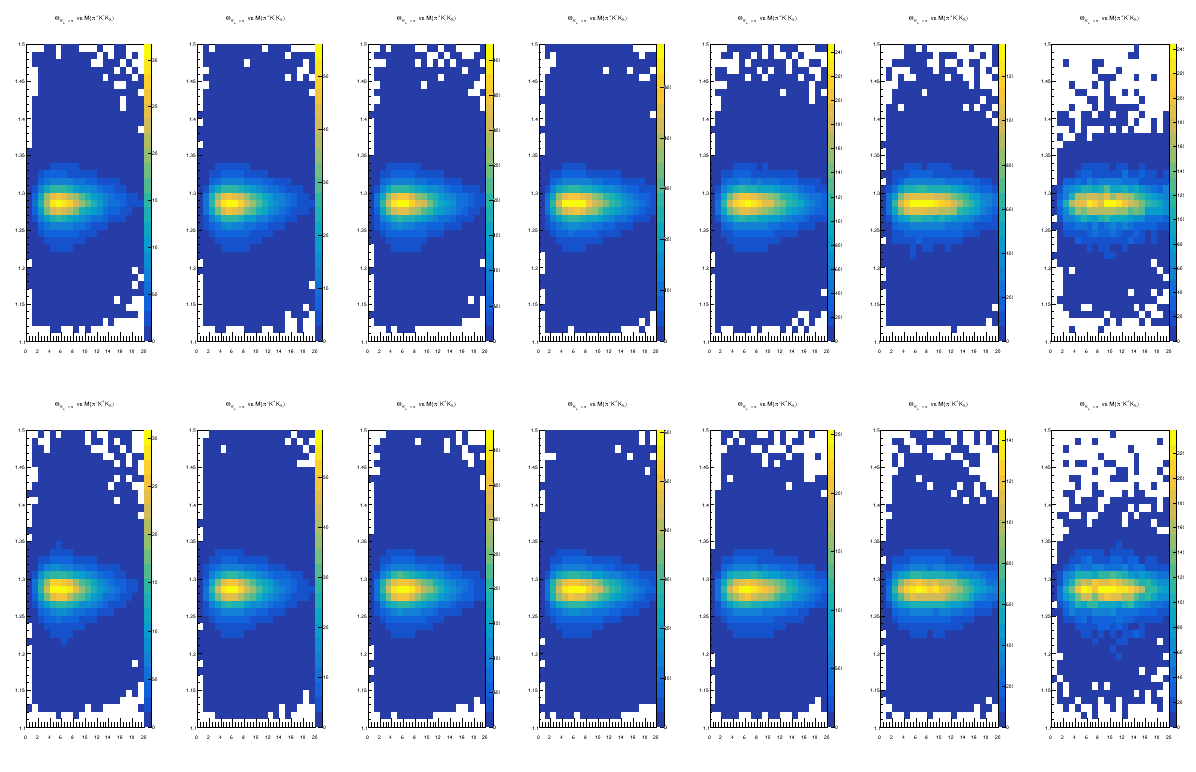

In [54]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pim2, hist_pim) in enumerate(zip(pim2_theta_vs_pimkpks_hists, pim_theta_vs_pipkmks_hists)):
    c.cd(i+1)
    hist_pim.Draw('colz')
    c.cd(i+8)
    hist_pim2.Draw('colz')
c.Draw()

<a id="draw-combo-plots"></a>
## Particle Mass Combos

<a id="draw-ppi-plots"></a>
## $p\pi$

#### $p\pi$ Mass Distribution

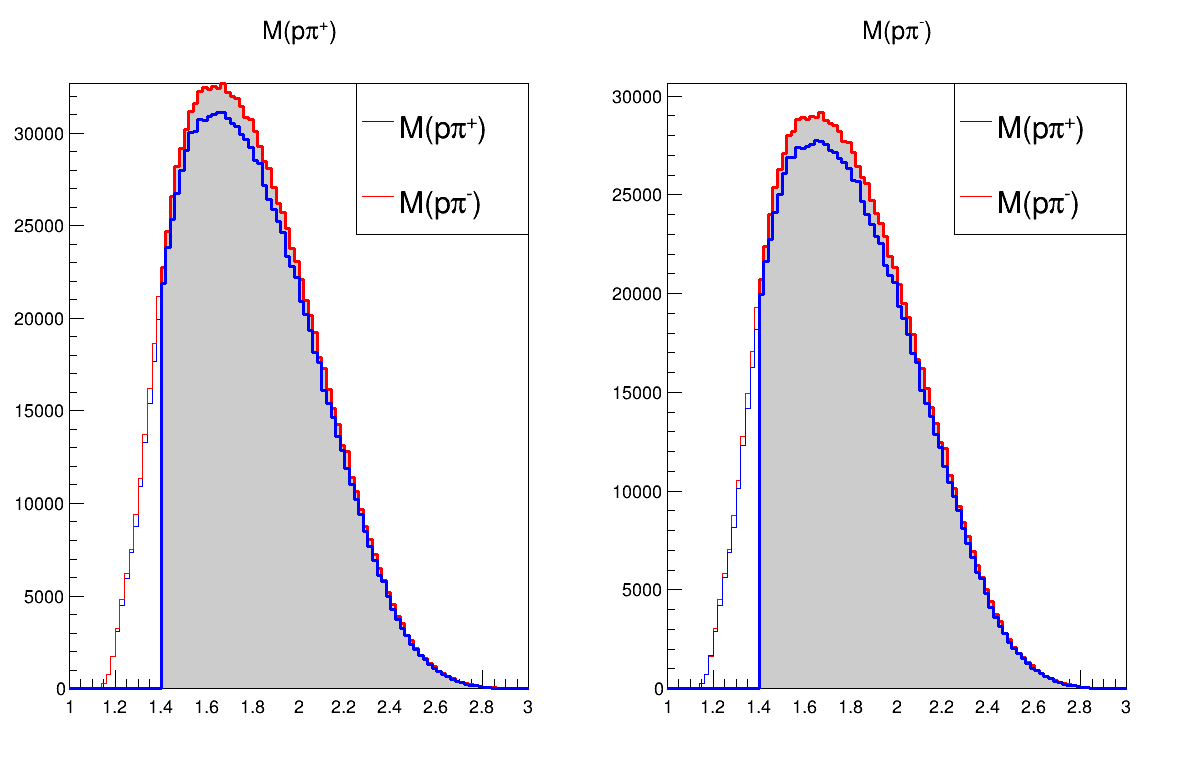

In [55]:
hist_ppip.SetLineColor(ROOT.kBlue)
hist_ppim.SetLineColor(ROOT.kRed)
hist_ppip_shaded.SetFillColor(ROOT.kGray)
hist_ppip_shaded.SetLineColor(ROOT.kBlue)
hist_ppip_shaded.SetLineWidth(3)
hist_ppim_shaded.SetFillColor(ROOT.kGray)
hist_ppim_shaded.SetLineColor(ROOT.kRed)
hist_ppim_shaded.SetLineWidth(3)
hist_ppip_f1.SetLineColor(ROOT.kBlue)
hist_ppim_f1.SetLineColor(ROOT.kRed)
hist_ppip_f1_shaded.SetFillColor(ROOT.kGray)
hist_ppip_f1_shaded.SetLineColor(ROOT.kBlue)
hist_ppip_f1_shaded.SetLineWidth(3)
hist_ppim_f1_shaded.SetFillColor(ROOT.kGray)
hist_ppim_f1_shaded.SetLineColor(ROOT.kRed)
hist_ppim_f1_shaded.SetLineWidth(3)

legend_ppi = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_ppi.AddEntry(hist_ppip.GetPtr(), 'M(p#pi^{+})', 'l')
legend_ppi.AddEntry(hist_ppim.GetPtr(), 'M(p#pi^{-})', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_ppip.Draw()
hist_ppim.Draw('same')
hist_ppim_shaded.Draw('same')
hist_ppip_shaded.Draw('same')
legend_ppi.Draw()

c.cd(2)
hist_ppim_f1.Draw()
hist_ppip_f1.Draw('same')
hist_ppim_f1_shaded.Draw('same')
hist_ppip_f1_shaded.Draw('same')
legend_ppi.Draw()

c.Draw()


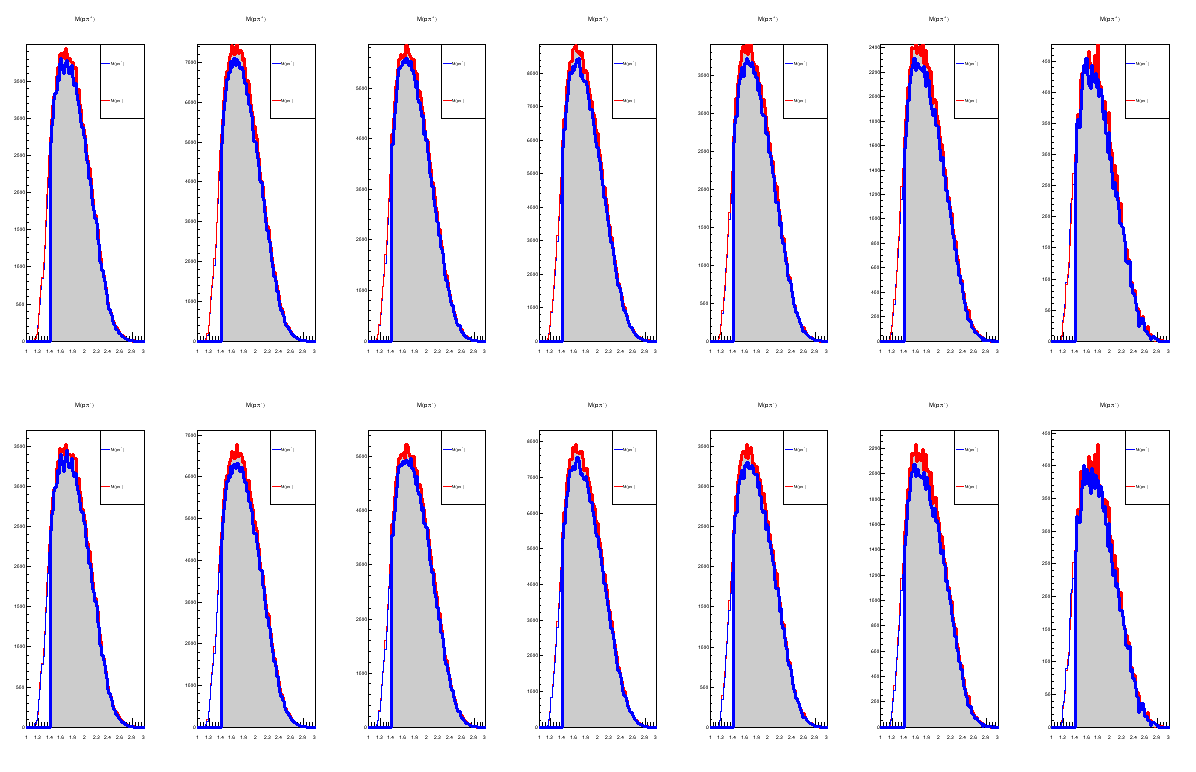

In [56]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_ppip, h_ppim, h_ppip_shaded, h_ppim_shaded) in enumerate(zip(hists_ppip, hists_ppim, hists_ppip_shaded, hists_ppim_shaded)):
    legend_ppi_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_ppi_binned.AddEntry(hist_ppip.GetPtr(), 'M(p#pi^{+})', 'l')
    legend_ppi_binned.AddEntry(hist_ppim.GetPtr(), 'M(p#pi^{-})', 'l')
    legends.append(legend_ppi_binned)
    
    h_ppip.SetLineColor(ROOT.kBlue)
    h_ppim.SetLineColor(ROOT.kRed)
    h_ppip_shaded.SetFillColor(ROOT.kGray)
    h_ppip_shaded.SetLineColor(ROOT.kBlue)
    h_ppip_shaded.SetLineWidth(3)
    h_ppim_shaded.SetFillColor(ROOT.kGray)
    h_ppim_shaded.SetLineColor(ROOT.kRed)
    h_ppim_shaded.SetLineWidth(3)

    c.cd(i+1)
    h_ppip.Draw()
    h_ppim.Draw('same')
    h_ppim_shaded.Draw('same')
    h_ppip_shaded.Draw('same')
    legends[i].Draw()


for i, (h_ppip, h_ppim, h_ppip_shaded, h_ppim_shaded) in enumerate(zip(hists_ppip_f1, hists_ppim_f1, hists_ppip_f1_shaded, hists_ppim_f1_shaded)):    
    h_ppip.SetLineColor(ROOT.kBlue)
    h_ppim.SetLineColor(ROOT.kRed)
    h_ppip_shaded.SetFillColor(ROOT.kGray)
    h_ppip_shaded.SetLineColor(ROOT.kBlue)
    h_ppip_shaded.SetLineWidth(3)
    h_ppim_shaded.SetFillColor(ROOT.kGray)
    h_ppim_shaded.SetLineColor(ROOT.kRed)
    h_ppim_shaded.SetLineWidth(3)

    c.cd(i+8)
    h_ppim.Draw()
    h_ppip.Draw('same')
    h_ppim_shaded.Draw('same')
    h_ppip_shaded.Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(p\pi)$ vs $M(KK\pi)$ Distribution

**Top Row: $p\pi^+$, Bottom Row: $p\pi^-$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

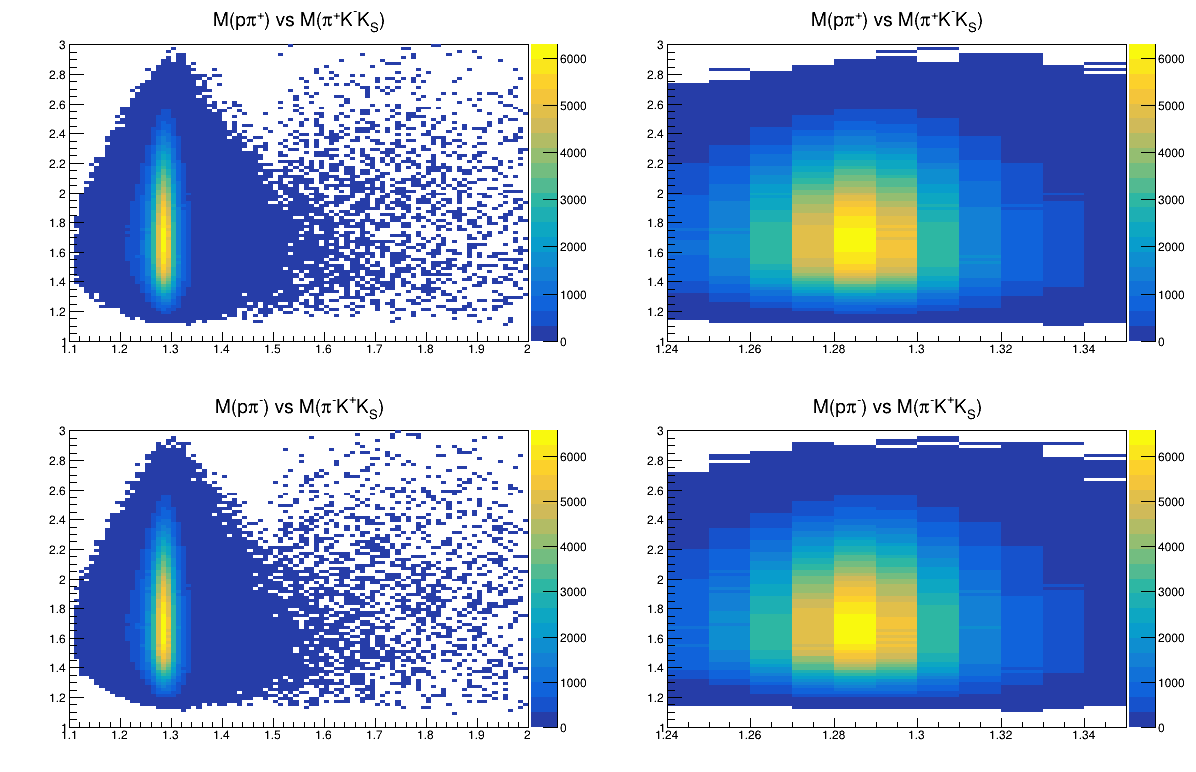

In [57]:
c.Clear()
c.Divide(2,2)
c.SetLogz()
c.cd(1)
hist_ppip_vs_kkpi.Draw('colz')
c.cd(2)
hist_ppip_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_ppim_vs_kkpi.Draw('colz')
c.cd(4)
hist_ppim_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $p\pi$ vs $KK\pi$ over whole mass region

**Top row is $p\pi^+$, bottom row is $p\pi^-$**

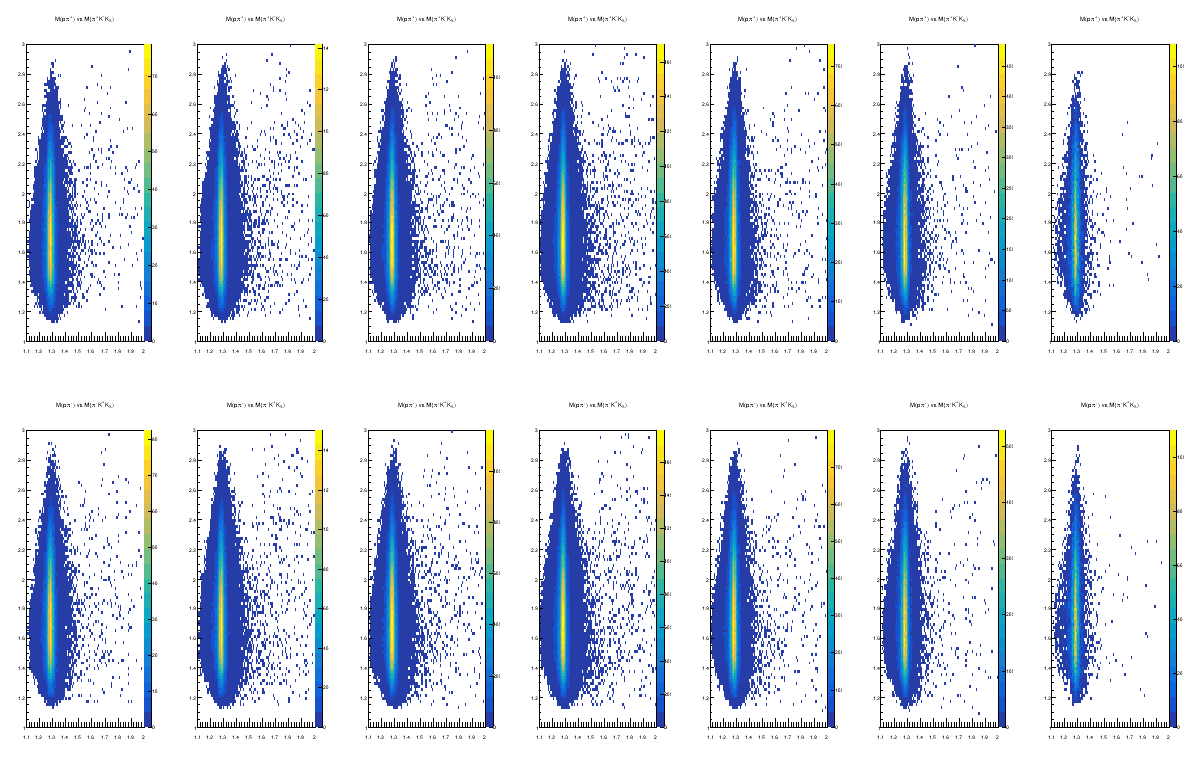

In [58]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_ppip_vs_kkpi, hists_ppim_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $p\pi$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $p\pi^+$, bottom row is $p\pi^-$**

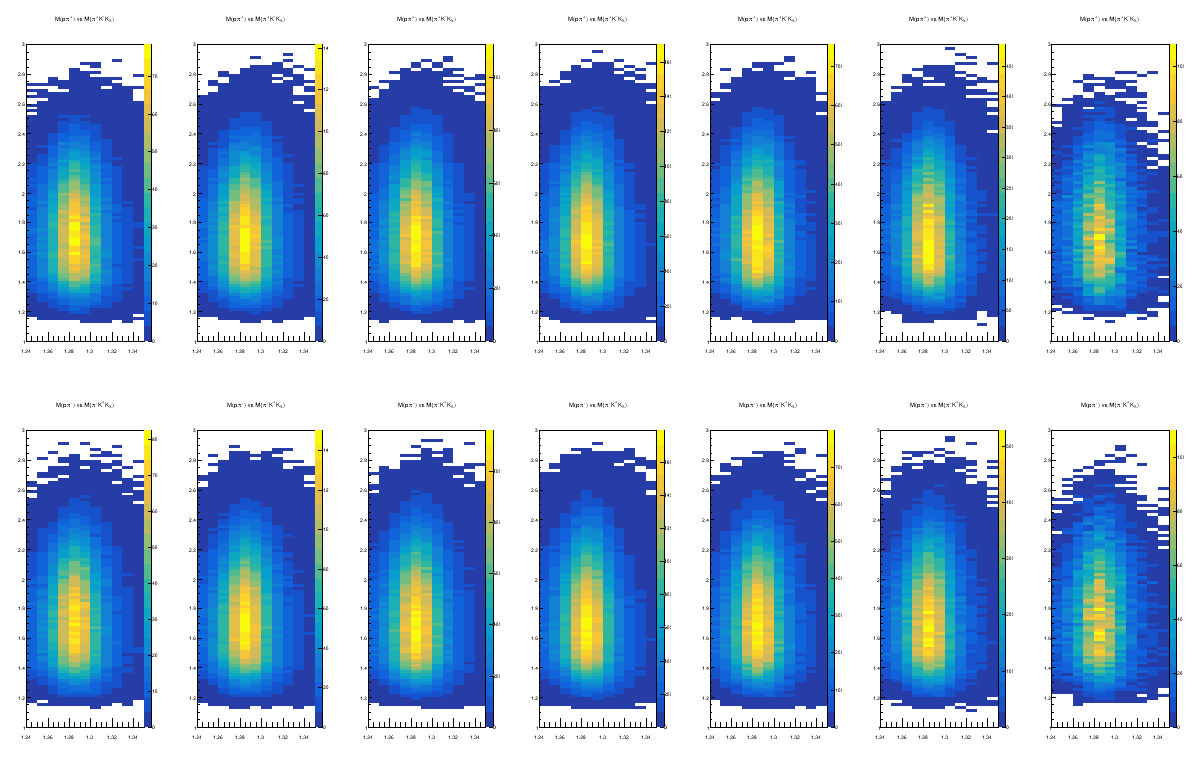

In [59]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_ppip_vs_kkpi_f1, hists_ppim_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $p\pi$ cut

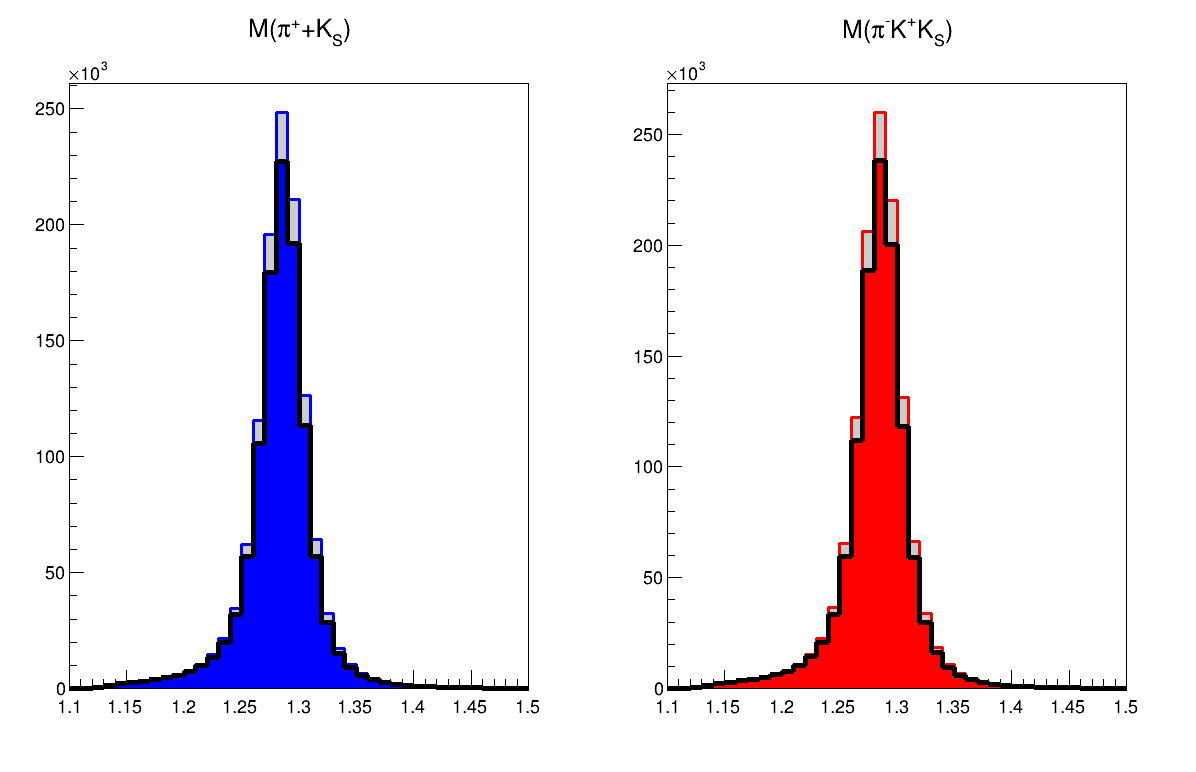

In [60]:
c.Clear()
c.Divide(2,1)

legend_ppi_before_after = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)

hist_pipkmks_before_ppi.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_ppi.SetFillColor(ROOT.kGray)
hist_pipkmks_before_ppi.SetLineWidth(3)
hist_pimkpks_after_ppi.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_ppi.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_ppi.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_ppi.SetLineWidth(5)
hist_pimkpks_before_ppi.SetLineColor(ROOT.kRed)
hist_pimkpks_before_ppi.SetLineWidth(3)
hist_pimkpks_before_ppi.SetFillColor(ROOT.kGray)
hist_pimkpks_after_ppi.SetFillColor(ROOT.kRed)
hist_pimkpks_after_ppi.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_ppi.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_ppi.Draw()
hist_pipkmks_after_ppi.Draw('same')

c.cd(2)
hist_pimkpks_before_ppi.Draw()
hist_pimkpks_after_ppi.Draw('same')

c.Draw()

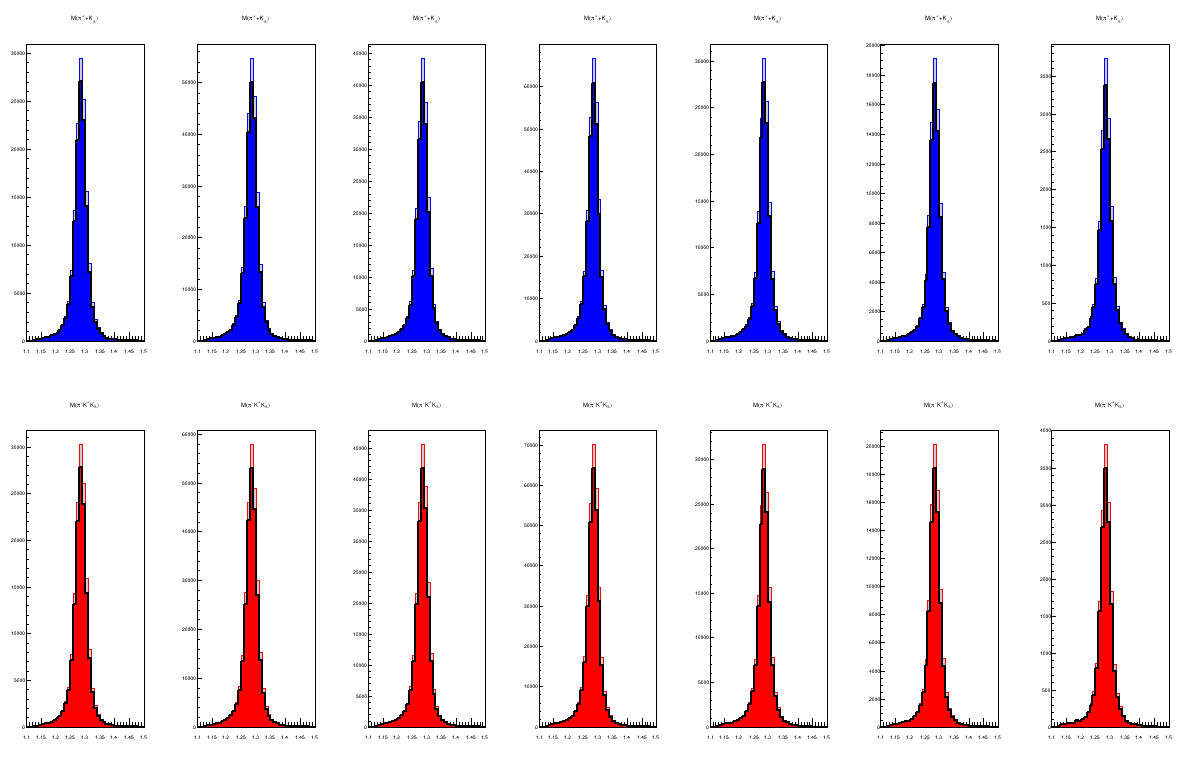

In [61]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_ppi, h_pipkmks_after_ppi, h_pimkpks_before_ppi, h_pimkpks_after_ppi) in enumerate(zip(hists_pipkmks_before_ppi, hists_pipkmks_after_ppi, hists_pimkpks_before_ppi, hists_pimkpks_after_ppi)):
    h_pipkmks_before_ppi.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_ppi.SetFillColor(ROOT.kGray)
    h_pipkmks_before_ppi.SetLineWidth(1)
    h_pipkmks_after_ppi.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_ppi.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_ppi.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_ppi.SetLineWidth(2)
    h_pimkpks_before_ppi.SetLineColor(ROOT.kRed)
    h_pimkpks_before_ppi.SetLineWidth(1)
    h_pimkpks_before_ppi.SetFillColor(ROOT.kGray)
    h_pimkpks_after_ppi.SetFillColor(ROOT.kRed)
    h_pimkpks_after_ppi.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_ppi.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_ppi.Draw()
    h_pipkmks_after_ppi.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_ppi.Draw()
    h_pimkpks_after_ppi.Draw('same')
c.Draw()

<a id="draw-pks-plots"></a>
## $pK_s$

#### $pK_s$ Mass Distribution

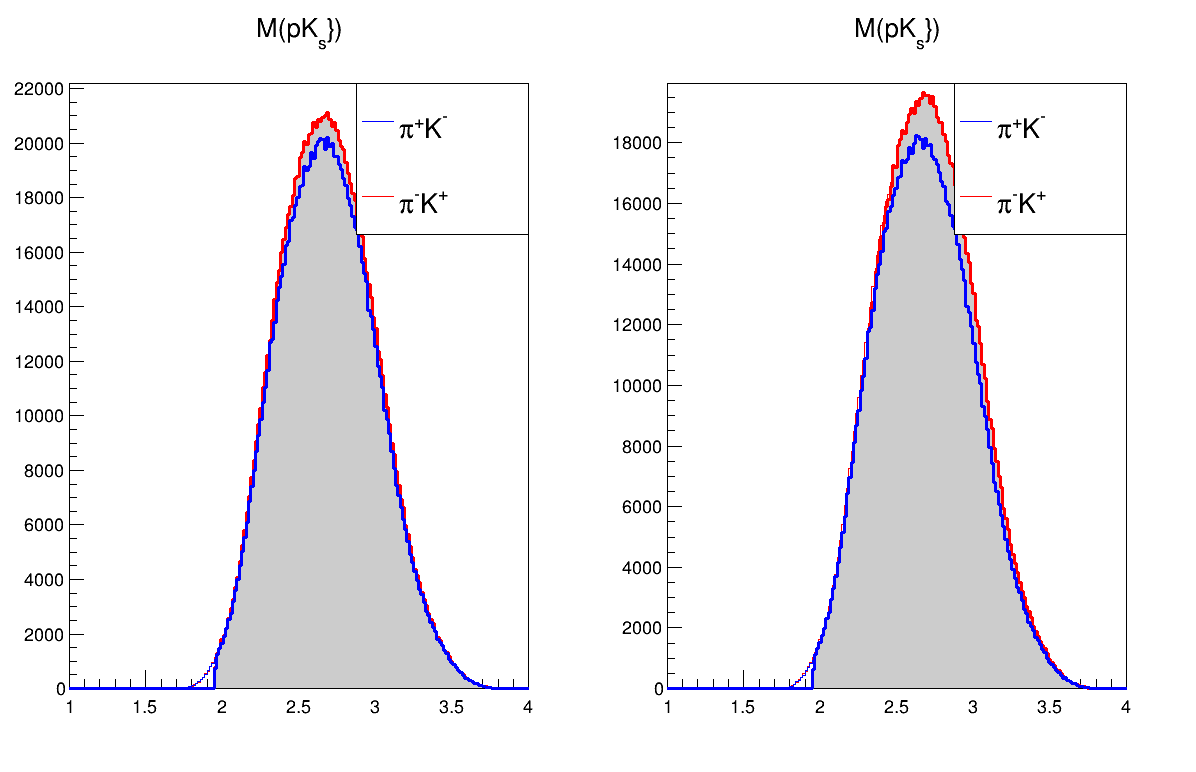

In [62]:
hist_pks_pipkmks.SetLineColor(ROOT.kBlue)
hist_pks_pimkpks.SetLineColor(ROOT.kRed)
hist_pks_pipkmks_shaded.SetFillColor(ROOT.kGray)
hist_pks_pipkmks_shaded.SetLineColor(ROOT.kBlue)
hist_pks_pipkmks_shaded.SetLineWidth(3)
hist_pks_pimkpks_shaded.SetFillColor(ROOT.kGray)
hist_pks_pimkpks_shaded.SetLineColor(ROOT.kRed)
hist_pks_pimkpks_shaded.SetLineWidth(3)
hist_pks_pipkmks_f1.SetLineColor(ROOT.kBlue)
hist_pks_pimkpks_f1.SetLineColor(ROOT.kRed)
hist_pks_pipkmks_f1_shaded.SetFillColor(ROOT.kGray)
hist_pks_pipkmks_f1_shaded.SetLineColor(ROOT.kBlue)
hist_pks_pipkmks_f1_shaded.SetLineWidth(3)
hist_pks_pimkpks_f1_shaded.SetFillColor(ROOT.kGray)
hist_pks_pimkpks_f1_shaded.SetLineColor(ROOT.kRed)
hist_pks_pimkpks_f1_shaded.SetLineWidth(3)

legend_pks = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_pks.AddEntry(hist_pks_pipkmks.GetPtr(), '#pi^{+}K^{-}', 'l')
legend_pks.AddEntry(hist_pks_pimkpks.GetPtr(), '#pi^{-}K^{+}', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pks_pimkpks.Draw()
hist_pks_pipkmks.Draw('same')
hist_pks_pimkpks_shaded.Draw('same')
hist_pks_pipkmks_shaded.Draw('same')
legend_pks.Draw()

c.cd(2)
hist_pks_pimkpks_f1.Draw()
hist_pks_pipkmks_f1.Draw('same')
hist_pks_pimkpks_f1_shaded.Draw('same')
hist_pks_pipkmks_f1_shaded.Draw('same')
legend_pks.Draw()

c.Draw()


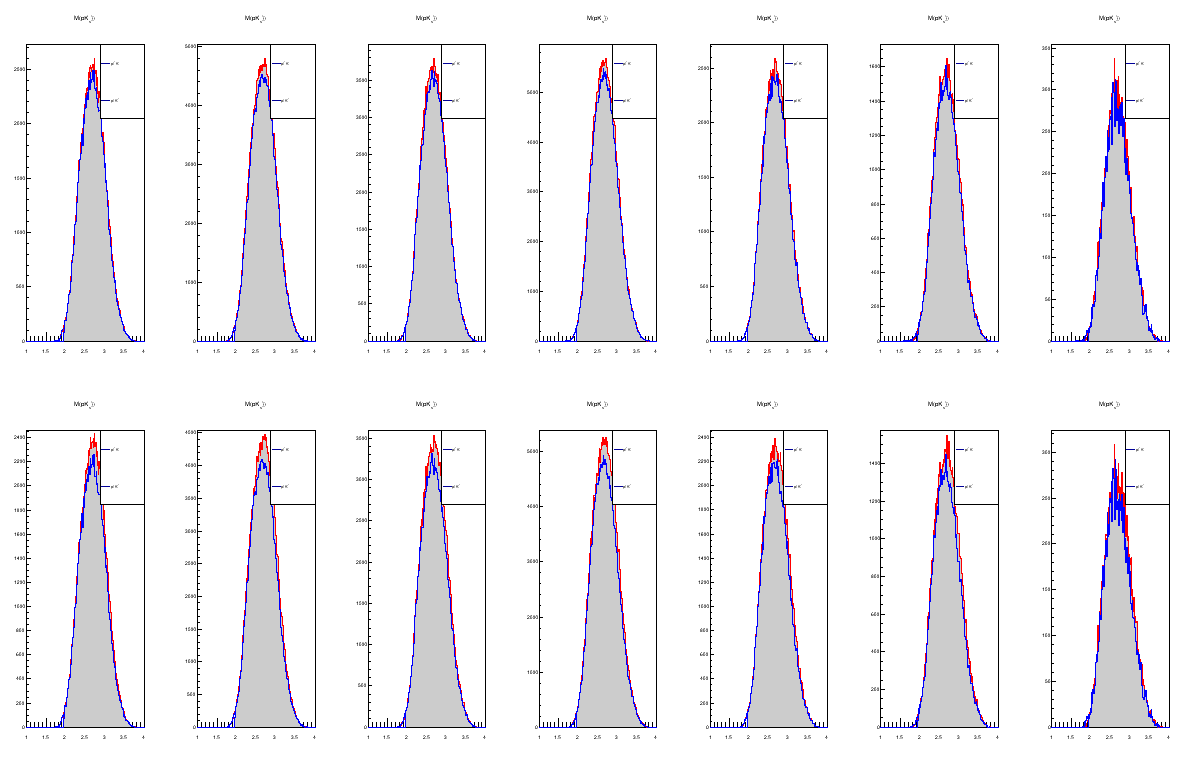

In [63]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_pks_pipkmks, hists_pks_pimkpks, hists_pks_pipkmks_shaded, hists_pks_pimkpks_shaded)):
    legend_pks_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_pks_binned.AddEntry(hist_pip.GetPtr(), 'pi^{+}K^{-}', 'l')
    legend_pks_binned.AddEntry(hist_pim.GetPtr(), 'pi^{-}K^{+}', 'l')
    legends.append(legend_pks_binned)
    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+1)
    h_pim.Draw()
    h_pip.Draw('same')
    h_pim_shaded.Draw('same')
    h_pip_shaded.Draw('same')
    legends[i].Draw()


for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_pks_pipkmks_f1, hists_pks_pimkpks_f1, hists_pks_pipkmks_f1_shaded, hists_pks_pimkpks_f1_shaded)):    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+8)
    h_pim.Draw()
    h_pip.Draw('same')
    h_pim_shaded.Draw('same')
    h_pip_shaded.Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(p\pi)$ vs $M(KK\pi)$ Distribution

**Top Row: $\pi^+K^{-}$, Bottom Row: $\pi^-K^+$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

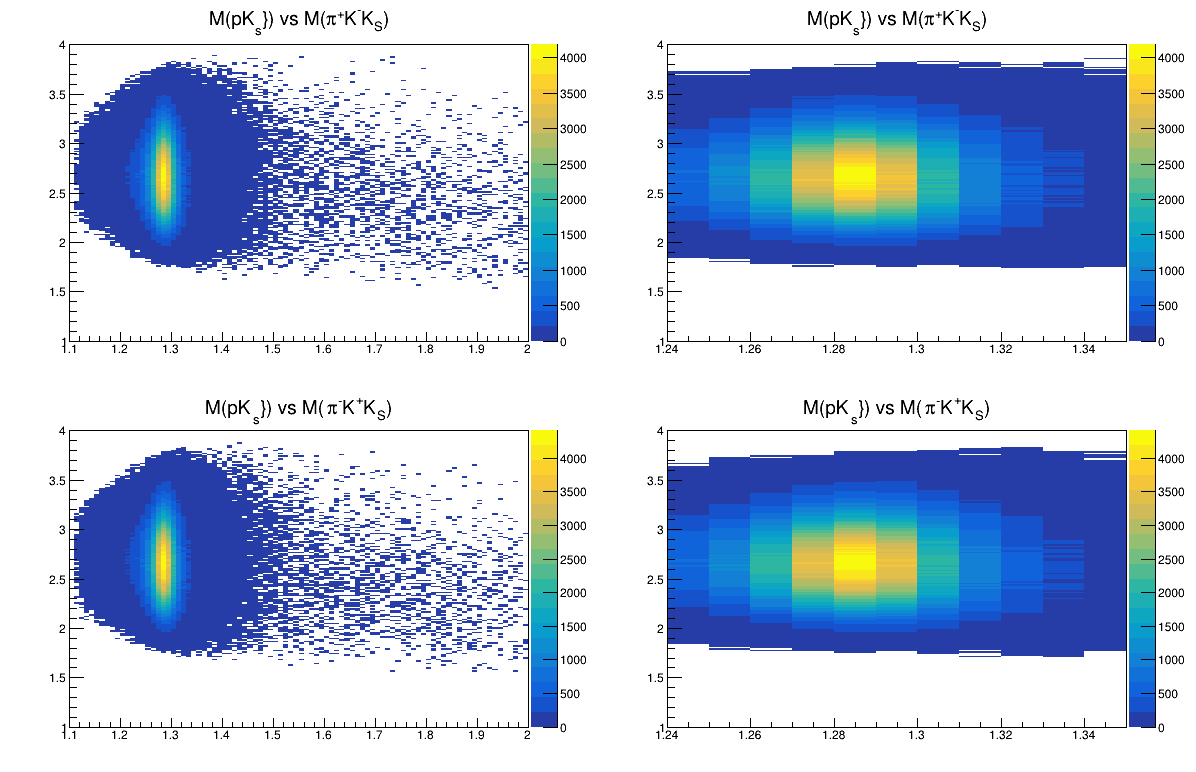

In [64]:
c.Clear()
c.Divide(2,2)
c.cd(1)
hist_pks_pipkmks_vs_kkpi.Draw('colz')
c.cd(2)
hist_pks_pipkmks_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_pks_pimkpks_vs_kkpi.Draw('colz')
c.cd(4)
hist_pks_pimkpks_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $pK_s$ vs $KK\pi$ over whole mass region

**Top row is $p\pi^+$, bottom row is $p\pi^-$**

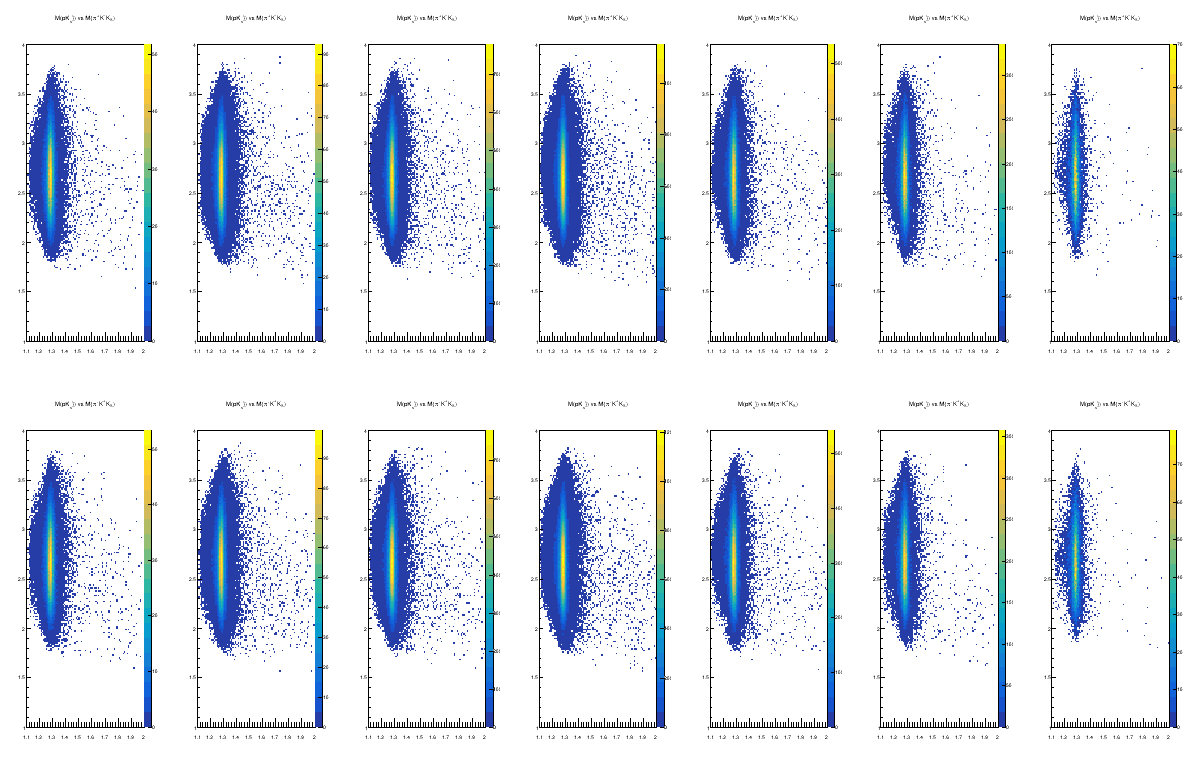

In [65]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_pks_pipkmks_vs_kkpi, hists_pks_pimkpks_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $pK_s$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $\pi^+K^-$, bottom row is $\pi^-K^+$**

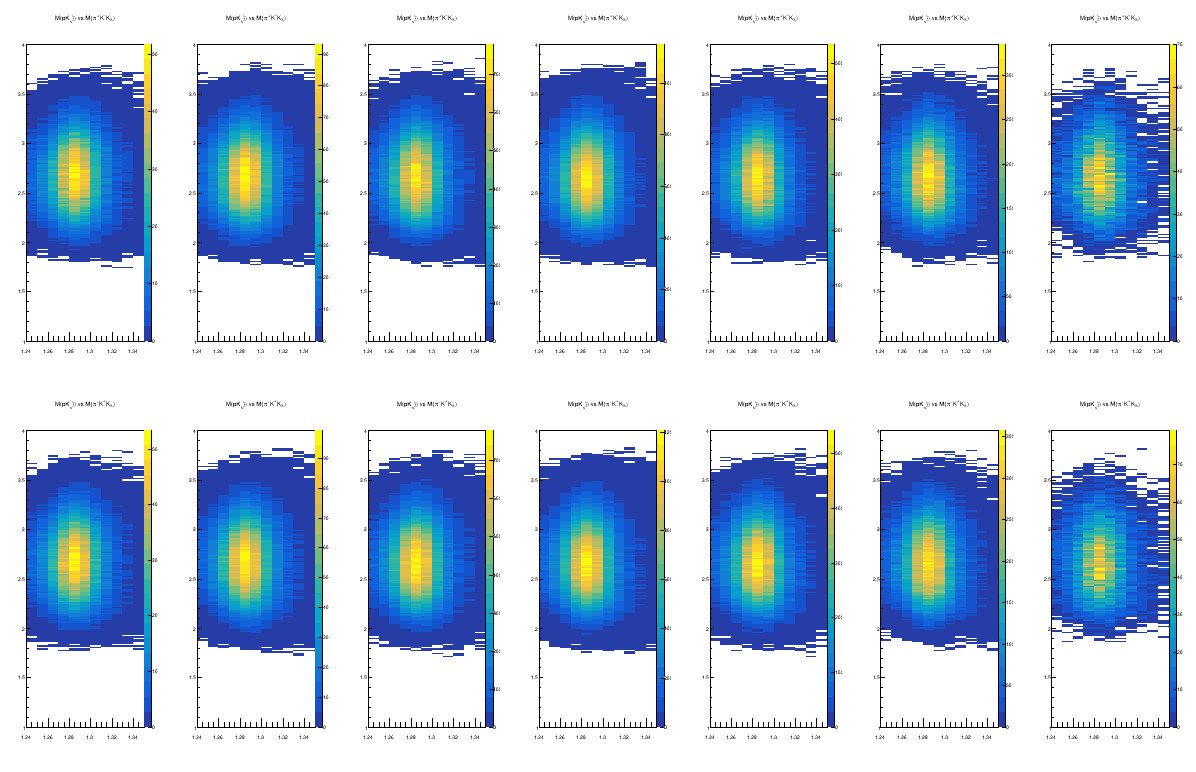

In [66]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_pks_pipkmks_vs_kkpi_f1, hists_pks_pimkpks_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $pK_s$ cut

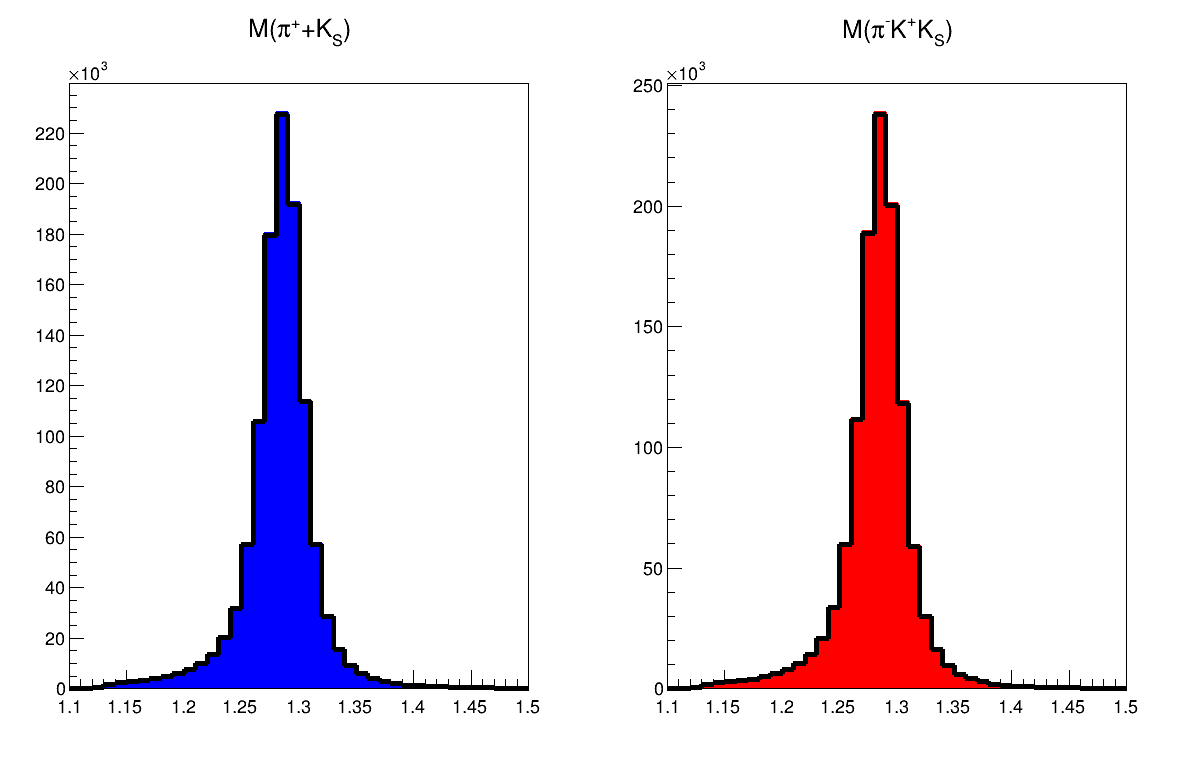

In [67]:
c.Clear()
c.Divide(2,1)

legend_pks_before_after = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)

hist_pipkmks_before_pks.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_pks.SetFillColor(ROOT.kGray)
hist_pipkmks_before_pks.SetLineWidth(3)
hist_pimkpks_after_pks.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_pks.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_pks.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_pks.SetLineWidth(5)
hist_pimkpks_before_pks.SetLineColor(ROOT.kRed)
hist_pimkpks_before_pks.SetLineWidth(3)
hist_pimkpks_before_pks.SetFillColor(ROOT.kGray)
hist_pimkpks_after_pks.SetFillColor(ROOT.kRed)
hist_pimkpks_after_pks.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_pks.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_pks.Draw()
hist_pipkmks_after_pks.Draw('same')

c.cd(2)
hist_pimkpks_before_pks.Draw()
hist_pimkpks_after_pks.Draw('same')

c.Draw()

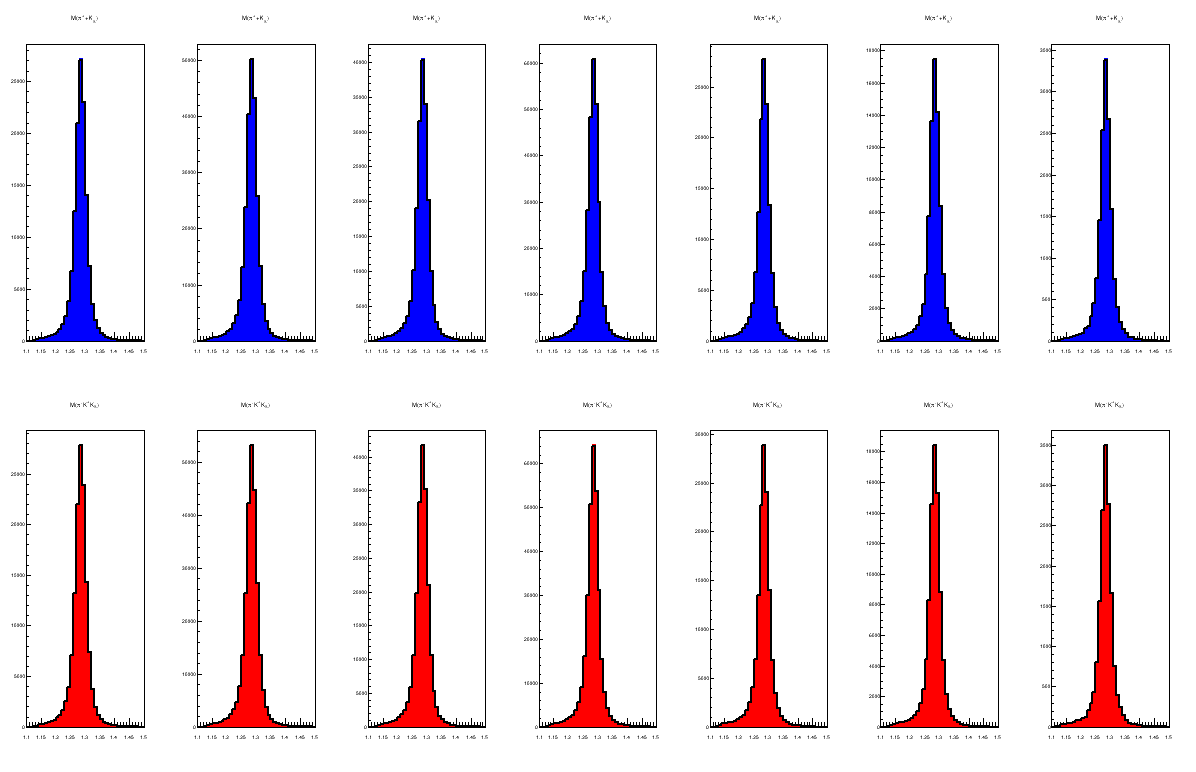

In [68]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_pks, h_pipkmks_after_pks, h_pimkpks_before_pks, h_pimkpks_after_pks) in enumerate(zip(hists_pipkmks_before_pks, hists_pipkmks_after_pks, hists_pimkpks_before_pks, hists_pimkpks_after_pks)):
    h_pipkmks_before_pks.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_pks.SetFillColor(ROOT.kGray)
    h_pipkmks_before_pks.SetLineWidth(1)
    h_pipkmks_after_pks.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_pks.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_pks.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_pks.SetLineWidth(2)
    h_pimkpks_before_pks.SetLineColor(ROOT.kRed)
    h_pimkpks_before_pks.SetLineWidth(1)
    h_pimkpks_before_pks.SetFillColor(ROOT.kGray)
    h_pimkpks_after_pks.SetFillColor(ROOT.kRed)
    h_pimkpks_after_pks.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_pks.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_pks.Draw()
    h_pipkmks_after_pks.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_pks.Draw()
    h_pimkpks_after_pks.Draw('same')
c.Draw()

<a id="draw-pk-plots"></a>
## $pK^\mp$

#### $pK^\mp$ Mass Distribution

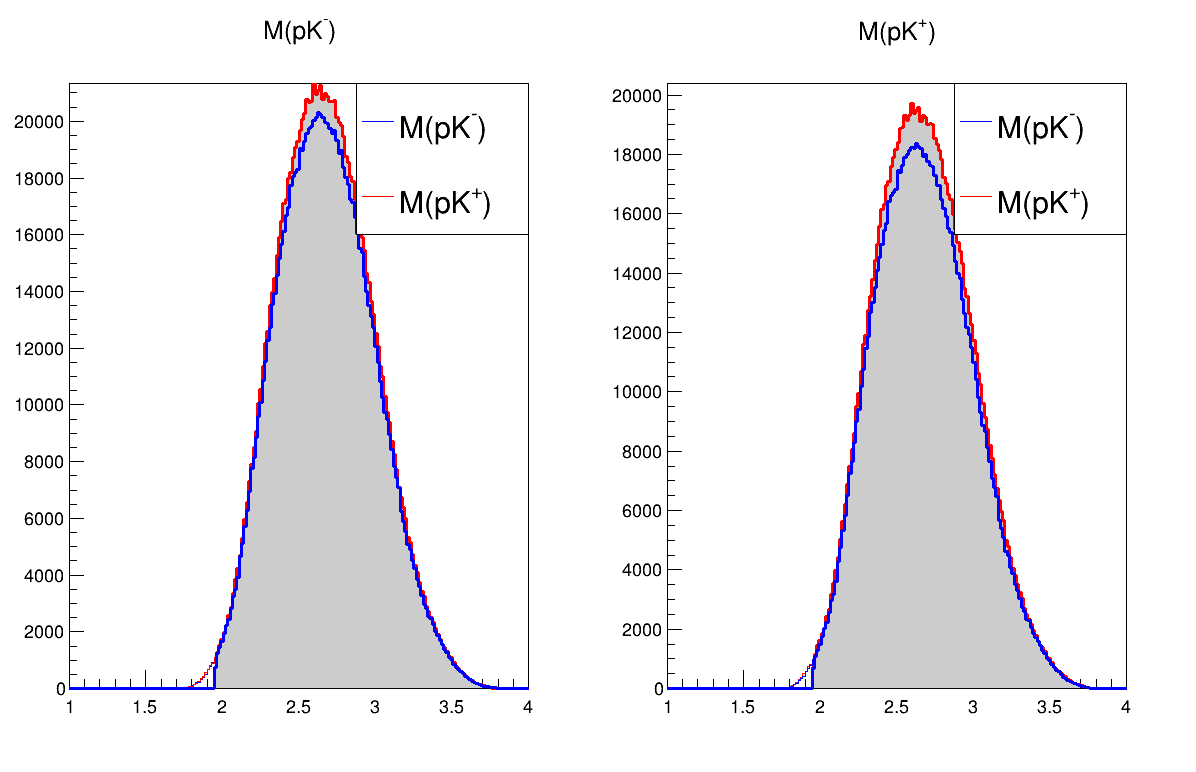

In [69]:
hist_pkm.SetLineColor(ROOT.kBlue)
hist_pkp.SetLineColor(ROOT.kRed)
hist_pkm_shaded.SetFillColor(ROOT.kGray)
hist_pkm_shaded.SetLineColor(ROOT.kBlue)
hist_pkm_shaded.SetLineWidth(3)
hist_pkp_shaded.SetFillColor(ROOT.kGray)
hist_pkp_shaded.SetLineColor(ROOT.kRed)
hist_pkp_shaded.SetLineWidth(3)
hist_pkm_f1.SetLineColor(ROOT.kBlue)
hist_pkp_f1.SetLineColor(ROOT.kRed)
hist_pkm_f1_shaded.SetFillColor(ROOT.kGray)
hist_pkm_f1_shaded.SetLineColor(ROOT.kBlue)
hist_pkm_f1_shaded.SetLineWidth(3)
hist_pkp_f1_shaded.SetFillColor(ROOT.kGray)
hist_pkp_f1_shaded.SetLineColor(ROOT.kRed)
hist_pkp_f1_shaded.SetLineWidth(3)

legend_pk = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_pk.AddEntry(hist_pkm.GetPtr(), 'M(pK^{-})', 'l')
legend_pk.AddEntry(hist_pkp.GetPtr(), 'M(pK^{+})', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pkm.Draw()
hist_pkp.Draw('same')
hist_pkp_shaded.Draw('same')
hist_pkm_shaded.Draw('same')
legend_pk.Draw()

c.cd(2)
hist_pkp_f1.Draw()
hist_pkm_f1.Draw('same')
hist_pkp_f1_shaded.Draw('same')
hist_pkm_f1_shaded.Draw('same')
legend_pk.Draw()

c.Draw()


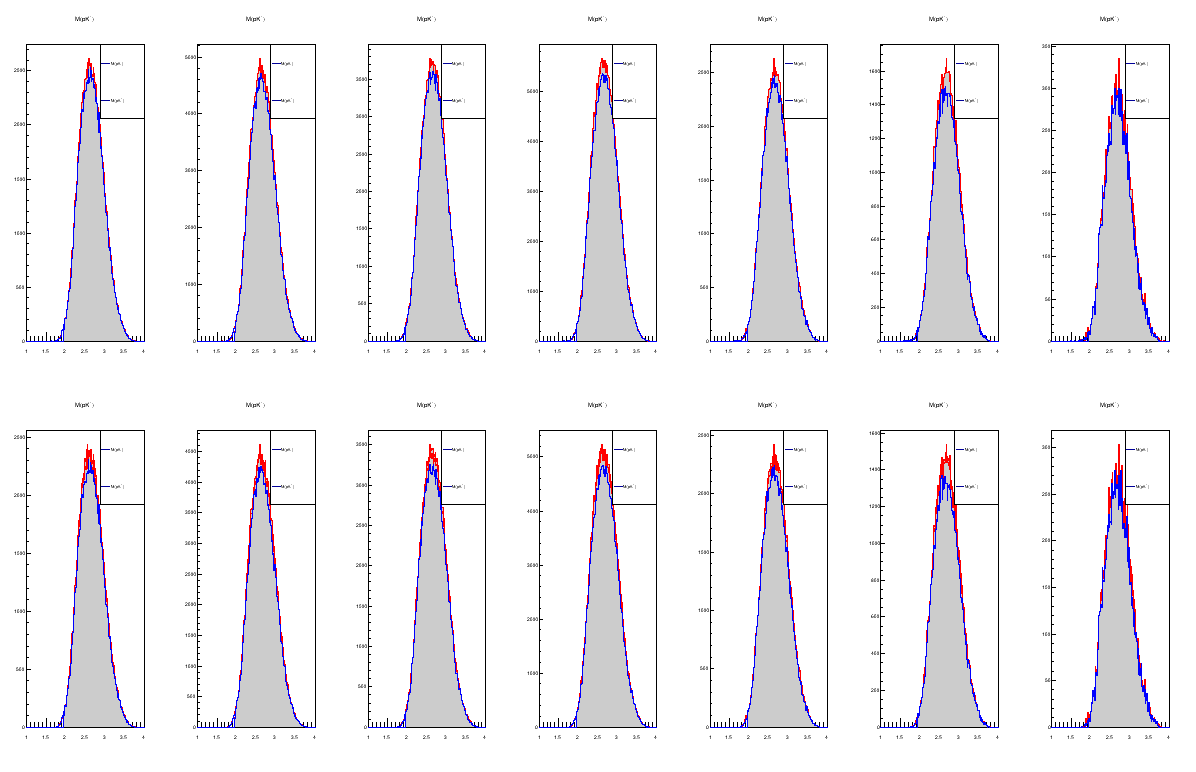

In [70]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_pkm, hists_pkp, hists_pkm_shaded, hists_pkp_shaded)):
    legend_pk_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_pk_binned.AddEntry(hist_pip.GetPtr(), 'M(pK^{-})', 'l')
    legend_pk_binned.AddEntry(hist_pim.GetPtr(), 'M(pK^{+})', 'l')
    legends.append(legend_pk_binned)
    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+1)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()


for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_pkm_f1, hists_pkp_f1, hists_pkm_f1_shaded, hists_pkp_f1_shaded)):    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+8)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(pK^\mp)$ vs $M(KK\pi)$ Distribution

**Top Row: $\pi^+K^{-}$, Bottom Row: $\pi^-K^+$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

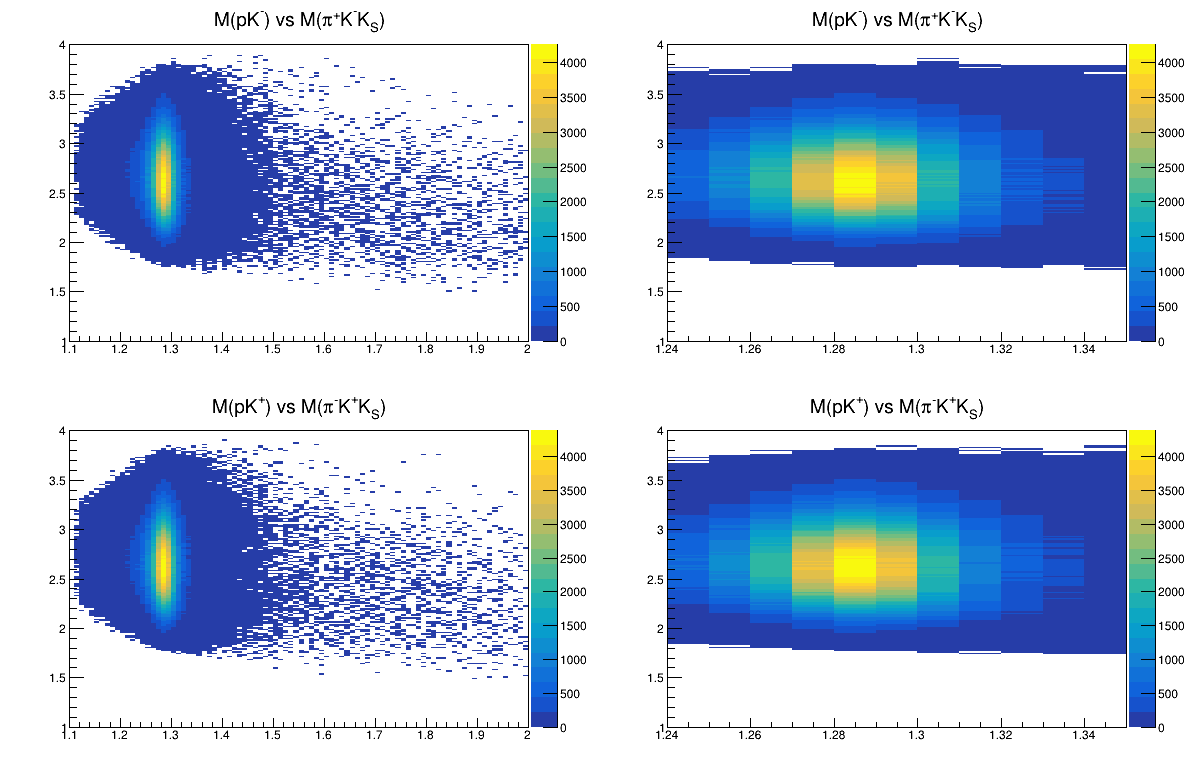

In [71]:
c.Clear()
c.Divide(2,2)
c.cd(1)
hist_pkm_vs_kkpi.Draw('colz')
c.cd(2)
hist_pkm_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_pkp_vs_kkpi.Draw('colz')
c.cd(4)
hist_pkp_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $pK^\mp$ vs $KK\pi$ over whole mass region

**Top row is $pK^-$, bottom row is $pK^+$**

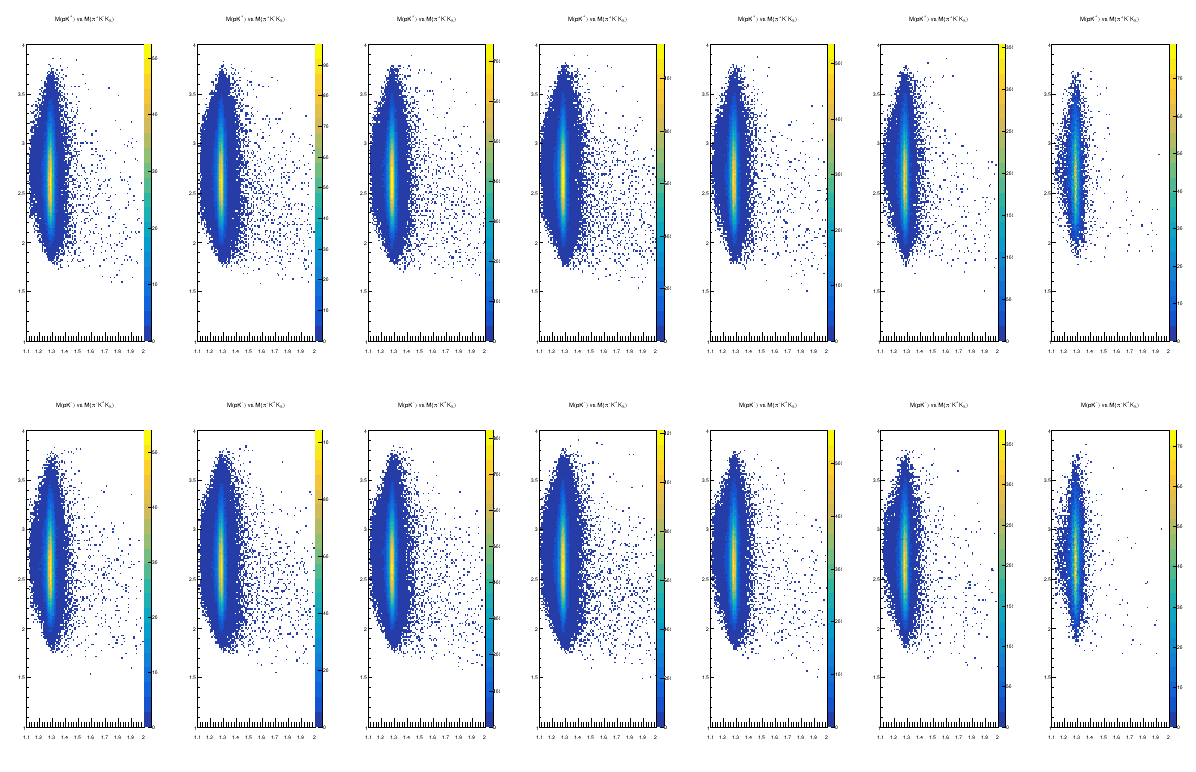

In [72]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_pkm_vs_kkpi, hists_pkp_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $pK^\mp$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $\pi^+K^-$, bottom row is $\pi^-K^+$**

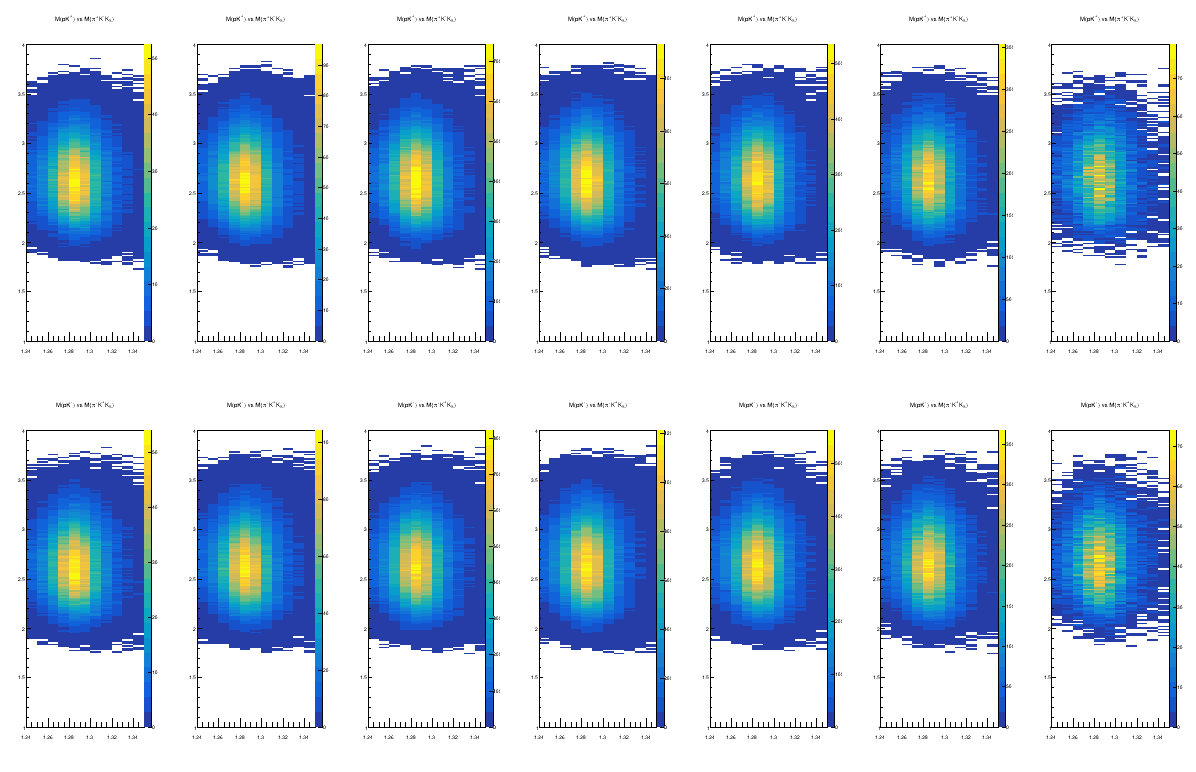

In [73]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_pkm_vs_kkpi_f1, hists_pkp_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $pK^\mp$ cut

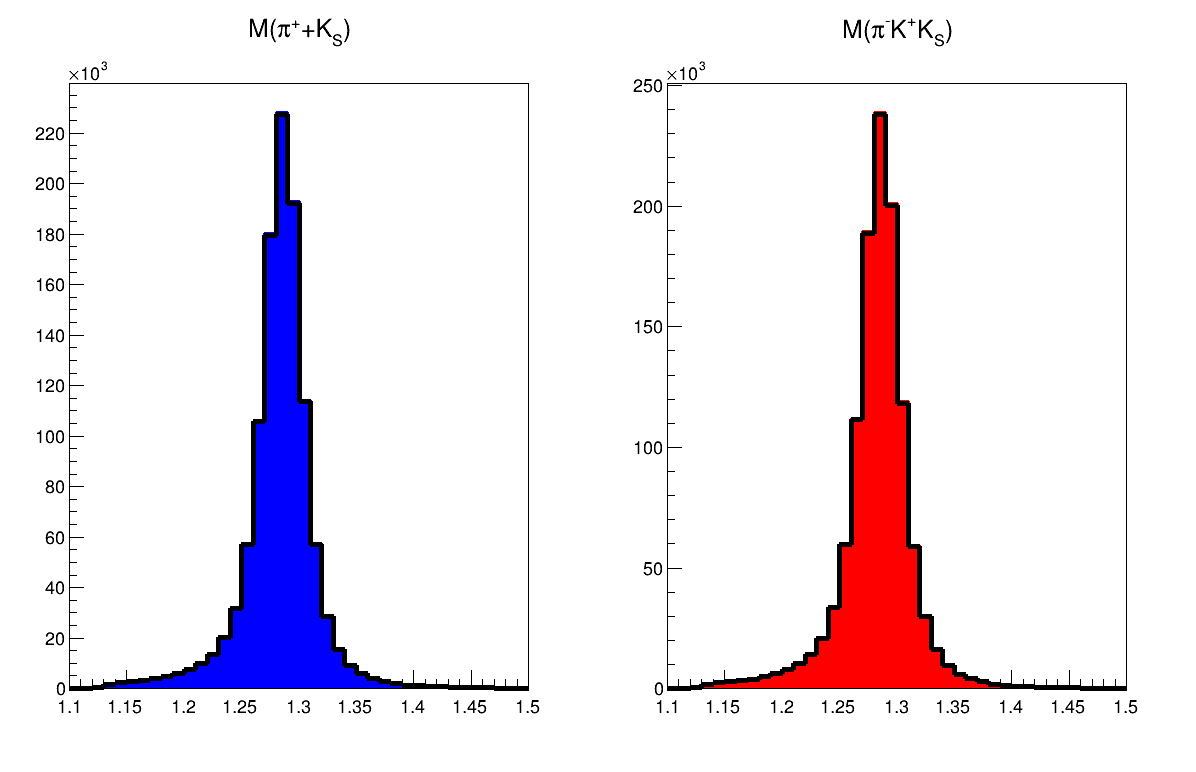

In [74]:
c.Clear()
c.Divide(2,1)

hist_pipkmks_before_pkm.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_pkm.SetFillColor(ROOT.kGray)
hist_pipkmks_before_pkm.SetLineWidth(3)
hist_pimkpks_after_pkp.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_pkm.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_pkm.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_pkm.SetLineWidth(5)
hist_pimkpks_before_pkp.SetLineColor(ROOT.kRed)
hist_pimkpks_before_pkp.SetLineWidth(3)
hist_pimkpks_before_pkp.SetFillColor(ROOT.kGray)
hist_pimkpks_after_pkp.SetFillColor(ROOT.kRed)
hist_pimkpks_after_pkp.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_pkp.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_pkm.Draw()
hist_pipkmks_after_pkm.Draw('same')

c.cd(2)
hist_pimkpks_before_pkp.Draw()
hist_pimkpks_after_pkp.Draw('same')

c.Draw()

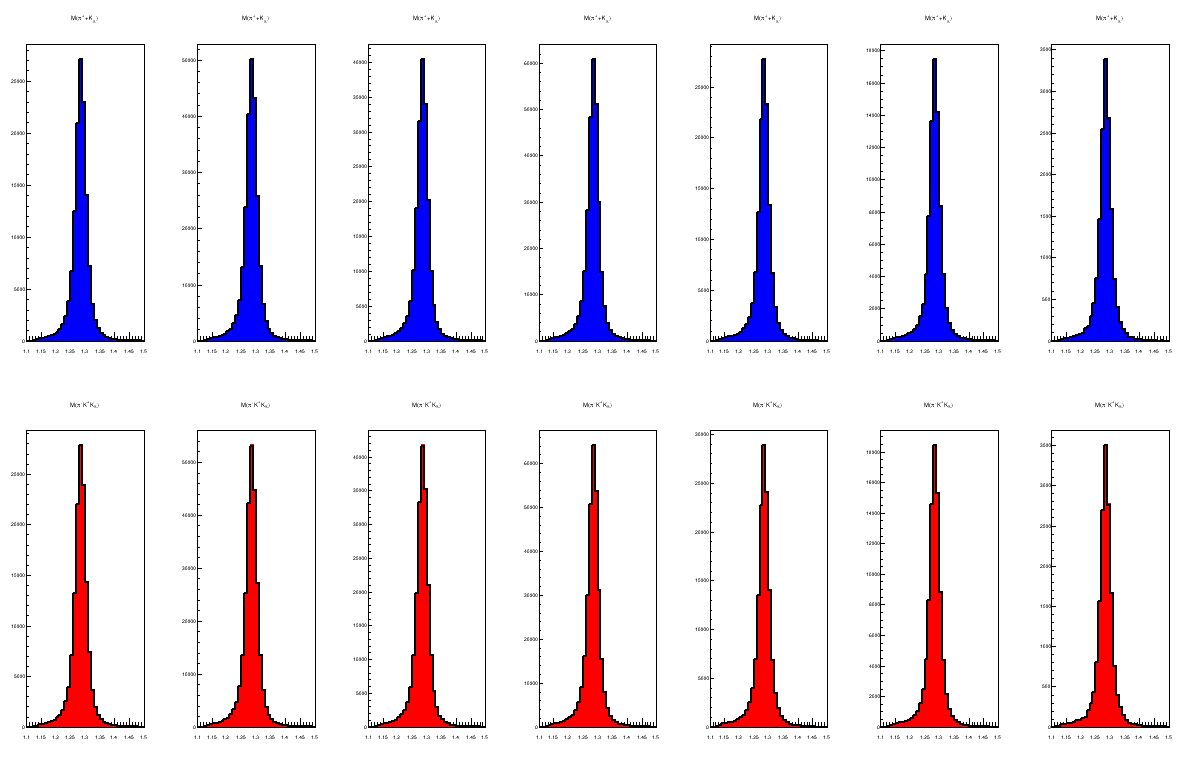

In [75]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_pkm, h_pipkmks_after_pkm, h_pimkpks_before_pkp, h_pimkpks_after_pkp) in enumerate(zip(hists_pipkmks_before_pkm, hists_pipkmks_after_pkm, hists_pimkpks_before_pkp, hists_pimkpks_after_pkp)):
    h_pipkmks_before_pkm.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_pkm.SetFillColor(ROOT.kGray)
    h_pipkmks_before_pkm.SetLineWidth(1)
    h_pipkmks_after_pkm.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_pkm.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_pkm.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_pkm.SetLineWidth(2)
    h_pimkpks_before_pkp.SetLineColor(ROOT.kRed)
    h_pimkpks_before_pkp.SetLineWidth(1)
    h_pimkpks_before_pkp.SetFillColor(ROOT.kGray)
    h_pimkpks_after_pkp.SetFillColor(ROOT.kRed)
    h_pimkpks_after_pkp.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_pkp.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_pkm.Draw()
    h_pipkmks_after_pkm.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_pkp.Draw()
    h_pimkpks_after_pkp.Draw('same')
c.Draw()

<a id="draw-kk-plots"></a>
## $K_s K^\mp$ 
K* cut is not applied to these plots. 

**This cut is not currently being used in the analysis.**

#### $K_s K^\mp$ Mass Distribution

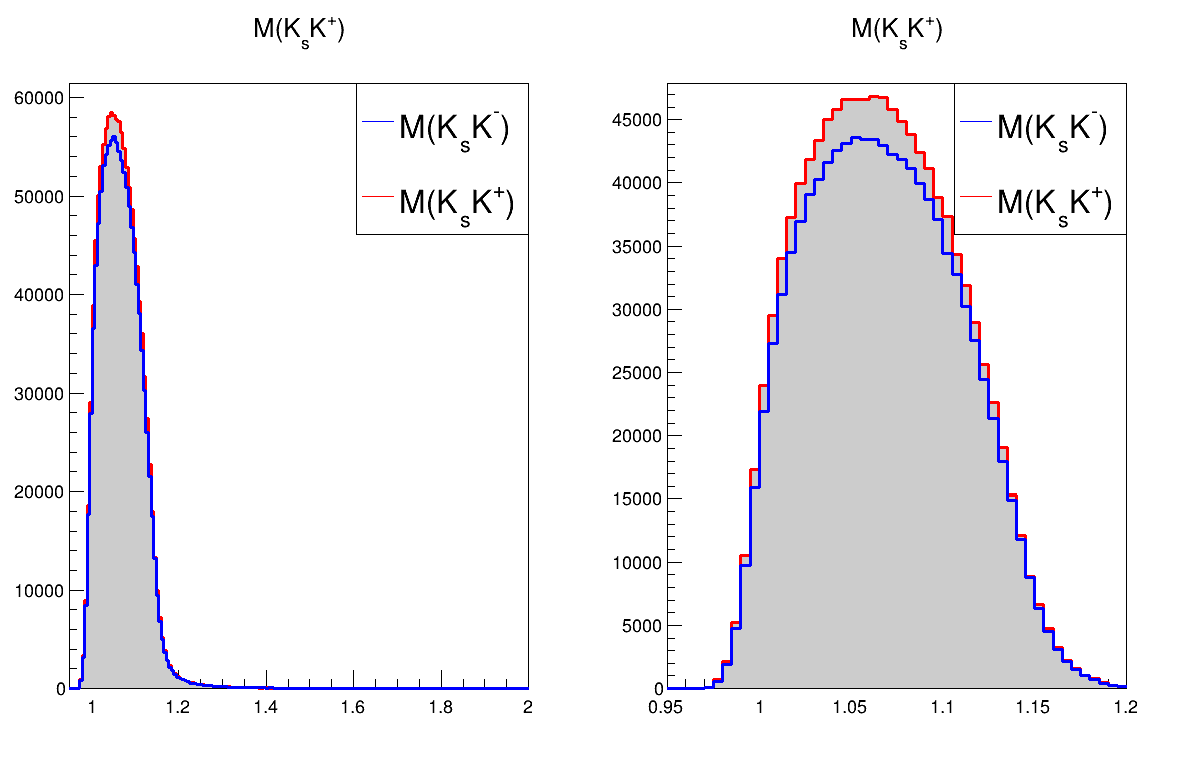

In [76]:
hist_kskm.SetLineColor(ROOT.kBlue)
hist_kskp.SetLineColor(ROOT.kRed)
hist_kskm_shaded.SetFillColor(ROOT.kGray)
hist_kskm_shaded.SetLineColor(ROOT.kBlue)
hist_kskm_shaded.SetLineWidth(3)
hist_kskp_shaded.SetFillColor(ROOT.kGray)
hist_kskp_shaded.SetLineColor(ROOT.kRed)
hist_kskp_shaded.SetLineWidth(3)
hist_kskm_f1.SetLineColor(ROOT.kBlue)
hist_kskp_f1.SetLineColor(ROOT.kRed)
hist_kskm_f1_shaded.SetFillColor(ROOT.kGray)
hist_kskm_f1_shaded.SetLineColor(ROOT.kBlue)
hist_kskm_f1_shaded.SetLineWidth(3)
hist_kskp_f1_shaded.SetFillColor(ROOT.kGray)
hist_kskp_f1_shaded.SetLineColor(ROOT.kRed)
hist_kskp_f1_shaded.SetLineWidth(3)

legend_kk = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_kk.AddEntry(hist_kskm.GetPtr(), 'M(K_{s}K^{-})', 'l')
legend_kk.AddEntry(hist_kskp.GetPtr(), 'M(K_{s}K^{+})', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kskp.Draw()
hist_kskm.Draw('same')
hist_kskp_shaded.Draw('same')
hist_kskm_shaded.Draw('same')
legend_kk.Draw()

c.cd(2)
hist_kskp_f1.Draw()
hist_kskm_f1.Draw('same')
hist_kskp_f1_shaded.Draw('same')
hist_kskm_f1_shaded.Draw('same')
legend_kk.Draw()

c.Draw()


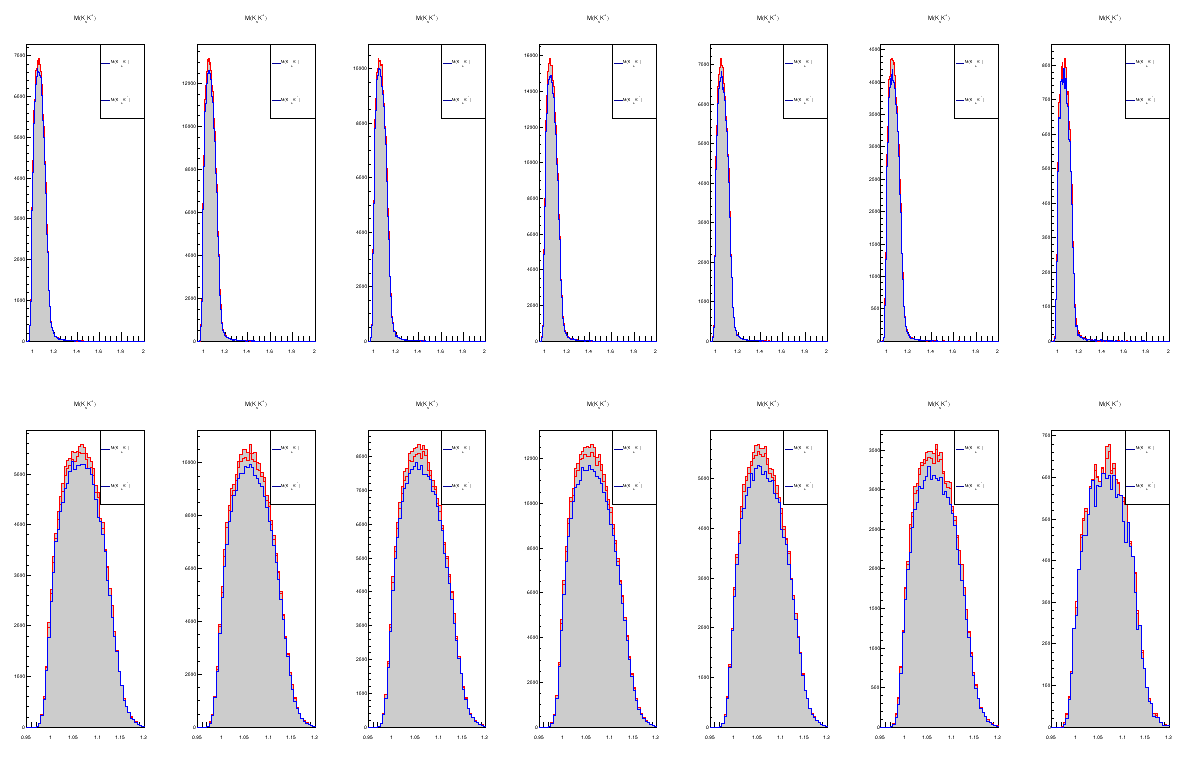

In [77]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kskm, hists_kskp, hists_kskm_shaded, hists_kskp_shaded)):
    legend_kk_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_kk_binned.AddEntry(hist_pip.GetPtr(), 'M(K_{s}K^{-})', 'l')
    legend_kk_binned.AddEntry(hist_pim.GetPtr(), 'M(K_{s}K^{+})', 'l')
    legends.append(legend_kk_binned)
    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+1)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()


for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kskm_f1, hists_kskp_f1, hists_kskm_f1_shaded, hists_kskp_f1_shaded)):    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+8)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(K_s K^\mp)$ vs $M(KK\pi)$ Distribution

**Top Row: $\pi^+K^{-}$, Bottom Row: $\pi^-K^+$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

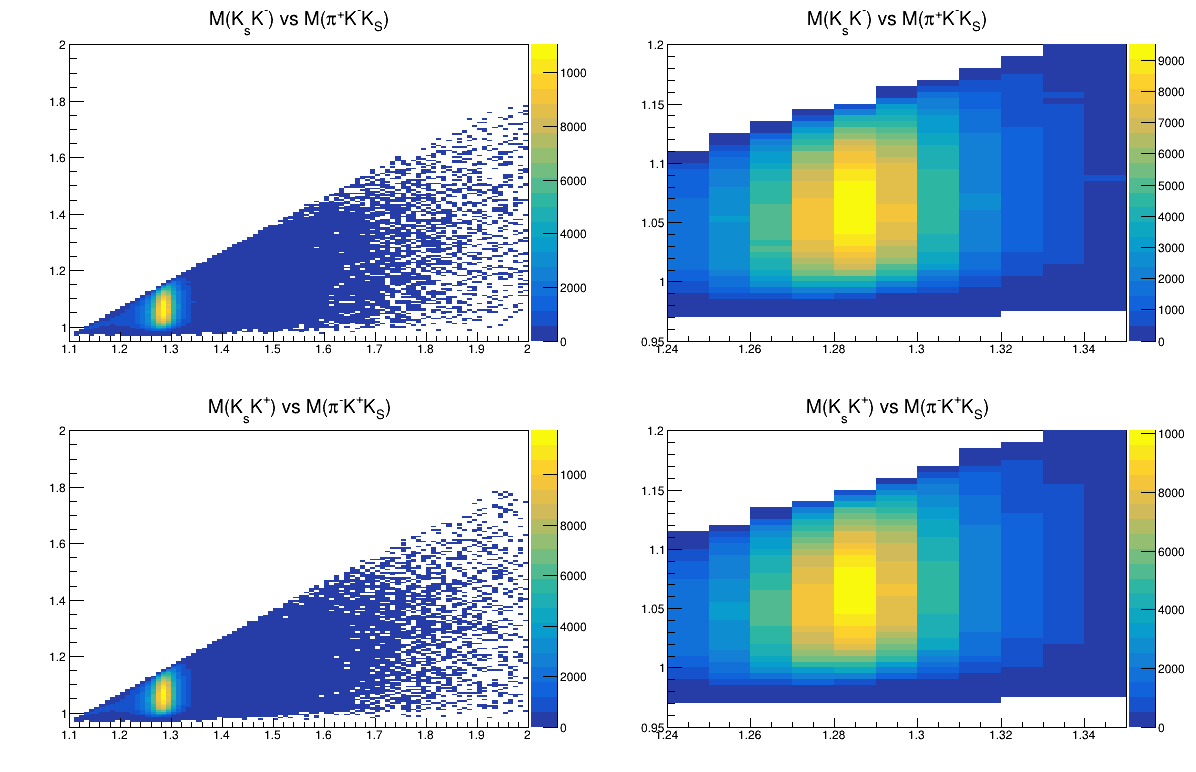

In [78]:
c.Clear()
c.Divide(2,2)
c.cd(1)
hist_kskm_vs_kkpi.Draw('colz')
c.cd(2)
hist_kskm_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_kskp_vs_kkpi.Draw('colz')
c.cd(4)
hist_kskp_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $K_s K^\mp$ vs $KK\pi$ over whole mass region

**Top row is $K_s K^-$, bottom row is $K_s K^+$**

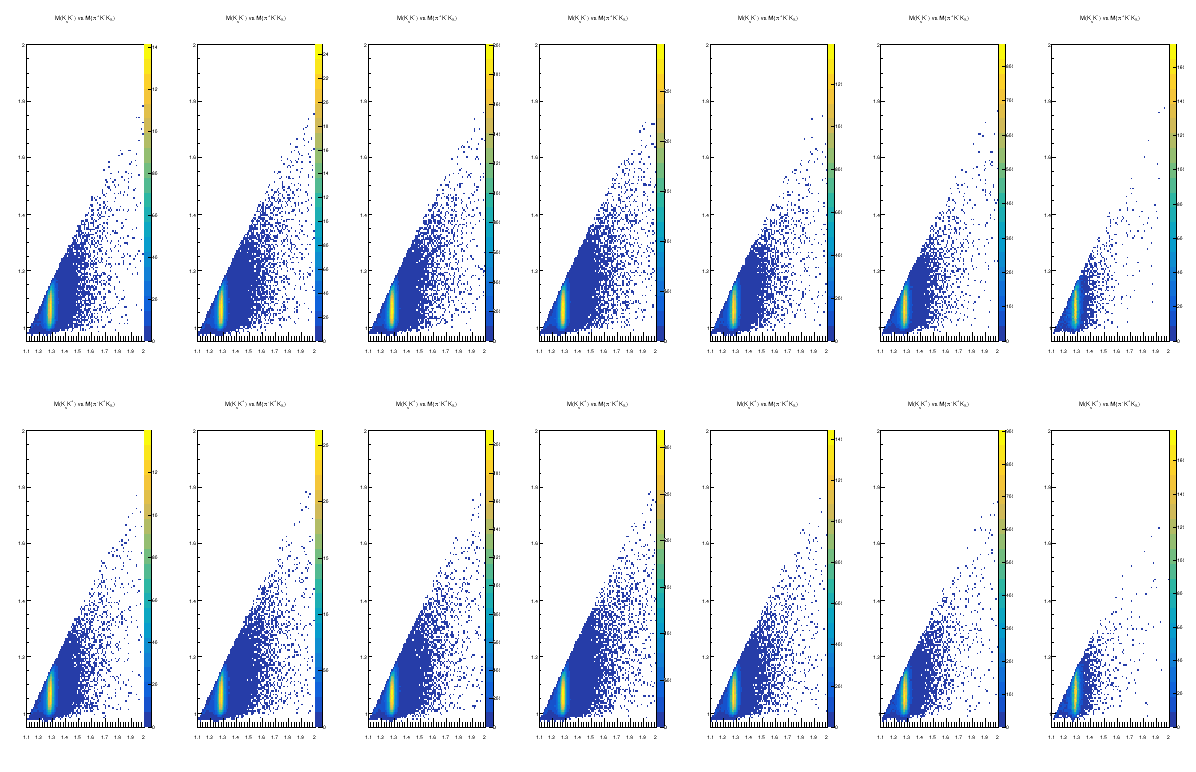

In [79]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kskm_vs_kkpi, hists_kskp_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $K_s K^\mp$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $\pi^+K^-$, bottom row is $\pi^-K^+$**

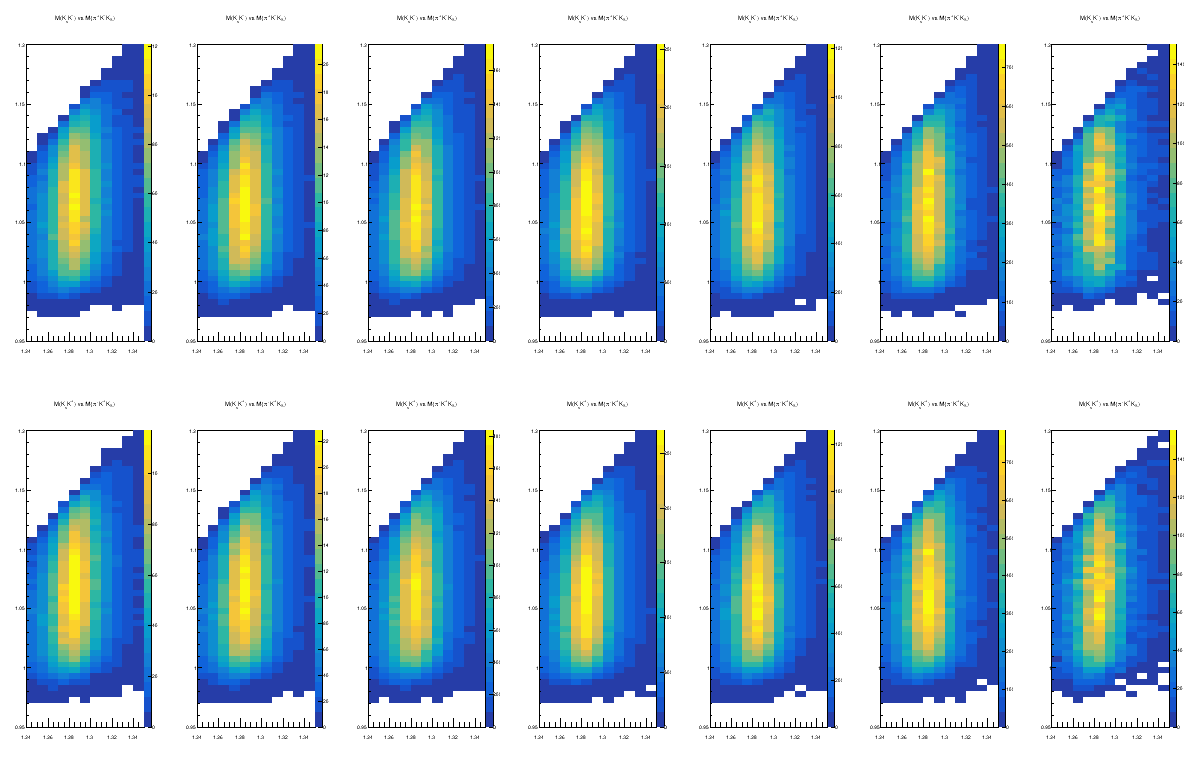

In [80]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kskm_vs_kkpi_f1, hists_kskp_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $K_s K^\mp$ cut

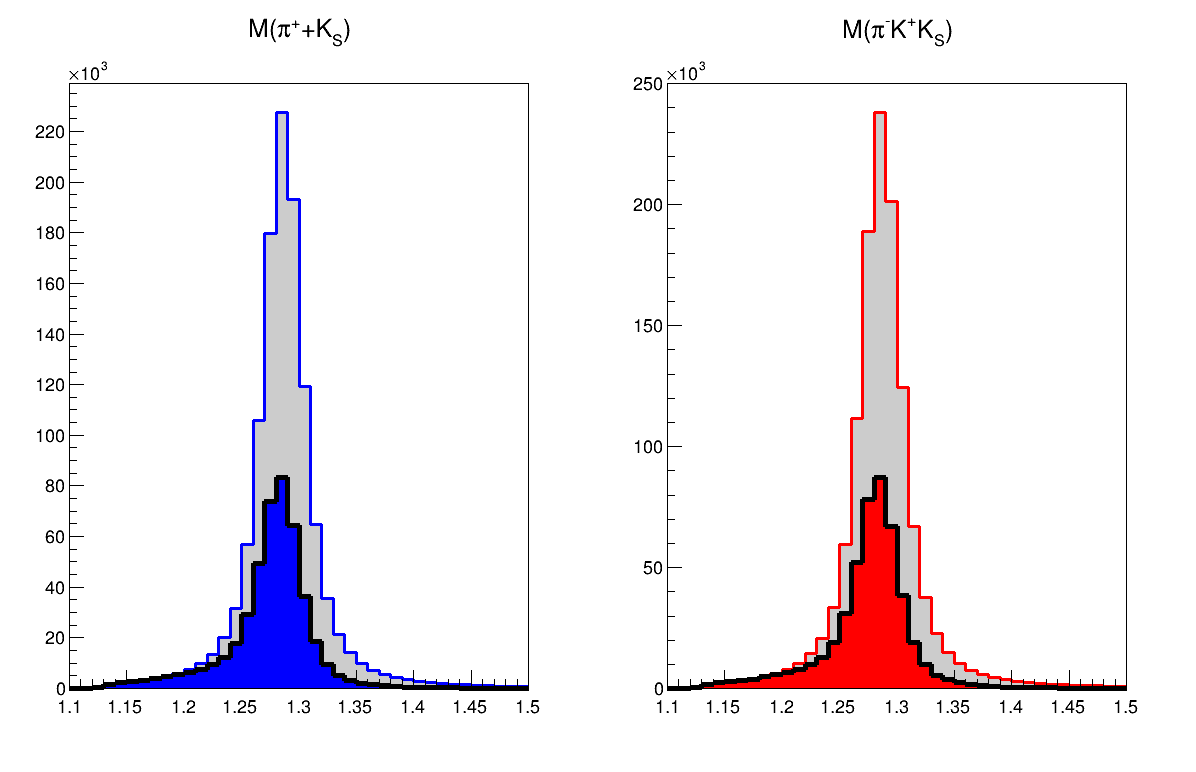

In [81]:
c.Clear()
c.Divide(2,1)

hist_pipkmks_before_kskm.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_kskm.SetFillColor(ROOT.kGray)
hist_pipkmks_before_kskm.SetLineWidth(3)
hist_pimkpks_after_kskp.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kskm.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kskm.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_kskm.SetLineWidth(5)
hist_pimkpks_before_kskp.SetLineColor(ROOT.kRed)
hist_pimkpks_before_kskp.SetLineWidth(3)
hist_pimkpks_before_kskp.SetFillColor(ROOT.kGray)
hist_pimkpks_after_kskp.SetFillColor(ROOT.kRed)
hist_pimkpks_after_kskp.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_kskp.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_kskm.Draw()
hist_pipkmks_after_kskm.Draw('same')

c.cd(2)
hist_pimkpks_before_kskp.Draw()
hist_pimkpks_after_kskp.Draw('same')

c.Draw()

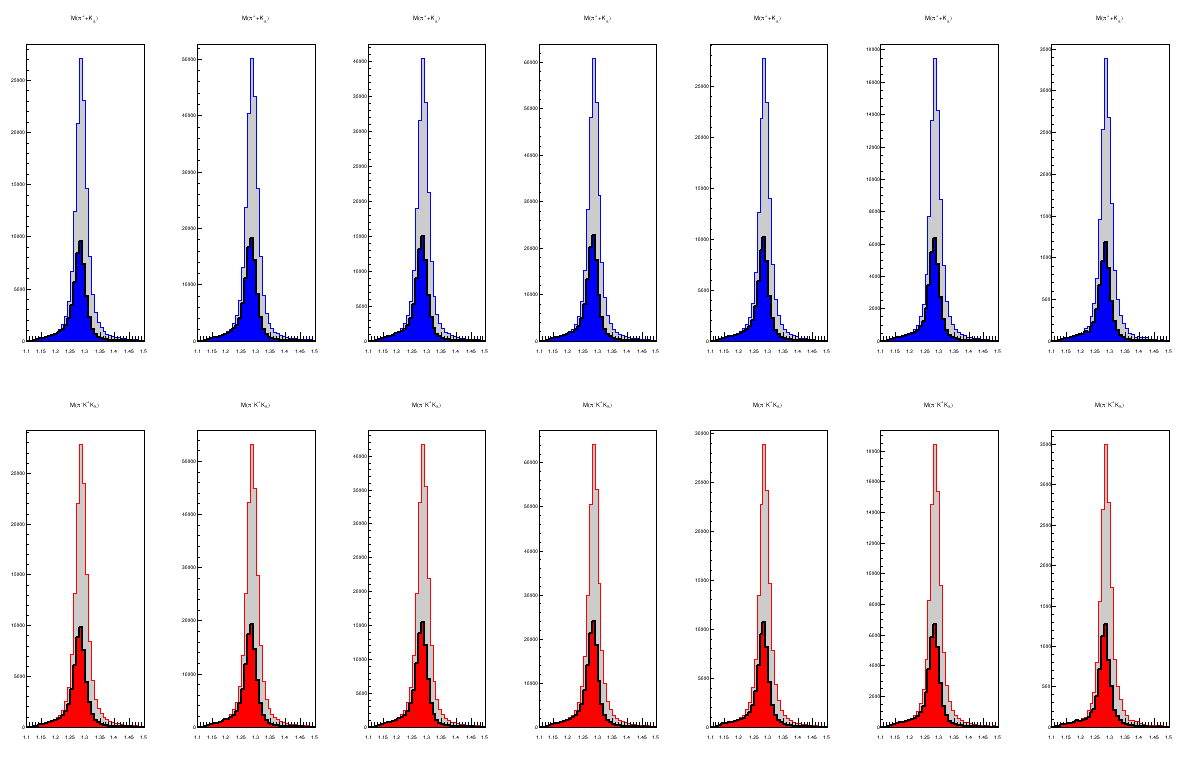

In [82]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_kskm, h_pipkmks_after_kskm, h_pimkpks_before_kskp, h_pimkpks_after_kskp) in enumerate(zip(hists_pipkmks_before_kskm, hists_pipkmks_after_kskm, hists_pimkpks_before_kskp, hists_pimkpks_after_kskp)):
    h_pipkmks_before_kskm.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_kskm.SetFillColor(ROOT.kGray)
    h_pipkmks_before_kskm.SetLineWidth(1)
    h_pipkmks_after_kskm.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kskm.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kskm.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_kskm.SetLineWidth(2)
    h_pimkpks_before_kskp.SetLineColor(ROOT.kRed)
    h_pimkpks_before_kskp.SetLineWidth(1)
    h_pimkpks_before_kskp.SetFillColor(ROOT.kGray)
    h_pimkpks_after_kskp.SetFillColor(ROOT.kRed)
    h_pimkpks_after_kskp.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_kskp.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_kskm.Draw()
    h_pipkmks_after_kskm.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_kskp.Draw()
    h_pimkpks_after_kskp.Draw('same')
c.Draw()

<a id="draw-kpi-plots"></a>
## $\pi^\pm K^\mp$

#### $\pi^\pm K^\mp$ Mass Distribution

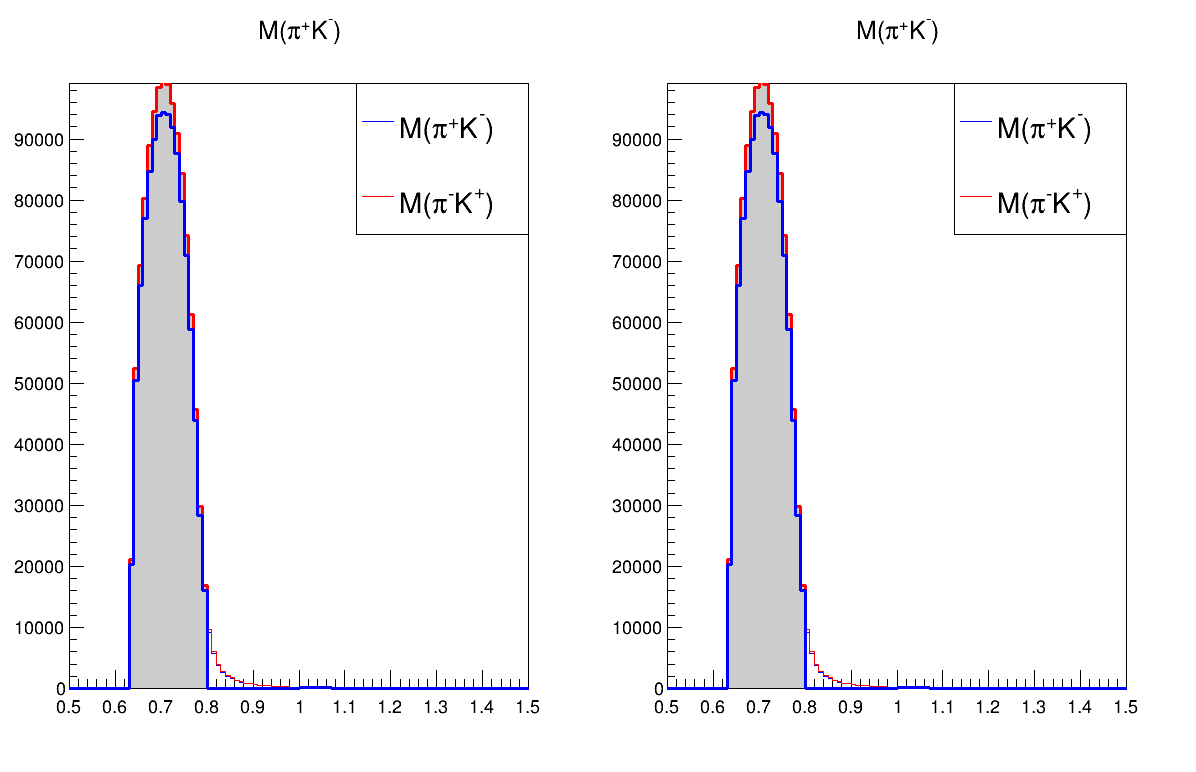

In [83]:
hist_kmpip.SetLineColor(ROOT.kBlue)
hist_kppim.SetLineColor(ROOT.kRed)
hist_kmpip_shaded.SetFillColor(ROOT.kGray)
hist_kmpip_shaded.SetLineColor(ROOT.kBlue)
hist_kmpip_shaded.SetLineWidth(3)
hist_kppim_shaded.SetFillColor(ROOT.kGray)
hist_kppim_shaded.SetLineColor(ROOT.kRed)
hist_kppim_shaded.SetLineWidth(3)
hist_kmpip_f1.SetLineColor(ROOT.kBlue)
hist_kppim_f1.SetLineColor(ROOT.kRed)
hist_kmpip_f1_shaded.SetFillColor(ROOT.kGray)
hist_kmpip_f1_shaded.SetLineColor(ROOT.kBlue)
hist_kmpip_f1_shaded.SetLineWidth(3)
hist_kppim_f1_shaded.SetFillColor(ROOT.kGray)
hist_kppim_f1_shaded.SetLineColor(ROOT.kRed)
hist_kppim_f1_shaded.SetLineWidth(3)

legend_kpi = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_kpi.AddEntry(hist_kmpip.GetPtr(), 'M(#pi^{+}K^{-})', 'l')
legend_kpi.AddEntry(hist_kppim.GetPtr(), 'M(#pi^{-}K^{+})', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kmpip.Draw()
hist_kppim.Draw('same')
hist_kppim_shaded.Draw('same')
hist_kmpip_shaded.Draw('same')
legend_kpi.Draw()

c.cd(2)
hist_kmpip_f1.Draw()
hist_kppim_f1.Draw('same')
hist_kppim_f1_shaded.Draw('same')
hist_kmpip_f1_shaded.Draw('same')
legend_kpi.Draw()

c.Draw()


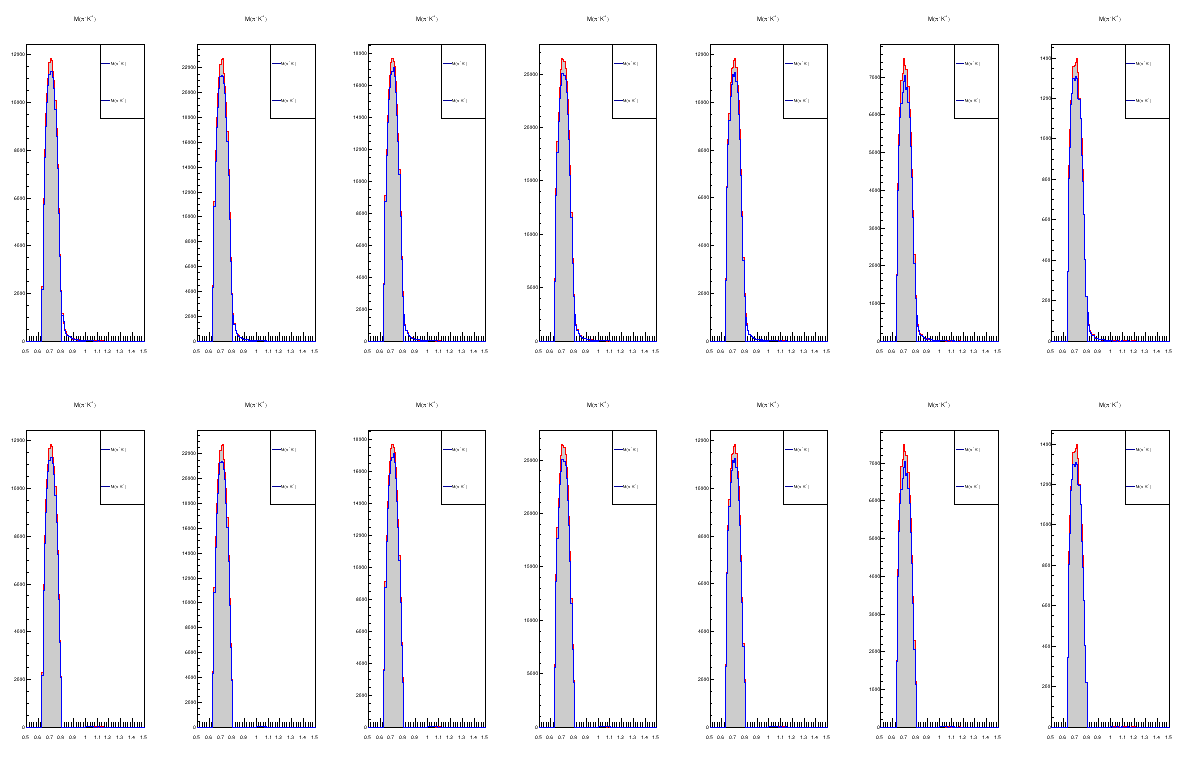

In [84]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kmpip, hists_kppim, hists_kmpip_shaded, hists_kppim_shaded)):
    legend_kpi_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_kpi_binned.AddEntry(hist_pip.GetPtr(), 'M(#pi^{+}K^{-})', 'l')
    legend_kpi_binned.AddEntry(hist_pim.GetPtr(), 'M(#pi^{-}K^{+})', 'l')
    legends.append(legend_kpi_binned)
    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+1)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()


for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kmpip_f1, hists_kppim_f1, hists_kmpip_f1_shaded, hists_kppim_f1_shaded)):    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+8)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(\pi^\pm pK^\mp)$ vs $M(KK\pi)$ Distribution

**Top Row: $\pi^+K^{-}$, Bottom Row: $\pi^-K^+$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

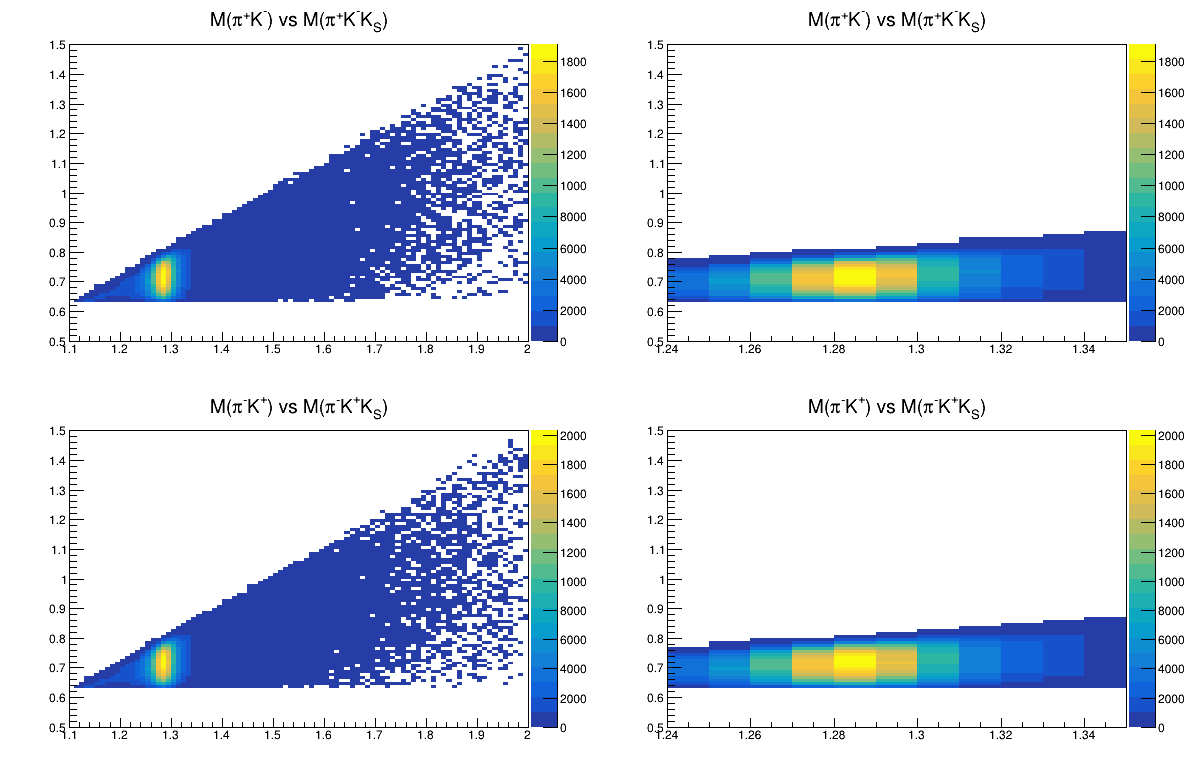

In [85]:
c.Clear()
c.Divide(2,2)
c.cd(1)
hist_kmpip_vs_kkpi.Draw('colz')
c.cd(2)
hist_kmpip_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_kppim_vs_kkpi.Draw('colz')
c.cd(4)
hist_kppim_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $\pi^\pm K^\mp$ vs $KK\pi$ over whole mass region

**Top row is $\pi^+ K^-$, bottom row is $\pi^- K^+$**

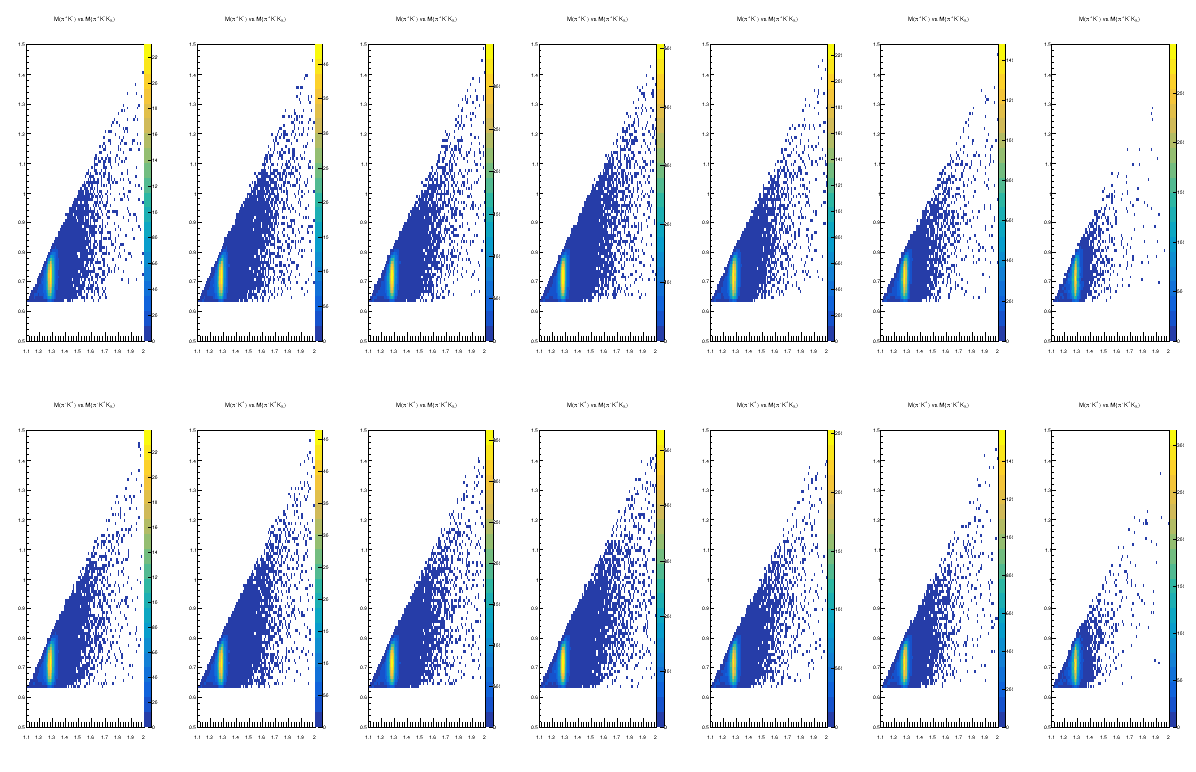

In [86]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kmpip_vs_kkpi, hists_kppim_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $\pi^\pm K^\mp$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $\pi^+K^-$, bottom row is $\pi^-K^+$**

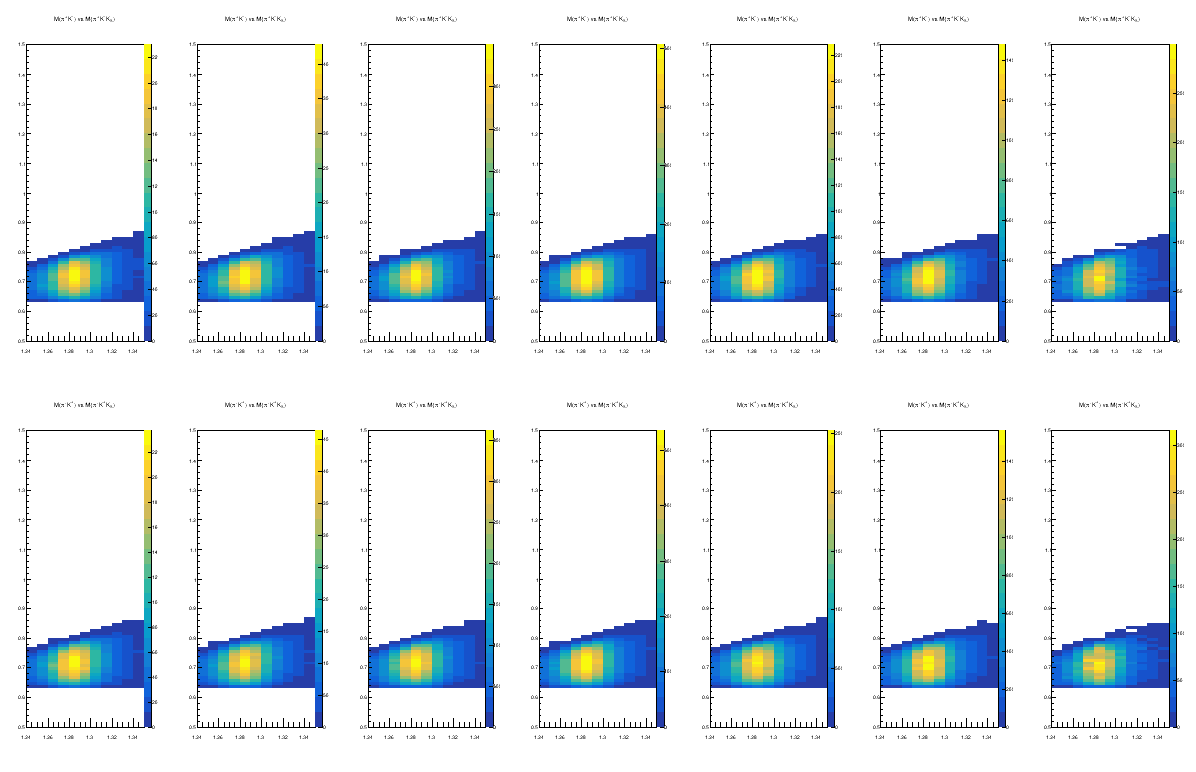

In [87]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kmpip_vs_kkpi_f1, hists_kppim_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $\pi^\pm K^\mp$ cut

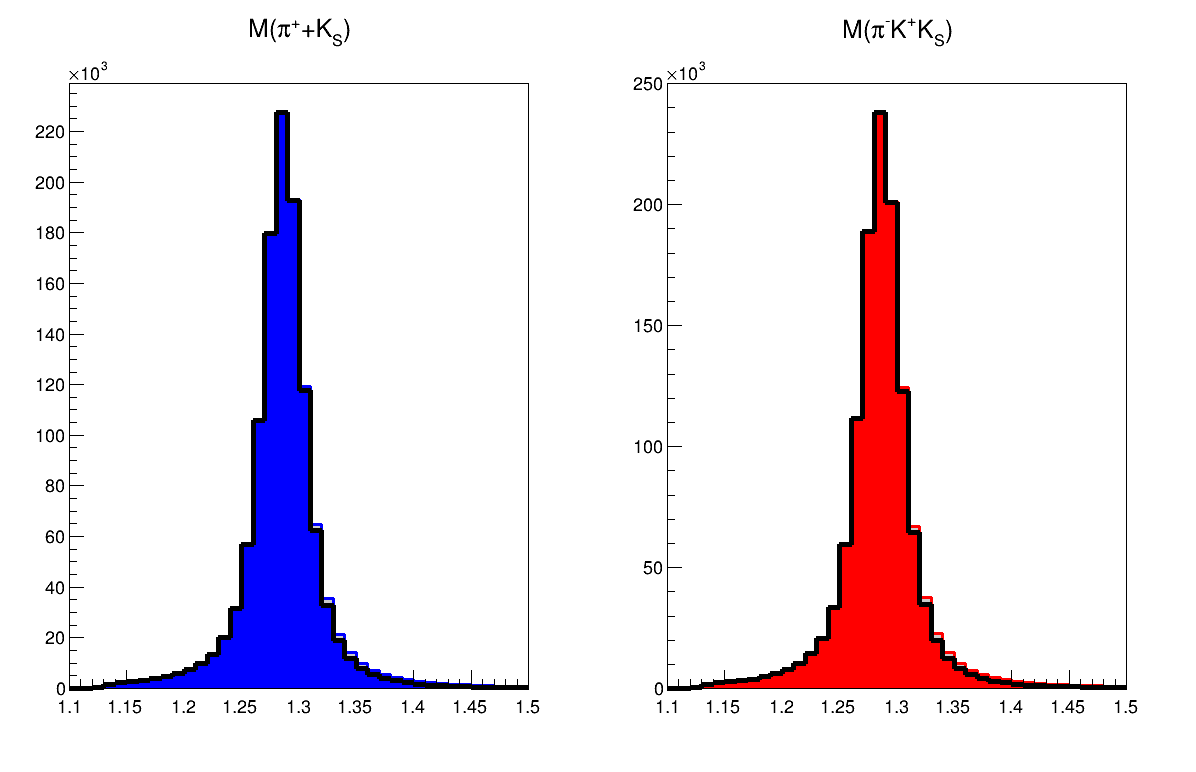

In [88]:
c.Clear()
c.Divide(2,1)

hist_pipkmks_before_kmpip.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_kmpip.SetFillColor(ROOT.kGray)
hist_pipkmks_before_kmpip.SetLineWidth(3)
hist_pimkpks_after_kppim.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kmpip.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kmpip.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_kmpip.SetLineWidth(5)
hist_pimkpks_before_kppim.SetLineColor(ROOT.kRed)
hist_pimkpks_before_kppim.SetLineWidth(3)
hist_pimkpks_before_kppim.SetFillColor(ROOT.kGray)
hist_pimkpks_after_kppim.SetFillColor(ROOT.kRed)
hist_pimkpks_after_kppim.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_kppim.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_kmpip.Draw()
hist_pipkmks_after_kmpip.Draw('same')

c.cd(2)
hist_pimkpks_before_kppim.Draw()
hist_pimkpks_after_kppim.Draw('same')

c.Draw()

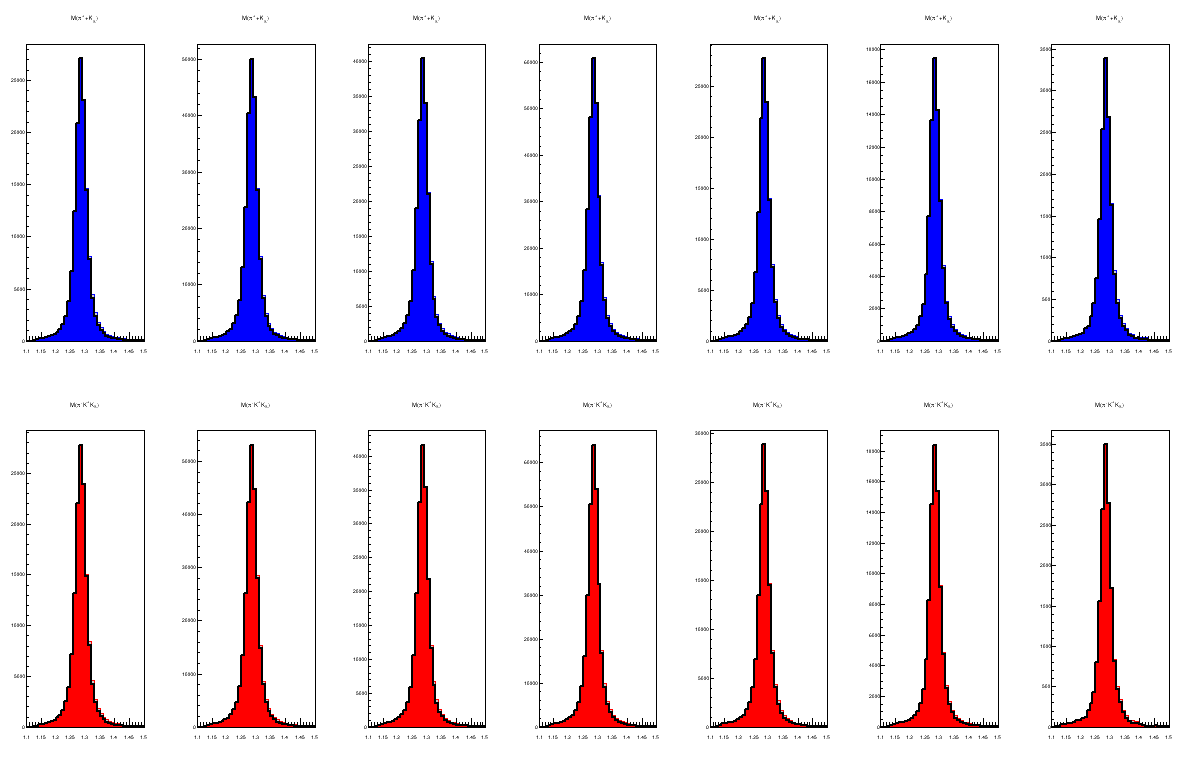

In [89]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_kmpip, h_pipkmks_after_kmpip, h_pimkpks_before_kppim, h_pimkpks_after_kppim) in enumerate(zip(hists_pipkmks_before_kmpip, hists_pipkmks_after_kmpip, hists_pimkpks_before_kppim, hists_pimkpks_after_kppim)):
    h_pipkmks_before_kmpip.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_kmpip.SetFillColor(ROOT.kGray)
    h_pipkmks_before_kmpip.SetLineWidth(1)
    h_pipkmks_after_kmpip.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kmpip.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kmpip.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_kmpip.SetLineWidth(2)
    h_pimkpks_before_kppim.SetLineColor(ROOT.kRed)
    h_pimkpks_before_kppim.SetLineWidth(1)
    h_pimkpks_before_kppim.SetFillColor(ROOT.kGray)
    h_pimkpks_after_kppim.SetFillColor(ROOT.kRed)
    h_pimkpks_after_kppim.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_kppim.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_kmpip.Draw()
    h_pipkmks_after_kmpip.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_kppim.Draw()
    h_pimkpks_after_kppim.Draw('same')
c.Draw()

<a id="draw-kspi-plots"></a>
## $\pi^\pm K_s$

#### $\pi^\pm K_s$ Mass Distribution

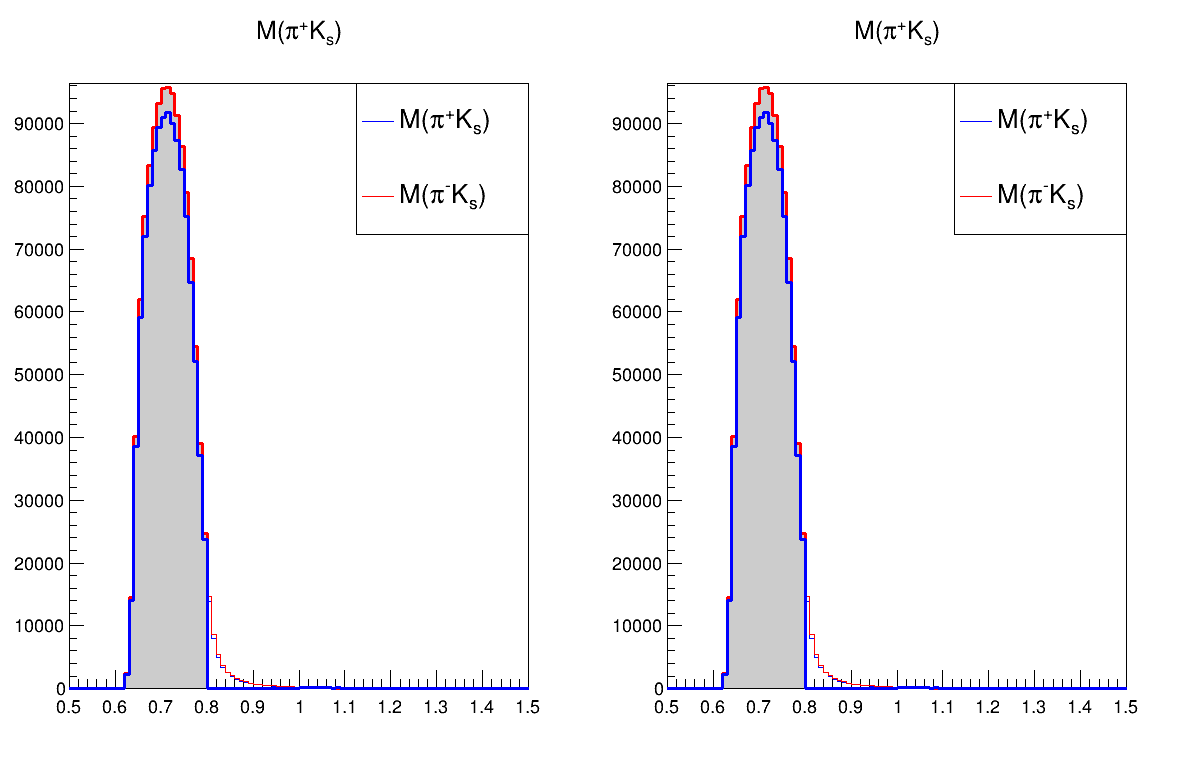

In [90]:
hist_kspip.SetLineColor(ROOT.kBlue)
hist_kspim.SetLineColor(ROOT.kRed)
hist_kspip_shaded.SetFillColor(ROOT.kGray)
hist_kspip_shaded.SetLineColor(ROOT.kBlue)
hist_kspip_shaded.SetLineWidth(3)
hist_kspim_shaded.SetFillColor(ROOT.kGray)
hist_kspim_shaded.SetLineColor(ROOT.kRed)
hist_kspim_shaded.SetLineWidth(3)
hist_kspip_f1.SetLineColor(ROOT.kBlue)
hist_kspim_f1.SetLineColor(ROOT.kRed)
hist_kspip_f1_shaded.SetFillColor(ROOT.kGray)
hist_kspip_f1_shaded.SetLineColor(ROOT.kBlue)
hist_kspip_f1_shaded.SetLineWidth(3)
hist_kspim_f1_shaded.SetFillColor(ROOT.kGray)
hist_kspim_f1_shaded.SetLineColor(ROOT.kRed)
hist_kspim_f1_shaded.SetLineWidth(3)

legend_kspi = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend_kspi.AddEntry(hist_kspip.GetPtr(), 'M(#pi^{+}K_{s})', 'l')
legend_kspi.AddEntry(hist_kspim.GetPtr(), 'M(#pi^{-}K_{s})', 'l')


c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kspip.Draw()
hist_kspim.Draw('same')
hist_kspim_shaded.Draw('same')
hist_kspip_shaded.Draw('same')
legend_kspi.Draw()

c.cd(2)
hist_kspip_f1.Draw()
hist_kspim_f1.Draw('same')
hist_kspim_f1_shaded.Draw('same')
hist_kspip_f1_shaded.Draw('same')
legend_kspi.Draw()

c.Draw()


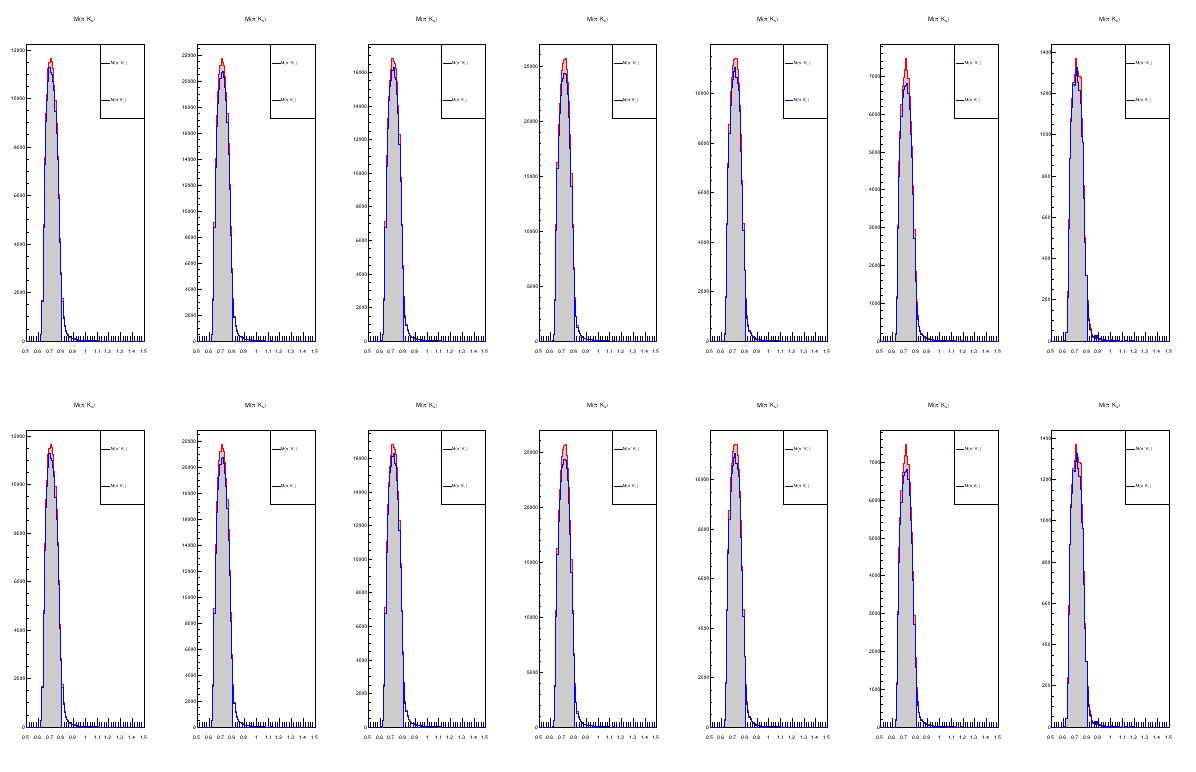

In [91]:
legends = []

c.Clear()
c.Divide(7, 2)

for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kspip, hists_kspim, hists_kspip_shaded, hists_kspim_shaded)):
    legend_kpi_binned = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
    legend_kpi_binned.AddEntry(hist_pip.GetPtr(), 'M(#pi^{+}K_{s})', 'l')
    legend_kpi_binned.AddEntry(hist_pim.GetPtr(), 'M(#pi^{-}K_{s})', 'l')
    legends.append(legend_kpi_binned)
    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+1)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()


for i, (h_pip, h_pim, h_pip_shaded, h_pim_shaded) in enumerate(zip(hists_kspip_f1, hists_kspim_f1, hists_kspip_f1_shaded, hists_kspim_f1_shaded)):    
    h_pip.SetLineColor(ROOT.kBlue)
    h_pim.SetLineColor(ROOT.kRed)
    h_pip_shaded.SetFillColor(ROOT.kGray)
    h_pip_shaded.SetLineColor(ROOT.kBlue)
    h_pip_shaded.SetLineWidth(1)
    h_pim_shaded.SetFillColor(ROOT.kGray)
    h_pim_shaded.SetLineColor(ROOT.kRed)
    h_pim_shaded.SetLineWidth(1)

    c.cd(i+8)
    sorted_hists = tools.sort_hists_by_max([h_pip, h_pim, h_pip_shaded, h_pim_shaded])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    sorted_hists[2].Draw('same')
    sorted_hists[3].Draw('same')
    legends[i].Draw()

c.Draw()

#### $M(\pi^\pm pK_s)$ vs $M(KK\pi)$ Distribution

**Top Row: $\pi^+K^{-}$, Bottom Row: $\pi^-K^+$**

**Left side: whole mass range, Right side: $1.24 < M(KK\pi) < 1.35$**

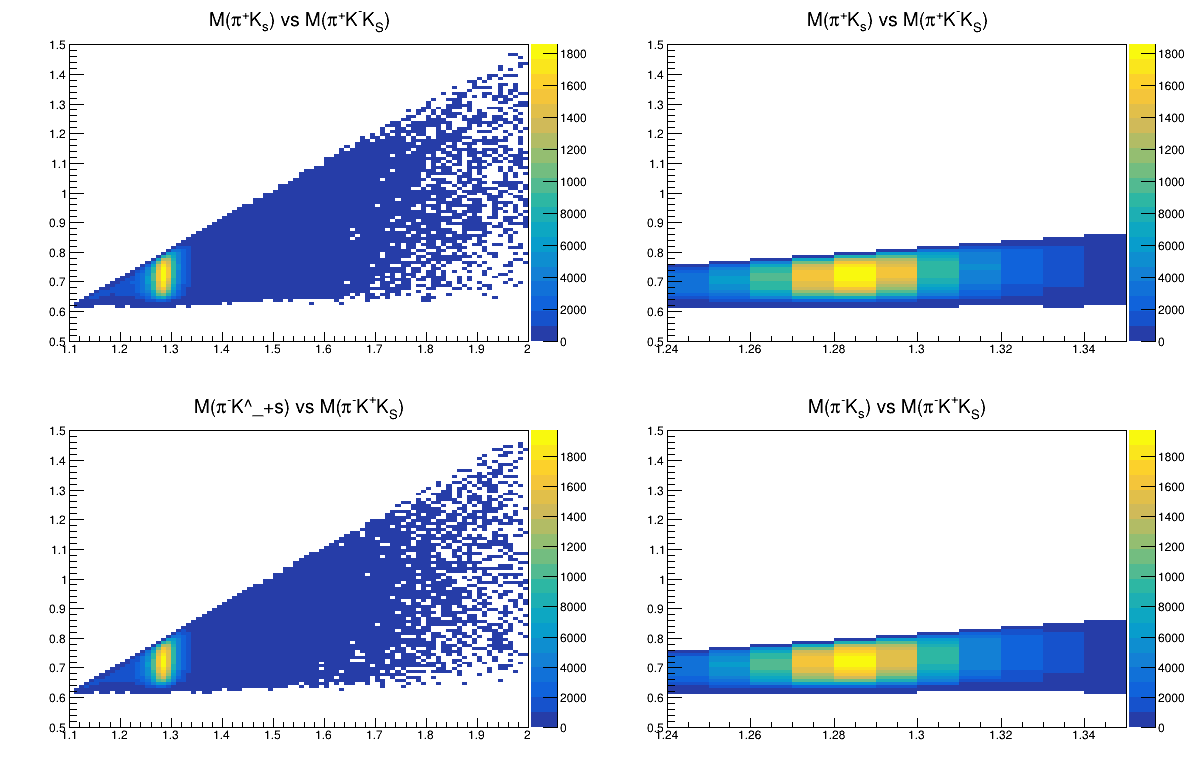

In [92]:
c.Clear()
c.Divide(2,2)
c.cd(1)
hist_kspip_vs_kkpi.Draw('colz')
c.cd(2)
hist_kspip_vs_kkpi_f1.Draw('colz')
c.cd(3)
hist_kspim_vs_kkpi.Draw('colz')
c.cd(4)
hist_kspim_vs_kkpi_f1.Draw('colz')
c.Draw()


#### Binned $\pi^\pm K_s$ vs $KK\pi$ over whole mass region

**Top row is $\pi^+ K_s$, bottom row is $\pi^- K_s$**

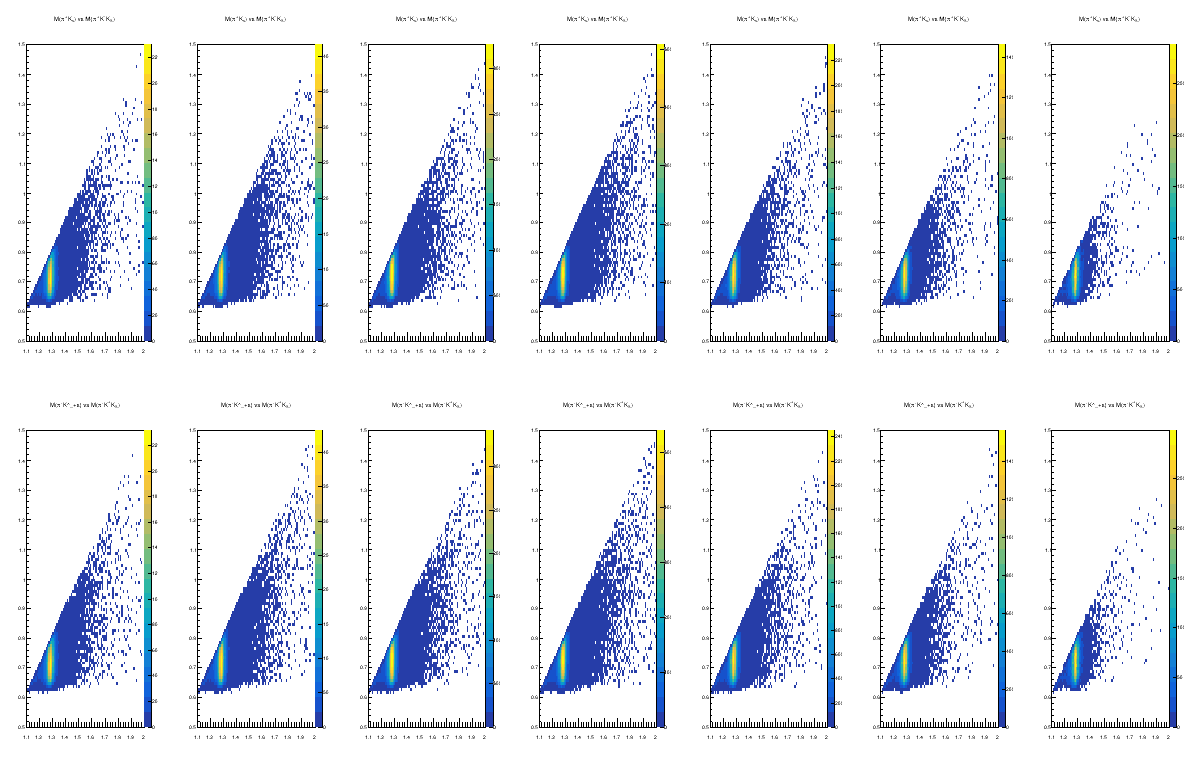

In [93]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kspip_vs_kkpi, hists_kspim_vs_kkpi)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### Binned $\pi^\pm K_s$ vs $KK\pi$ for $1.24 < M(KK\pi) < 1.35$

**Top row is $\pi^+K_s$, bottom row is $\pi^-K_s$**

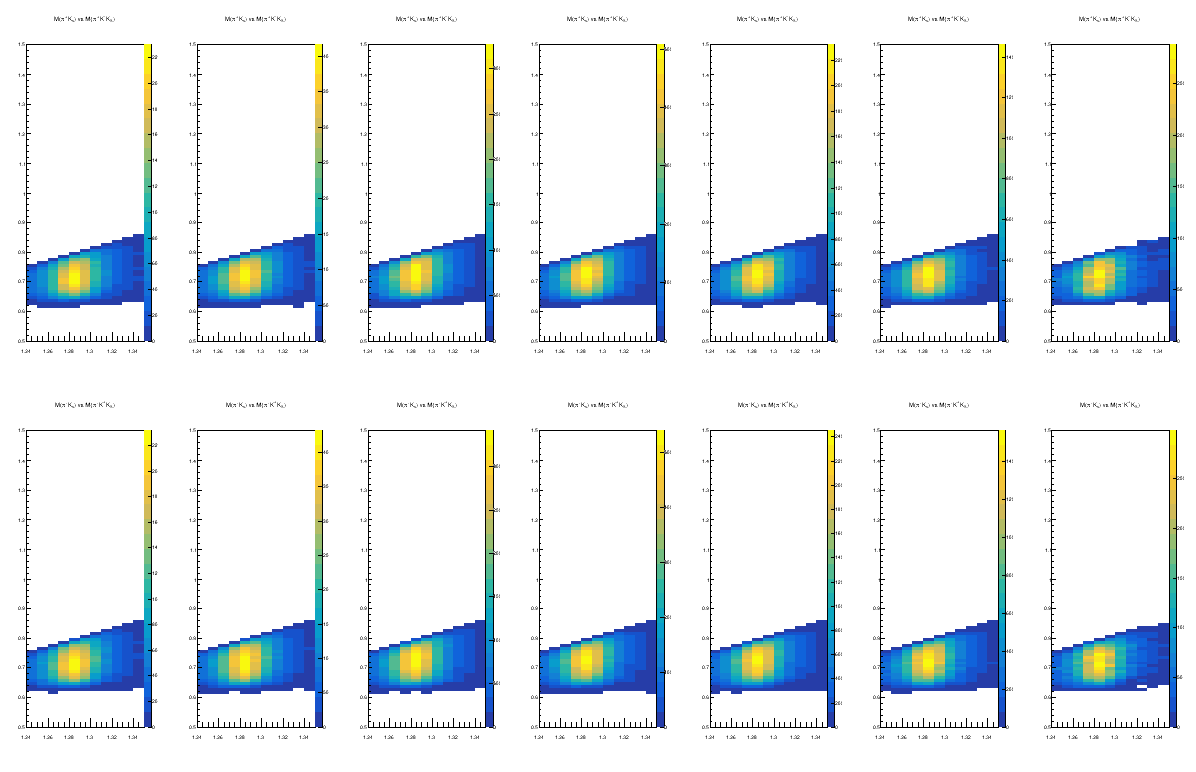

In [94]:
c.Clear()
c.Divide(7, 2)
for i, (h_kkpip, h_kkpim) in enumerate(zip(hists_kspip_vs_kkpi_f1, hists_kspim_vs_kkpi_f1)):
    c.cd(i+1)
    h_kkpip.Draw('colz')
    c.cd(i+8)
    h_kkpim.Draw('colz')
c.Draw()

#### $M(KK\pi)$ before/after $\pi^\pm K_s$ cut

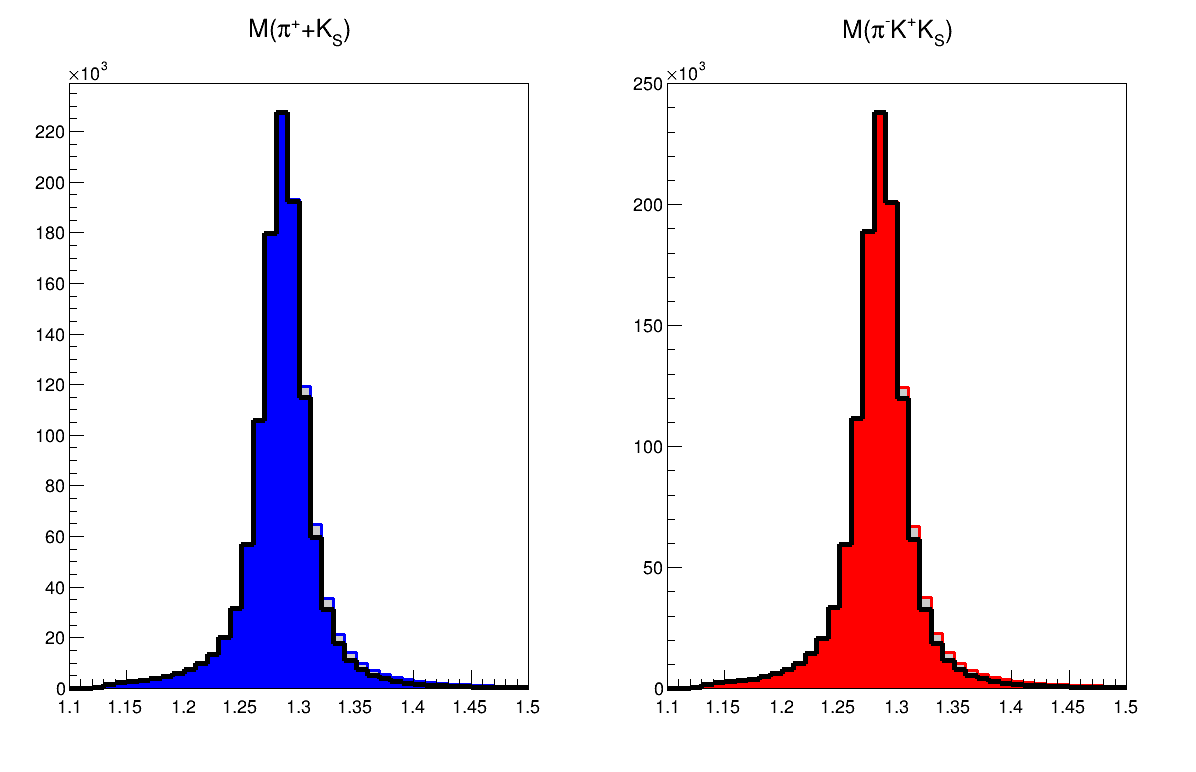

In [95]:
c.Clear()
c.Divide(2,1)

hist_pipkmks_before_kspip.SetLineColor(ROOT.kBlue)
hist_pipkmks_before_kspip.SetFillColor(ROOT.kGray)
hist_pipkmks_before_kspip.SetLineWidth(3)
hist_pimkpks_after_kspim.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kspip.SetLineColor(ROOT.kBlack)
hist_pipkmks_after_kspip.SetFillColor(ROOT.kBlue)
hist_pipkmks_after_kspip.SetLineWidth(5)
hist_pimkpks_before_kspim.SetLineColor(ROOT.kRed)
hist_pimkpks_before_kspim.SetLineWidth(3)
hist_pimkpks_before_kspim.SetFillColor(ROOT.kGray)
hist_pimkpks_after_kspim.SetFillColor(ROOT.kRed)
hist_pimkpks_after_kspim.SetLineColor(ROOT.kBlack)
hist_pimkpks_after_kspim.SetLineWidth(5)

c.cd(1)
hist_pipkmks_before_kspip.Draw()
hist_pipkmks_after_kspip.Draw('same')

c.cd(2)
hist_pimkpks_before_kspim.Draw()
hist_pimkpks_after_kspim.Draw('same')

c.Draw()

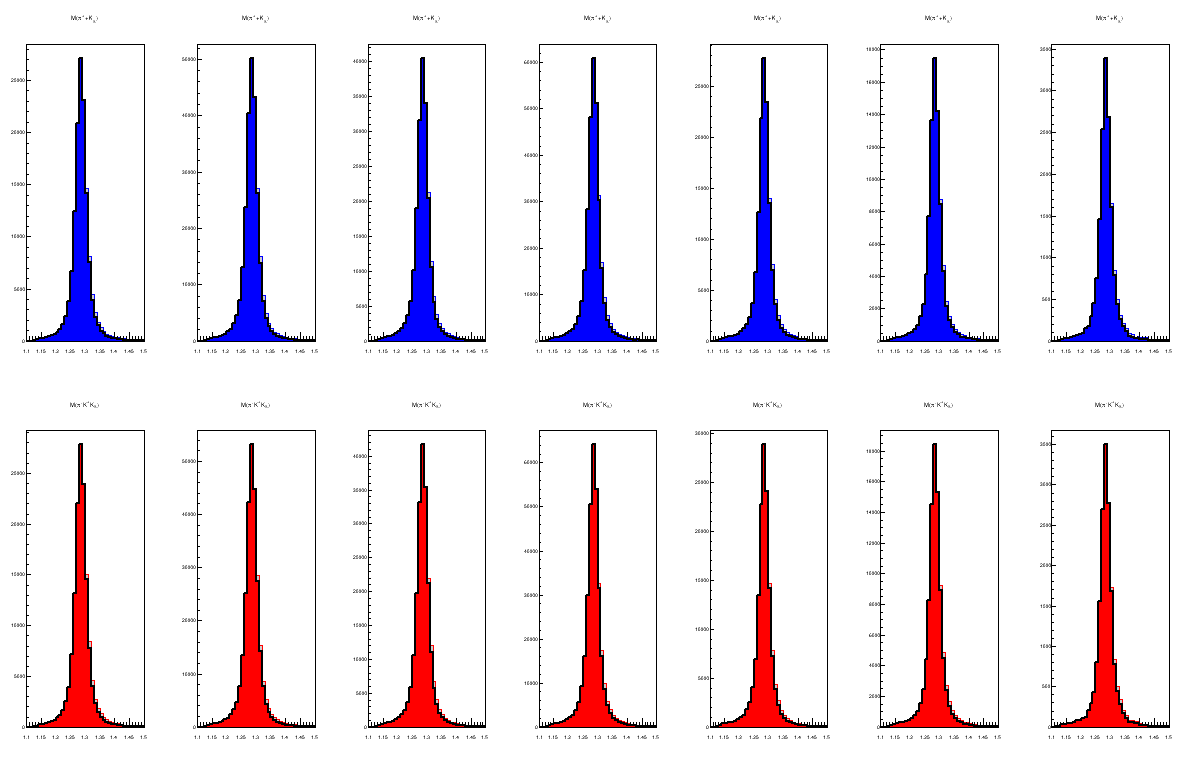

In [96]:
c.Clear()
c.Divide(7, 2)

for i, (h_pipkmks_before_kspip, h_pipkmks_after_kspip, h_pimkpks_before_kspim, h_pimkpks_after_kspim) in enumerate(zip(hists_pipkmks_before_kspip, hists_pipkmks_after_kspip, hists_pimkpks_before_kspim, hists_pimkpks_after_kspim)):
    h_pipkmks_before_kspip.SetLineColor(ROOT.kBlue)
    h_pipkmks_before_kspip.SetFillColor(ROOT.kGray)
    h_pipkmks_before_kspip.SetLineWidth(1)
    h_pipkmks_after_kspip.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kspip.SetLineColor(ROOT.kBlack)
    h_pipkmks_after_kspip.SetFillColor(ROOT.kBlue)
    h_pipkmks_after_kspip.SetLineWidth(2)
    h_pimkpks_before_kspim.SetLineColor(ROOT.kRed)
    h_pimkpks_before_kspim.SetLineWidth(1)
    h_pimkpks_before_kspim.SetFillColor(ROOT.kGray)
    h_pimkpks_after_kspim.SetFillColor(ROOT.kRed)
    h_pimkpks_after_kspim.SetLineColor(ROOT.kBlack)
    h_pimkpks_after_kspim.SetLineWidth(2)
    c.cd(i+1)
    h_pipkmks_before_kspip.Draw()
    h_pipkmks_after_kspip.Draw('same')
    c.cd(i+8)
    h_pimkpks_before_kspim.Draw()
    h_pimkpks_after_kspim.Draw('same')
c.Draw()